In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import os
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_prefix='/content/drive/MyDrive/AF2_dynamics/calculated_data/'
sys_names=['3ttp', '2pc0', '1q9p', '1ebw','4z4x','6p9a']

with open(f'{data_prefix}HA_tcf_calc_eric.pkl','rb') as f:
    tmp0=pickle.load(f)

In [4]:

with open(f'{data_prefix}HA_tcf_calc_raw_allmethods.pkl','rb') as f:
    tmp1=pickle.load(f)

In [5]:
HA_tcf_calc = tmp0 | tmp1
del tmp0, tmp1

In [6]:
HA_tcf_calc.keys(),HA_tcf_calc[sys_names[0]].keys(),HA_tcf_calc[sys_names[0]]['AF2'].keys(),HA_tcf_calc[sys_names[0]]['BioEMU'].keys(),HA_tcf_calc[sys_names[0]]['test'].keys()

(dict_keys(['3ttp', '2pc0', '1q9p', '1ebw', '4z4x', '6p9a']),
 dict_keys(['AF2', 'test', 'AFc', 'DiG', 'BioEMU', 'MD']),
 dict_keys(['non_scaled', 'scaled', 'CinvH', 'C', 'msas', 'n_samples', 't_axis']),
 dict_keys(['non_scaled', 'scaled', 'CinvH', 'C', 'n_samples', 't_axis']),
 dict_keys(['1000ns', '100ns', '10ns']))

# Only rMSA AF2

In [7]:
for SYS in list(HA_tcf_calc.keys()):

  print(SYS)
  colors = plt.cm.gnuplot(np.linspace(0, 1, len(HA_tcf_calc[SYS]['AF2']['msas'])))
  colors_ref=['k','b','g']

  if SYS == '1q9p':
    Flap_regions=np.array([0,1,49,50,51,93,94])
  else:
    Flap_regions=np.array([0,1,49,50,51,97,98])

  barrier_type='scaled'
  timescales=['1000ns','100ns','10ns']
  # trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')

  tcf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['tcf']
  t_axis = HA_tcf_calc[SYS]['AF2']['t_axis']
  for resi in Flap_regions:
      fig=plt.figure(figsize=(6,4))
      for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
          plt.plot(t_axis,tcf_list[mm].T[resi],'--',c=colors[mm],label=f'MSA:{msa}')

      for jj, timescale in enumerate(timescales):
          tcf_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[1:]
          t_axis_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[0]
          plt.plot(t_axis_ref,tcf_ref[resi],linewidth=2,c=colors_ref[jj],label=f'MD:{timescale}')

      plt.title(f'residue {resi}',fontsize=15)
      plt.xlabel('t, ps',fontsize=19)
      plt.ylabel('C(t)',fontsize=19)
      plt.xscale('log')
      #plt.yscale('log')
      plt.ylim((1e-3, 1.1))
      plt.legend(bbox_to_anchor=(1,1.03),fontsize=13)
      plt.yticks(fontsize=17)
      plt.xticks(fontsize=17)
      plt.tight_layout()
      plt.show()
      plt.close()

Output hidden; open in https://colab.research.google.com to view.

# All methods

In [8]:
msas_req=[8,64,512]
methods = ['AFc','BioEMU','DiG','MD']
colors = plt.cm.gnuplot(np.linspace(0, 1, len(methods+msas_req)))
colors_ref=['k','b','g']
for SYS in list(HA_tcf_calc.keys()):

  if SYS == '1q9p':
    Flap_regions=np.array([0,1,49,50,51,93,94])
  else:
    Flap_regions=np.array([0,1,49,50,51,97,98])

  barrier_type='scaled'
  timescales=['1000ns','100ns','10ns']
  # trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')

  tcf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['tcf']
  t_axis = HA_tcf_calc[SYS]['AF2']['t_axis']
  for resi in Flap_regions:
      fig=plt.figure(figsize=(6,4))
      cc=0
      for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
        if msa in msas_req:
          plt.plot(t_axis,tcf_list[mm].T[resi],'--',c=colors[cc],label=f'MSA:{msa}')
          cc+=1
        else:
          pass

      for kk, meth in enumerate(methods):
        tcf_meth=HA_tcf_calc[SYS][meth][barrier_type]['tcf']
        t_axis_meth=HA_tcf_calc[SYS][meth]['t_axis']
        plt.plot(t_axis_meth,tcf_meth[0].T[resi],'--',c=colors[kk+2],label=f'{meth}')

      for jj, timescale in enumerate(timescales):
          tcf_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[1:]
          t_axis_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[0]
          plt.plot(t_axis_ref,tcf_ref[resi],linewidth=2,c=colors_ref[jj],label=f'MD:{timescale}')

      plt.title(f'residue {resi}',fontsize=15)
      plt.xlabel('t, ps',fontsize=19)
      plt.ylabel('C(t)',fontsize=19)
      plt.xscale('log')
      #plt.yscale('log')
      plt.ylim((1e-3, 1.1))
      plt.legend(bbox_to_anchor=(1,1.03),fontsize=13)
      plt.yticks(fontsize=17)
      plt.xticks(fontsize=17)
      plt.tight_layout()
      plt.show()
      plt.close()

Output hidden; open in https://colab.research.google.com to view.

# filtering effects

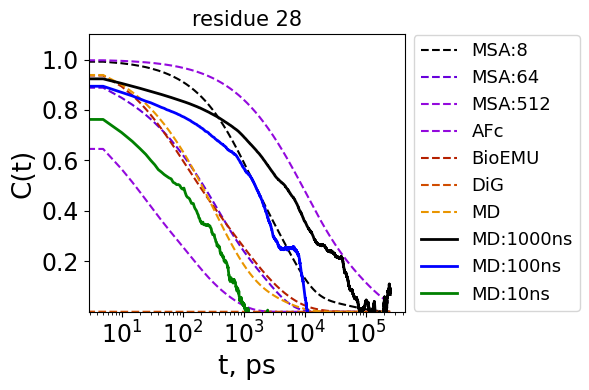

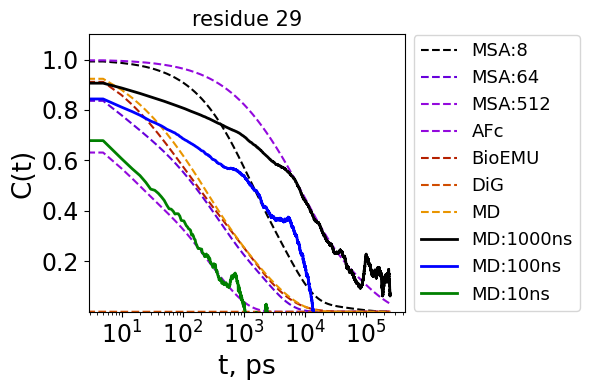

In [ ]:
msas_req=[8,64,512]
methods = ['AFc','BioEMU','DiG','MD']
colors = plt.cm.gnuplot(np.linspace(0, 1, len(methods+msas_req)))
colors_ref=['k','b','g']
SYS='6p9a'

Flap_regions=np.array([28,29])

barrier_type='scaled'
timescales=['1000ns','100ns','10ns']
# trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')

tcf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['tcf']
t_axis = HA_tcf_calc[SYS]['AF2']['t_axis']
for resi in Flap_regions:
    fig=plt.figure(figsize=(6,4))
    cc=0
    for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
      if msa in msas_req:
        plt.plot(t_axis,tcf_list[mm].T[resi],'--',c=colors[cc],label=f'MSA:{msa}')
        cc+=1
      else:
        pass

    for kk, meth in enumerate(methods):
      tcf_meth=HA_tcf_calc[SYS][meth][barrier_type]['tcf']
      t_axis_meth=HA_tcf_calc[SYS][meth]['t_axis']
      plt.plot(t_axis_meth,tcf_meth[0].T[resi],'--',c=colors[kk+2],label=f'{meth}')

    for jj, timescale in enumerate(timescales):
        tcf_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[1:]
        t_axis_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[0]
        plt.plot(t_axis_ref,tcf_ref[resi],linewidth=2,c=colors_ref[jj],label=f'MD:{timescale}')

    plt.title(f'residue {resi}',fontsize=15)
    plt.xlabel('t, ps',fontsize=19)
    plt.ylabel('C(t)',fontsize=19)
    plt.xscale('log')
    #plt.yscale('log')
    plt.ylim((1e-3, 1.1))
    plt.legend(bbox_to_anchor=(1,1.03),fontsize=13)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
with open(f'{data_prefix}HA_tcf_calc_6p9a_modes_0_236.pkl','rb') as f:
    HA_tcf_calc_0_236=pickle.load(f)

In [ ]:
del HA_tcf_calc_0_236

In [ ]:
with open(f'{data_prefix}HA_tcf_calc_no_deepfakes.pkl','rb') as f:
    tmp=pickle.load(f)

In [ ]:
HA_tcf_calc_0_236 = tmp | HA_tcf_calc_0_236
del tmp

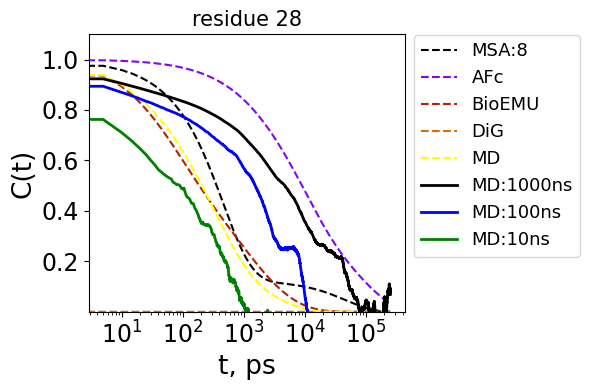

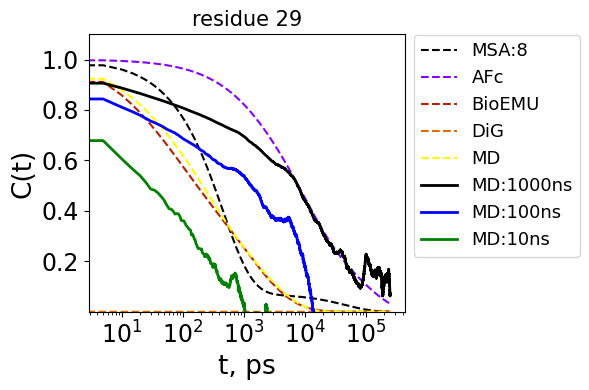

In [ ]:
msas_req=[8]
methods = ['AFc','BioEMU','DiG','MD']
colors = plt.cm.gnuplot(np.linspace(0, 1, len(methods+msas_req)))
colors_ref=['k','b','g']
SYS='6p9a'

Flap_regions=np.array([28,29])

barrier_type='scaled'
timescales=['1000ns','100ns','10ns']
# trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')

tcf_list = HA_tcf_calc_0_236[SYS]['AF2'][barrier_type]['tcf']
t_axis = HA_tcf_calc_0_236[SYS]['AF2']['t_axis']
for resi in Flap_regions:
    fig=plt.figure(figsize=(6,4))
    cc=0
    for mm,msa in enumerate(HA_tcf_calc_0_236[SYS]['AF2']['msas']):
      if msa in msas_req:
        plt.plot(t_axis,tcf_list[mm].T[resi],'--',c=colors[cc],label=f'MSA:{msa}')
        cc+=1
      else:
        pass

    for kk, meth in enumerate(methods):
      tcf_meth=HA_tcf_calc[SYS][meth][barrier_type]['tcf']
      t_axis_meth=HA_tcf_calc[SYS][meth]['t_axis']
      plt.plot(t_axis_meth,tcf_meth[0].T[resi],'--',c=colors[kk+1],label=f'{meth}')

    for jj, timescale in enumerate(timescales):
        tcf_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[1:]
        t_axis_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[0]
        plt.plot(t_axis_ref,tcf_ref[resi],linewidth=2,c=colors_ref[jj],label=f'MD:{timescale}')

    plt.title(f'residue {resi}',fontsize=15)
    plt.xlabel('t, ps',fontsize=19)
    plt.ylabel('C(t)',fontsize=19)
    plt.xscale('log')
    #plt.yscale('log')
    plt.ylim((1e-3, 1.1))
    plt.legend(bbox_to_anchor=(1,1.03),fontsize=13)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    plt.tight_layout()
    plt.show()
    plt.close()

# Plots for figure 1

In [ ]:
# del HA_tcf_calc

In [ ]:
'''
data_prefix='/content/drive/MyDrive/AF2_dynamics/calculated_data/'
sys_names=['1ebw','4z4x','6p9a']

with open(f'{data_prefix}HA_tcf_calc_raw_allmethods.pkl','rb') as f:
    HA_tcf_calc=pickle.load(f)
  '''

/tmp/ipython-input-9-3738325299.py:29: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((0, 1e6))


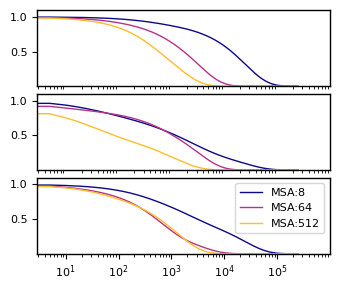

In [9]:
# Flap_regions=np.array([0,1,2,49,50,51,96,97,98])
Flap_regions=np.array([1,51,97])
colors = plt.cm.plasma(np.linspace(0, 1, len(HA_tcf_calc[SYS]['AF2']['msas'])+1))
# colors_ref=['k','b','g']
SYS='1ebw'



barrier_type='scaled'
# timescales=['1000ns','100ns','10ns']
# trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')

t_axis = HA_tcf_calc[SYS]['AF2']['t_axis']
tcf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['tcf']
fig=plt.figure(figsize=(3.5,3.0))
for jj,resi in enumerate(Flap_regions):
  plt.subplot(len(Flap_regions),1,jj+1)
  for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
    if msa in [8,64,512]:
        plt.plot(t_axis,tcf_list[mm].T[resi],'-',c=colors[mm],label=f'MSA:{msa}',linewidth=1)
  plt.xscale('log')
  plt.yticks(fontsize=8)

  ax = plt.gca()
  # plt.gca().set_aspect(4.5)
  for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(1.0)
  plt.ylim((1e-3, 1.1))
  plt.xlim((0, 1e6))
  if jj<len(Flap_regions)-1:
    plt.xticks([])
  else:
    plt.xticks([1e1,1e2,1e3,1e4,1e5],fontsize=8)


  if jj==len(Flap_regions)-1:
    plt.legend(fontsize=8)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
# plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/timescales_for_1ebw.png',dpi=600)
plt.savefig('timescales_for_1ebw.png',dpi=600)
plt.show()
plt.close()

In [10]:
def integ(y,x):
    integ_v=np.trapz(y,x)
    # f=interp1d(x,y,kind='cubic')
    # xval=np.linspace(x[0]+0.01, x[-1]-0.01,num=129,endpoint=True)
    # integ_v=simps(f(xval),xval)
    #print('Integration value : '+str(integ_v)+'\n')
    return integ_v

In [11]:
# Flap_regions=np.array([0,1,2,49,50,51,96,97,98])
Flap_regions=np.array([1,51,97])
colors = plt.cm.plasma(np.linspace(0, 1, len(HA_tcf_calc[SYS]['AF2']['msas'])+1))
# colors_ref=['k','b','g']
SYS='1ebw'



barrier_type='scaled'
# timescales=['1000ns','100ns','10ns']
# trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')
# selected_msa={8:0,16:1,64:2,512:3}
selected_msa={8:0,64:1,512:2}

tau_avg=np.zeros((len(selected_msa),99))

t_axis = HA_tcf_calc[SYS]['AF2']['t_axis']
tcf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['tcf']
for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
  if msa in selected_msa.keys():
    for resi in range(99):
      tau_avg[selected_msa[msa],resi] = integ(tcf_list[mm].T[resi],t_axis)

/tmp/ipython-input-10-3448413438.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integ_v=np.trapz(y,x)


/tmp/ipython-input-12-1391419559.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 5e6))


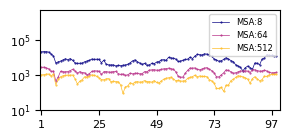

In [12]:
colors = plt.cm.plasma(np.linspace(0, 1, len(HA_tcf_calc[SYS]['AF2']['msas'])+1))
ig=plt.figure(figsize=(3,1.5))
for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
  if msa in selected_msa.keys():
    plt.plot(tau_avg[selected_msa[msa],:],'.-',linewidth=0.5,markersize=1,c=colors[mm],label=f'MSA:{msa}')
plt.yscale('log')
plt.xlim(-0.5,99.5)
plt.xticks(np.arange(0,99,24),labels=[str(r) for r in range(1,100,24)],fontsize=8)
plt.legend(fontsize=6,loc='upper right')
plt.ylim((0, 5e6))
plt.yticks([1e1,1e3,1e5],fontsize=8)
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/tau_avg_for_1ebw.png',dpi=600)
plt.savefig('tau_avg_for_1ebw.png',dpi=600)

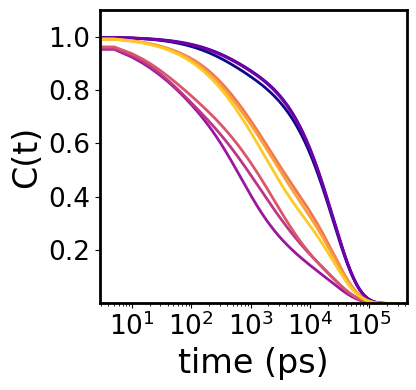

In [13]:
# Flap_regions=np.array([0,1,2,49,50,51,96,97,98])
Flap_regions=np.array([0,1,2,49,50,51,96,97,98])
colors = plt.cm.plasma(np.linspace(0, 1, len(Flap_regions)+1))
# colors_ref=['k','b','g']
SYS='1ebw'



barrier_type='scaled'
# timescales=['1000ns','100ns','10ns']
# trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')

t_axis = HA_tcf_calc[SYS]['AF2']['t_axis']
tcf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['tcf']
fig=plt.figure(figsize=(6,4))
for jj,resi in enumerate(Flap_regions):
    for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
      if msa == 8:
        plt.plot(t_axis,tcf_list[mm].T[resi],'-',c=colors[jj],label=f'MSA:{msa}',linewidth=2)

# plt.title(f'residue {resi}',fontsize=15)
plt.xlabel('time (ps)',fontsize=24)
plt.ylabel('C(t)',fontsize=24)
plt.xscale('log')
#plt.yscale('log')
plt.gca().set_aspect(4.5)
plt.ylim((1e-3, 1.1))
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.0)
# plt.legend(bbox_to_anchor=(1,1.03),fontsize=13)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/1ebw_rep_timescale.png',dpi=700)
plt.savefig('1ebw_rep_timescale.png',dpi=700)
plt.show()
plt.close()

In [14]:
_1ebw='PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF'

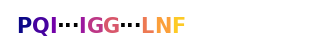

In [15]:
Flap_regions=np.array([0,1,2,49,50,51,96,97,98])
colors = plt.cm.plasma(np.linspace(0, 1, len(Flap_regions)+1))
text=''
dx=0.03
x=[0.02,0.07,0.125,0.15,0.22,0.25,0.3,0.35,0.42,0.465,0.52]
k=0
fig=plt.figure(figsize=(4,0.3))
for j,i in enumerate(Flap_regions):
  # print(_1ebw[i])
  text+=str(_1ebw[i])
  plt.text(x=x[k],y=0,s=str(_1ebw[i]),color=colors[j],weight='bold',fontsize=15)
  # x+=dx
  k+=1
  if (j+1)%3==0 and j<len(Flap_regions)-1:
    text+='...'
    plt.text(x=x[k],y=0.25,s='...',color='k',weight='bold',fontsize=15)
    # x+=3*dx
    k+=1
plt.xticks([])
plt.yticks([])
ax=plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0)
# plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/text.png',dpi=700)
plt.savefig('text.png',dpi=700)

# Plots for Figure 2

In [16]:
HA_tcf_calc['3ttp']['AF2']['msas'] = [8, 16, 32, 64, 128, 256, 512]
HA_tcf_calc['2pc0']['AF2']['msas'] = [8, 16, 32, 64, 128, 256, 512]
HA_tcf_calc['1q9p']['AF2']['msas'] = [8, 16, 32, 64, 128, 256, 512]

In [17]:
sys_names=['3ttp', '2pc0', '1q9p', '1ebw', '4z4x', '6p9a']
selected_msa={mm:i for i,mm in enumerate([8,64,512])}
barrier_type='scaled'
nres_list = [99,99,95,99,99,99]
tau_avg_per_sys = {}

for i, sys in enumerate(sys_names):
  SYS=sys
  tau_avg_per_sys[sys]=np.zeros((len(selected_msa),nres_list[i])) # sys instead of SYS so that later on things can be changed
  t_axis = HA_tcf_calc[SYS]['AF2']['t_axis']
  tcf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['tcf']
  for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
    if msa in selected_msa.keys():
      for resi in range(nres_list[i]):
        tau_avg_per_sys[sys][selected_msa[msa],resi] = integ(tcf_list[mm].T[resi],t_axis)


/tmp/ipython-input-10-3448413438.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integ_v=np.trapz(y,x)


/tmp/ipython-input-18-1293151483.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 5e5));
/tmp/ipython-input-18-1293151483.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 5e5));
/tmp/ipython-input-18-1293151483.py:23: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout();


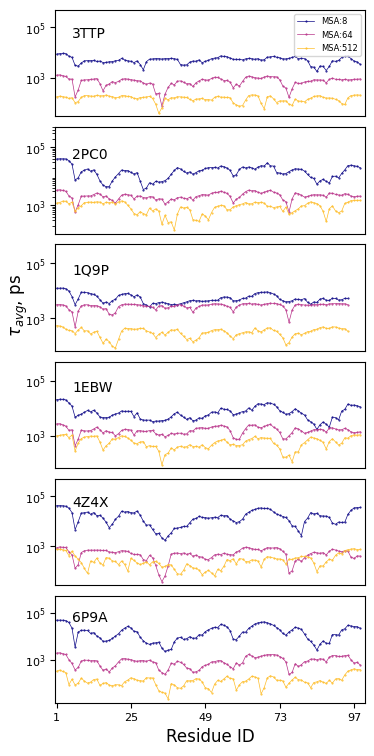

In [18]:
colors = plt.cm.plasma(np.linspace(0, 1, len(HA_tcf_calc[SYS]['AF2']['msas'])+1))

ig=plt.figure(figsize=(4,9))
for ss,sys in enumerate(sys_names):
  plt.subplot(len(sys_names),1,ss+1)
  for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
    if msa in selected_msa.keys():
      plt.plot(tau_avg_per_sys[sys][selected_msa[msa],:],'.-',linewidth=0.5,markersize=1,c=colors[mm],label=f'MSA:{msa}');
  plt.yscale('log');
  plt.xlim(-0.5,99.5);
  if ss==len(sys_names)-1:
    plt.xticks(np.arange(0,99,24),labels=[str(r) for r in range(1,100,24)],fontsize=8);
    plt.xlabel('Residue ID',fontname='Arial',fontsize=12);
  else:
    plt.xticks([]);
  if ss == 0:
    plt.legend(fontsize=6,loc='upper right');

  plt.ylim((0, 5e5));
  plt.yticks([1e3,1e5],fontsize=8);
  plt.text(x=5,y=4e4,s=f'{sys.upper()}',fontname='Arial',fontsize=10);
plt.text(x=-15,y=1e17,s=r'$\tau_{avg}$, ps',fontname='Arial',fontsize=12,rotation='vertical');
plt.tight_layout();
plt.subplots_adjust(hspace=0.1);
# plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/all_mutants_column.pdf',dpi=600);
plt.savefig('all_mutants_column.pdf',dpi=600);
plt.show()
plt.close()

/tmp/ipython-input-19-3816569216.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 5e5));
/tmp/ipython-input-19-3816569216.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 5e5));
/tmp/ipython-input-19-3816569216.py:23: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout();


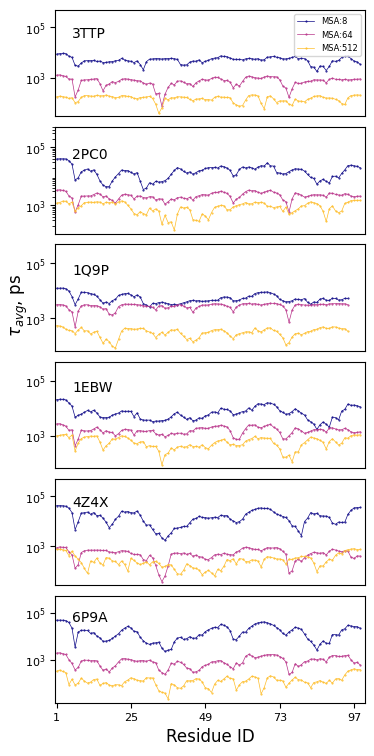

In [19]:
colors = plt.cm.plasma(np.linspace(0, 1, len(HA_tcf_calc[SYS]['AF2']['msas'])+1))

ig=plt.figure(figsize=(4,9))
for ss,sys in enumerate(sys_names):
  plt.subplot(len(sys_names),1,ss+1)
  for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
    if msa in selected_msa.keys():
      plt.plot(tau_avg_per_sys[sys][selected_msa[msa],:],'.-',linewidth=0.5,markersize=1,c=colors[mm],label=f'MSA:{msa}');
  plt.yscale('log');
  plt.xlim(-0.5,99.5);
  if ss==len(sys_names)-1:
    plt.xticks(np.arange(0,99,24),labels=[str(r) for r in range(1,100,24)],fontsize=8);
    plt.xlabel('Residue ID',fontname='Arial',fontsize=12);
  else:
    plt.xticks([]);
  if ss == 0:
    plt.legend(fontsize=6,loc='upper right');

  plt.ylim((0, 5e5));
  plt.yticks([1e3,1e5],fontsize=8);
  plt.text(x=5,y=4e4,s=f'{sys.upper()}',fontname='Arial',fontsize=10);
plt.text(x=-15,y=1e17,s=r'$\tau_{avg}$, ps',fontname='Arial',fontsize=12,rotation='vertical');
plt.tight_layout();
plt.subplots_adjust(hspace=0.1);
#plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/all_mutants_column.pdf',dpi=600);
#plt.savefig('all_mutants_column.pdf',dpi=600);
plt.show()
plt.close()

/tmp/ipython-input-20-194953993.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e5));


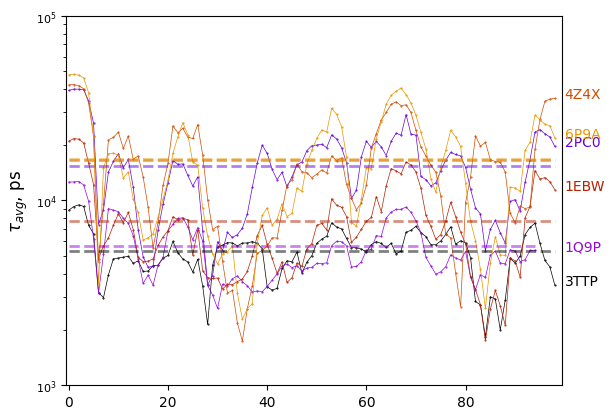

In [20]:
# all sequences, but just one MSA at a time
colors = plt.cm.gnuplot(np.linspace(0, 1, len(HA_tcf_calc.keys())+1))

#ig=plt.figure(figsize=(4,9))
avg8_list = []
std8_list = []
for ss,sys in enumerate(sys_names):
  #plt.subplot(len(sys_names),1,ss+1)
  for mm,msa in enumerate([8]):
    plt.plot(tau_avg_per_sys[sys][mm,:],'.-',linewidth=0.5,markersize=1,c=colors[ss],label=f'{HA_tcf_calc[sys]}');
    avg = np.mean(tau_avg_per_sys[sys][mm,:])
    std = np.std(tau_avg_per_sys[sys][mm,:])
    avg8_list.append(avg)
    std8_list.append(std)
    plt.errorbar(np.arange(len(tau_avg_per_sys[sys][mm,:])), avg * np.ones(len(tau_avg_per_sys[sys][mm,:])), yerr = std * np.ones(len(tau_avg_per_sys[sys][mm,:])),
                 ecolor = colors[ss], lw = 2, ls = '--', marker = None, capsize = 0, elinewidth = 0, alpha = 0.5, color = colors[ss])
    plt.text(x=100,y=tau_avg_per_sys[sys][mm,-1],s=f'{sys.upper()}',fontname='Arial',fontsize=10, color = colors[ss]);
plt.yscale('log');
plt.xlim(-0.5,99.5);

#plt.legend();

plt.ylim((0, 1e5));
plt.yticks([1e3,1e4,1e5],fontsize=8);

plt.ylabel(r'$\tau_{avg}$, ps',fontname='Arial',fontsize=12,rotation='vertical');
#plt.tight_layout();

#plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/all_mutants_column.pdf',dpi=600);
#plt.savefig('all_mutants_column.pdf',dpi=600);
plt.show()
plt.close()

/tmp/ipython-input-21-3406836215.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e4));


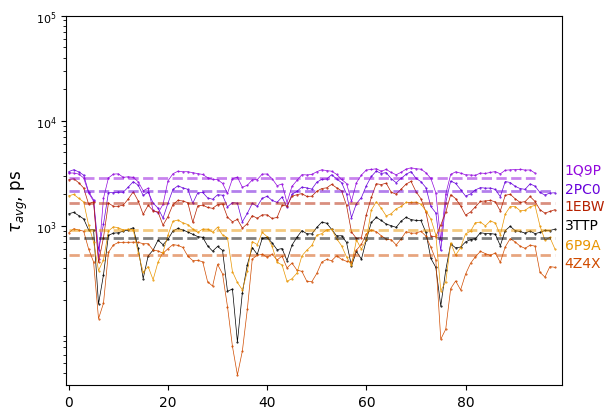

In [21]:
# all sequences, but just one MSA at a time
colors = plt.cm.gnuplot(np.linspace(0, 1, len(HA_tcf_calc.keys())+1))

#ig=plt.figure(figsize=(4,9))
avg64_list = []
std64_list = []
for ss,sys in enumerate(sys_names):
  #plt.subplot(len(sys_names),1,ss+1)
  for mm,msa in enumerate([64]):
    mm = 1
    plt.plot(tau_avg_per_sys[sys][mm,:],'.-',linewidth=0.5,markersize=1,c=colors[ss],label=f'{HA_tcf_calc[sys]}');
    avg = np.mean(tau_avg_per_sys[sys][mm,:])
    std = np.std(tau_avg_per_sys[sys][mm,:])
    avg64_list.append(avg)
    std64_list.append(std)
    plt.errorbar(np.arange(len(tau_avg_per_sys[sys][mm,:])), avg * np.ones(len(tau_avg_per_sys[sys][mm,:])), yerr = std * np.ones(len(tau_avg_per_sys[sys][mm,:])),
                 ecolor = colors[ss], lw = 2, ls = '--', marker = None, capsize = 0, elinewidth = 0, alpha = 0.5, color = colors[ss])
    plt.text(x=100,y=tau_avg_per_sys[sys][mm,-1],s=f'{sys.upper()}',fontname='Arial',fontsize=10, color = colors[ss]);
plt.yscale('log');
plt.xlim(-0.5,99.5);

#plt.legend();

plt.ylim((0, 1e4));
plt.yticks([1e3,1e4,1e5],fontsize=8);

plt.ylabel(r'$\tau_{avg}$, ps',fontname='Arial',fontsize=12,rotation='vertical');
#plt.tight_layout();

#plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/all_mutants_column.pdf',dpi=600);
#plt.savefig('all_mutants_column.pdf',dpi=600);
plt.show()
plt.close()

/tmp/ipython-input-22-573308501.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e5));


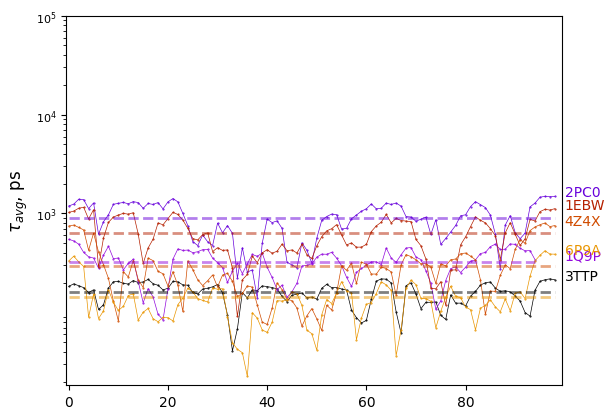

In [22]:
# all sequences, but just one MSA at a time
colors = plt.cm.gnuplot(np.linspace(0, 1, len(HA_tcf_calc.keys())+1))

#ig=plt.figure(figsize=(4,9))
avg512_list = []
std512_list = []
for ss,sys in enumerate(sys_names):
  #plt.subplot(len(sys_names),1,ss+1)
  for mm,msa in enumerate([512]):
    mm = 2
    plt.plot(tau_avg_per_sys[sys][mm,:],'.-',linewidth=0.5,markersize=1,c=colors[ss],label=f'{HA_tcf_calc[sys]}');
    avg = np.mean(tau_avg_per_sys[sys][mm,:])
    std = np.std(tau_avg_per_sys[sys][mm,:])
    avg512_list.append(avg)
    std512_list.append(std)
    plt.errorbar(np.arange(len(tau_avg_per_sys[sys][mm,:])), avg * np.ones(len(tau_avg_per_sys[sys][mm,:])), yerr = std * np.ones(len(tau_avg_per_sys[sys][mm,:])),
                 ecolor = colors[ss], lw = 2, ls = '--', marker = None, capsize = 0, elinewidth = 0, alpha = 0.5, color = colors[ss])
    plt.text(x=100,y=tau_avg_per_sys[sys][mm,-1],s=f'{sys.upper()}',fontname='Arial',fontsize=10, color = colors[ss]);
plt.yscale('log');
plt.xlim(-0.5,99.5);

#plt.legend();

plt.ylim((0, 1e5));
plt.yticks([1e3,1e4,1e5],fontsize=8);

plt.ylabel(r'$\tau_{avg}$, ps',fontname='Arial',fontsize=12,rotation='vertical');
#plt.tight_layout();

#plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/all_mutants_column.pdf',dpi=600);
#plt.savefig('all_mutants_column.pdf',dpi=600);
plt.show()
plt.close()

In [23]:
# distance from WT
# ['3ttp', '2pc0', '1q9p', '1ebw', '4z4x', '6p9a']
# 3ttp, 2pc0, 1q9p, 1ebw, 4z4x, 6p9a
WT_dist = [23, 5, 0, 5, 20, 22]

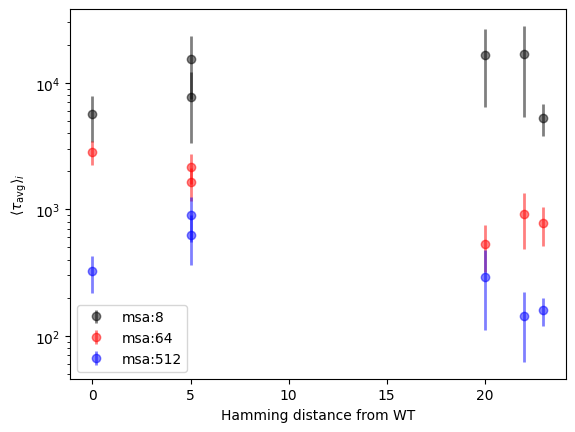

In [24]:
plt.errorbar(WT_dist, avg8_list, yerr = std8_list, lw = 0, marker = 'o', c = 'k', elinewidth = 2, alpha = 0.5, label = 'msa:8')
plt.errorbar(WT_dist, avg64_list, yerr = std64_list, lw = 0, marker = 'o', c = 'r', elinewidth = 2, alpha = 0.5, label = 'msa:64')
plt.errorbar(WT_dist, avg512_list, yerr = std512_list, lw = 0, marker = 'o', c = 'b', elinewidth = 2, alpha = 0.5, label = 'msa:512')
plt.yscale('log')
plt.xlabel('Hamming distance from WT')
plt.ylabel(r'$\langle \tau_{\text{avg}}\rangle_i$')
plt.legend()
plt.show()
plt.close()

In [25]:
# plot each residue's decorration time independently as a function of Hamming distance
# from wildtype

# all sequences, but just one MSA at a time
colors = plt.cm.gnuplot(np.linspace(0, 1, len(HA_tcf_calc.keys())+1))

#ig=plt.figure(figsize=(4,9))
# hardcode!
res8 = np.zeros((len(sys_names), 99))
for ss,sys in enumerate(sys_names):
  #plt.subplot(len(sys_names),1,ss+1)
  for mm,msa in enumerate([8]):
    res8[ss,:len(tau_avg_per_sys[sys][mm,:])] = tau_avg_per_sys[sys][mm,:]


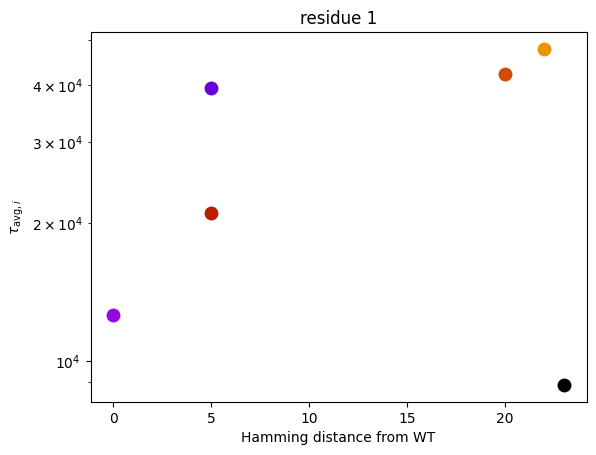

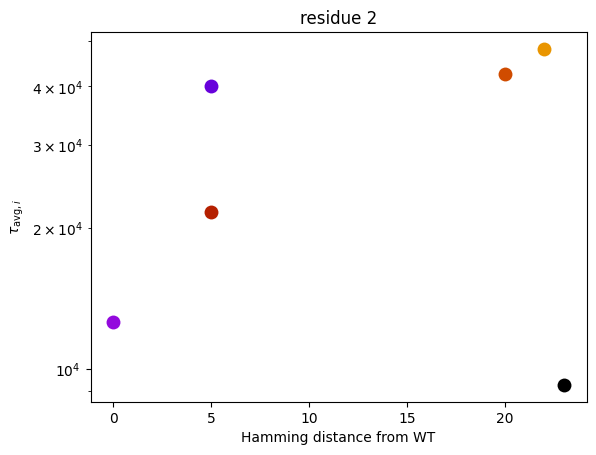

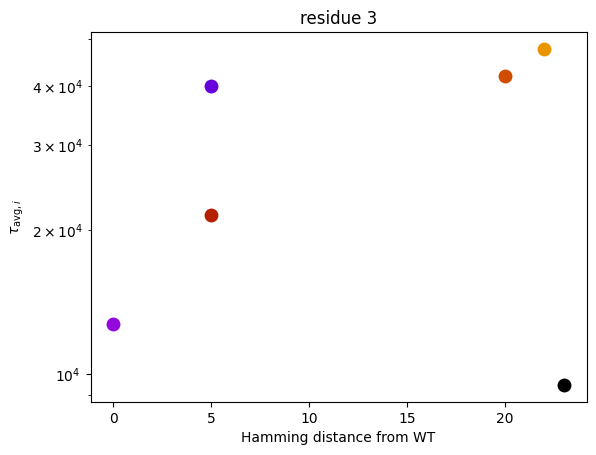

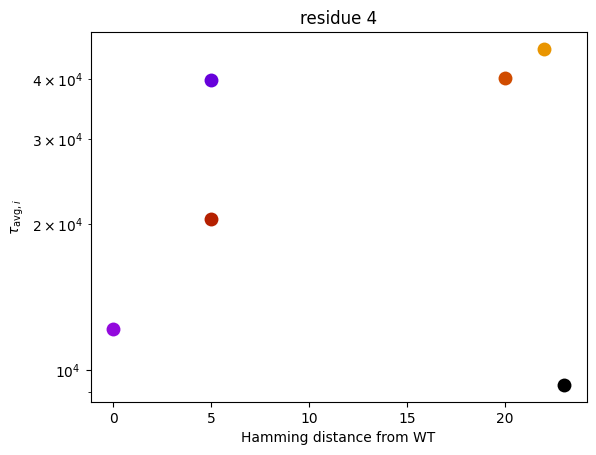

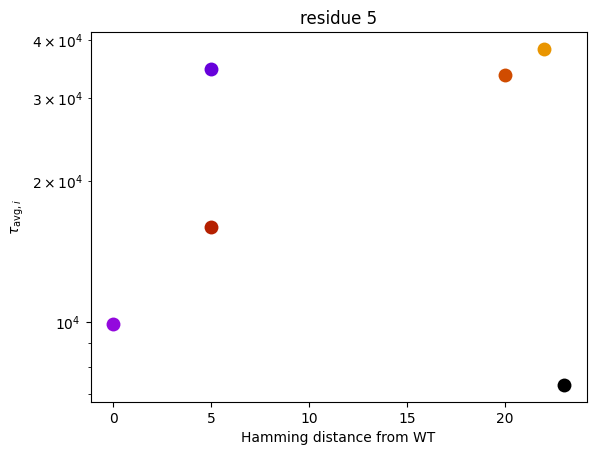

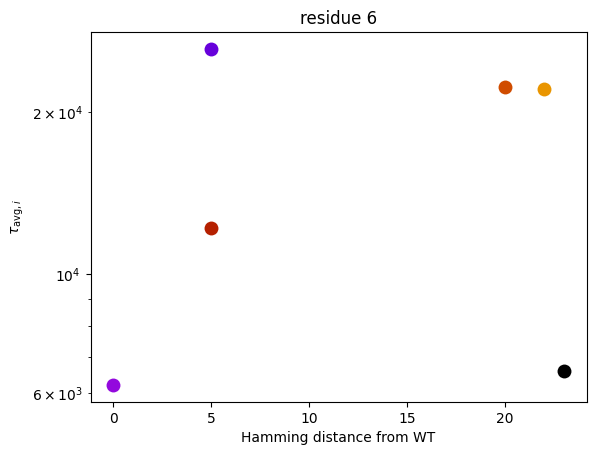

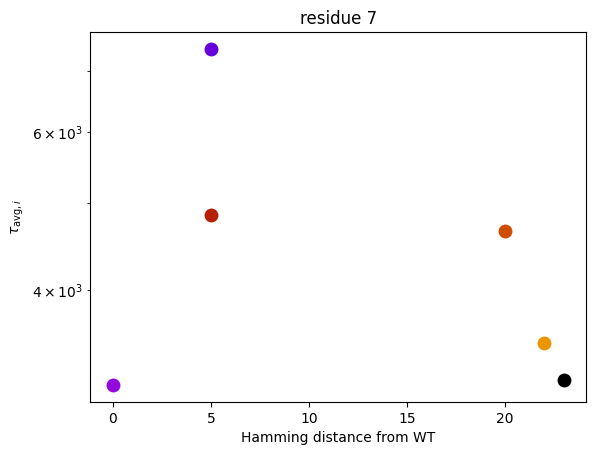

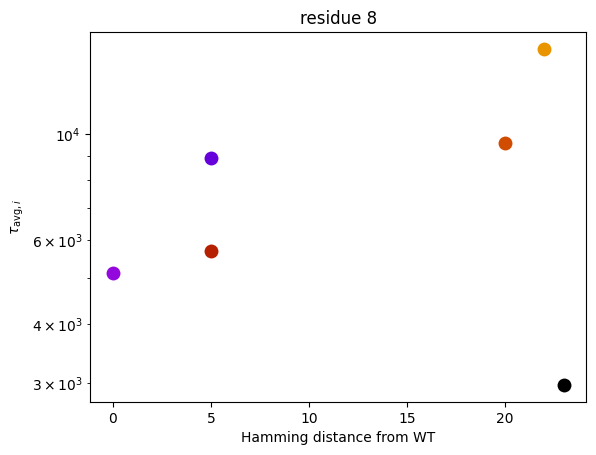

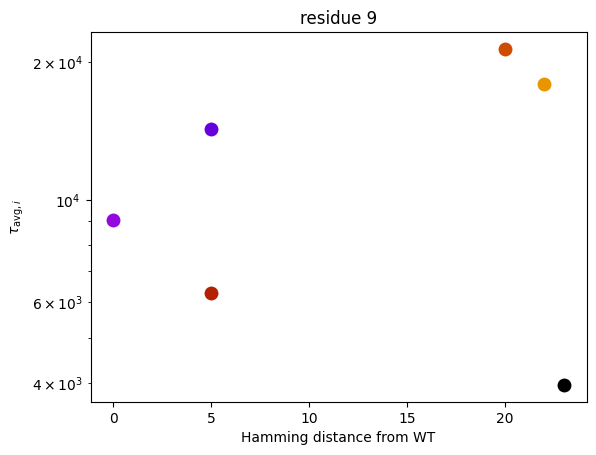

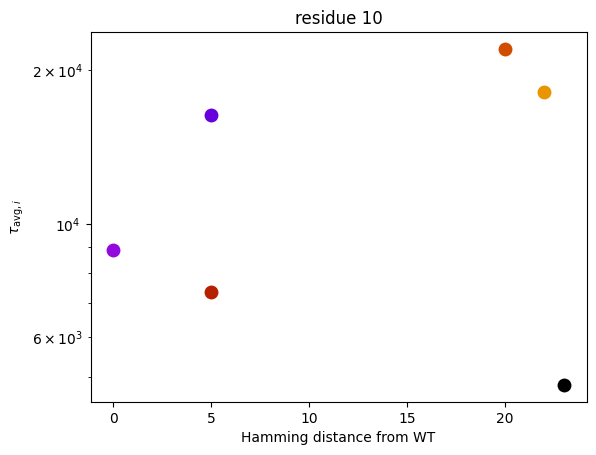

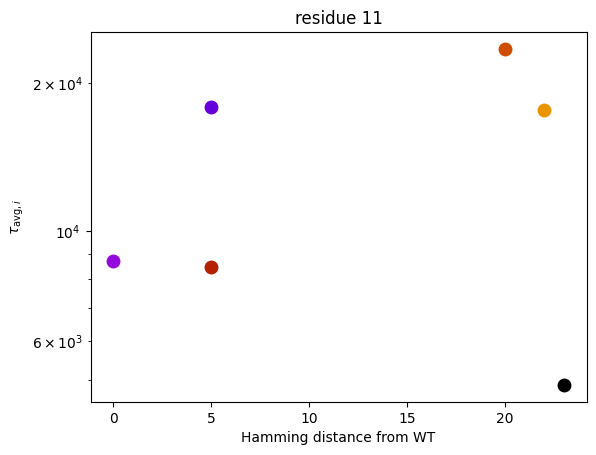

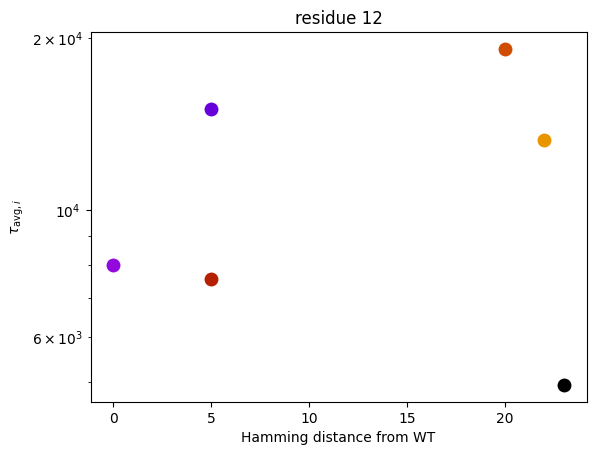

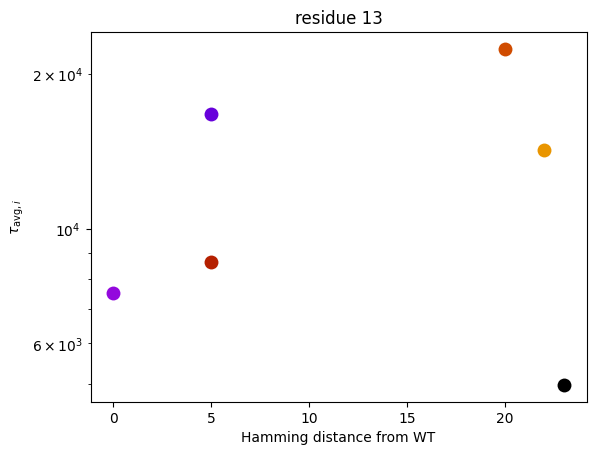

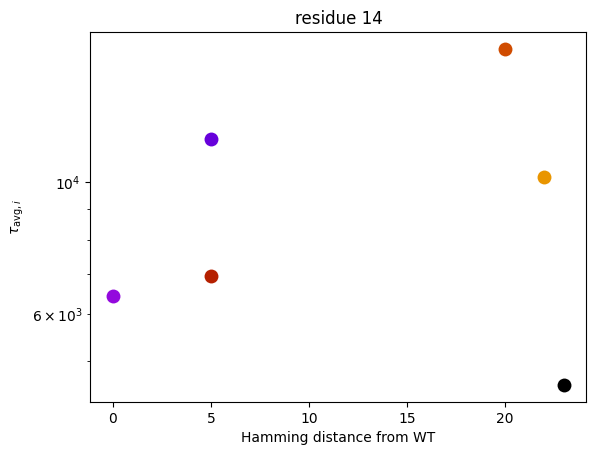

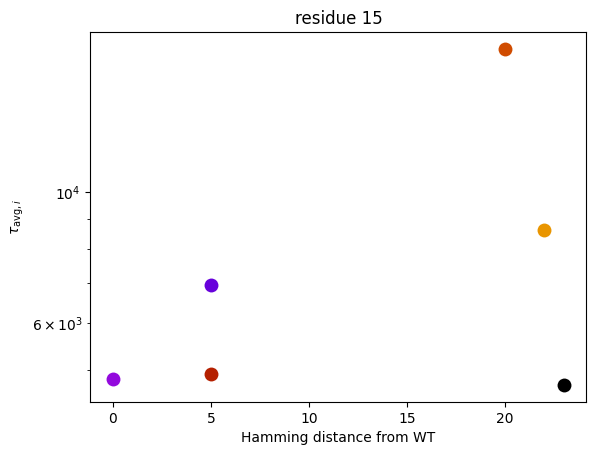

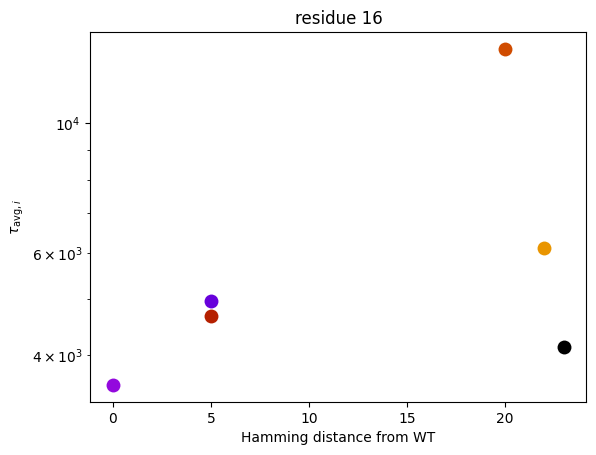

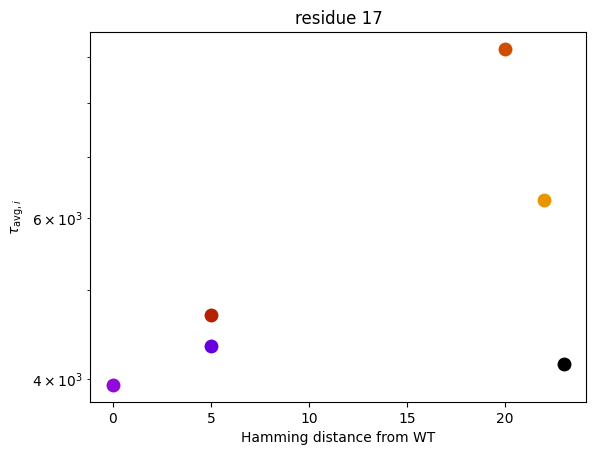

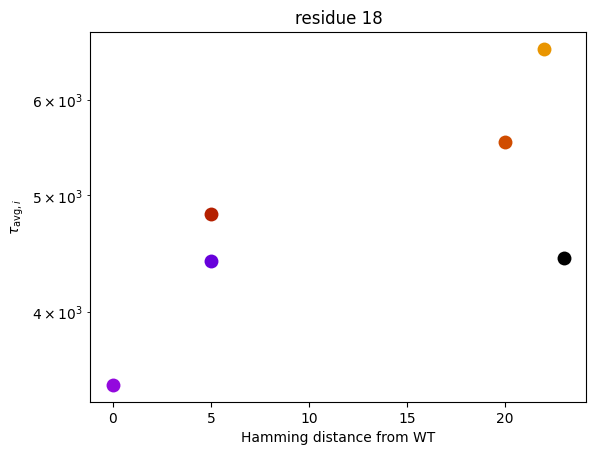

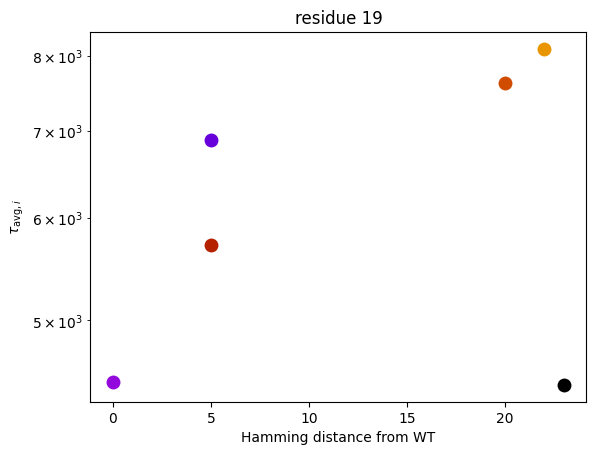

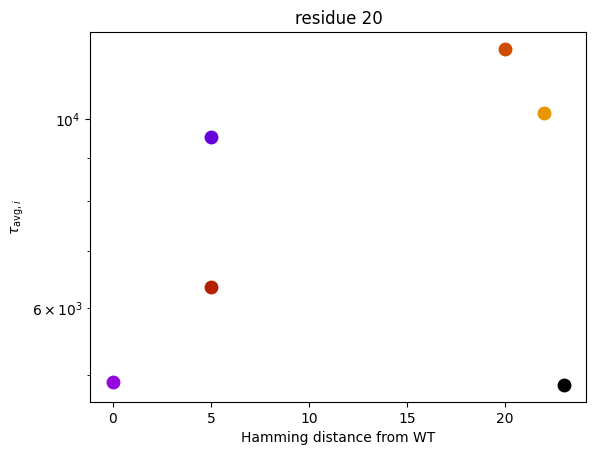

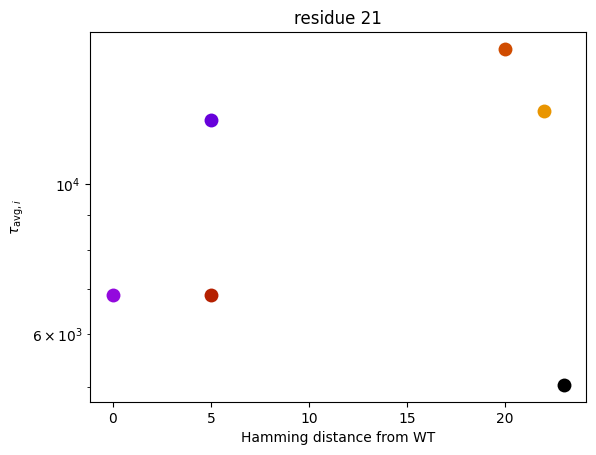

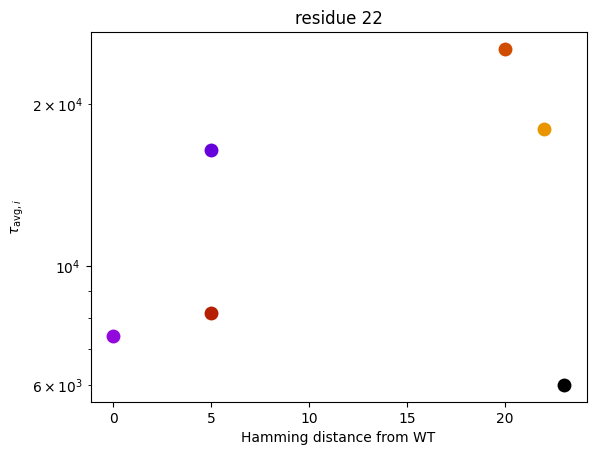

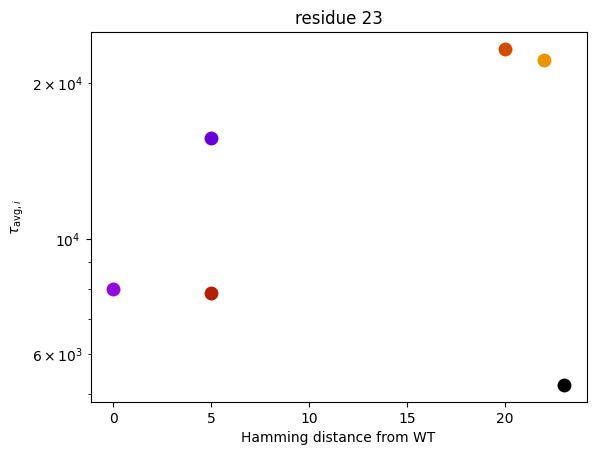

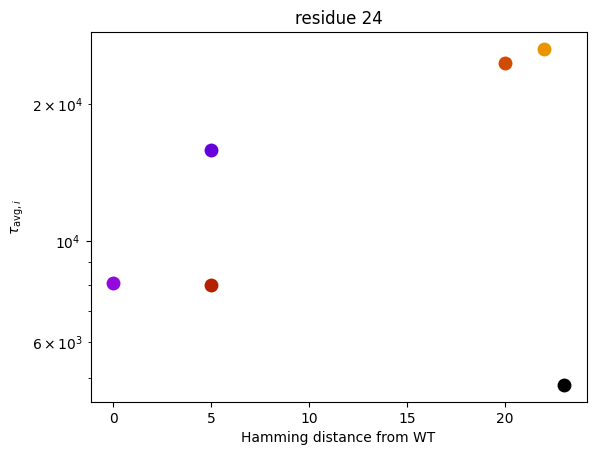

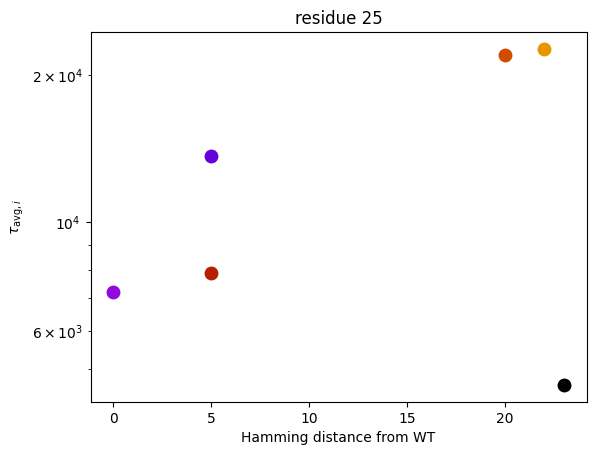

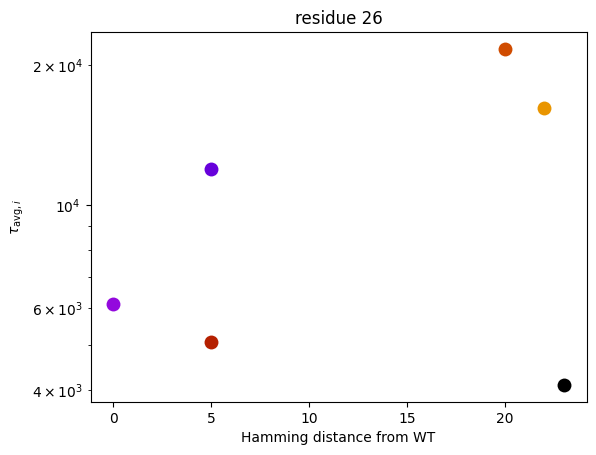

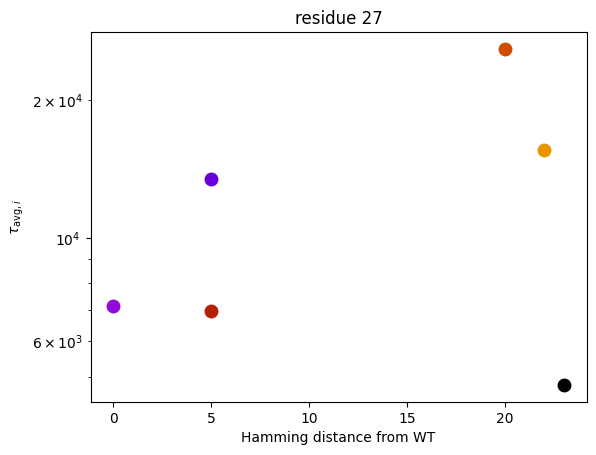

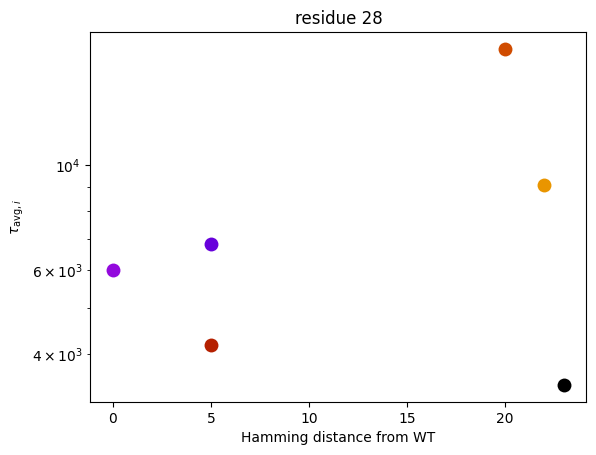

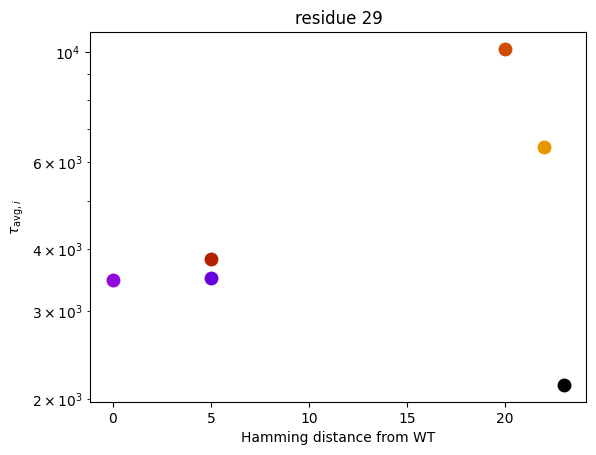

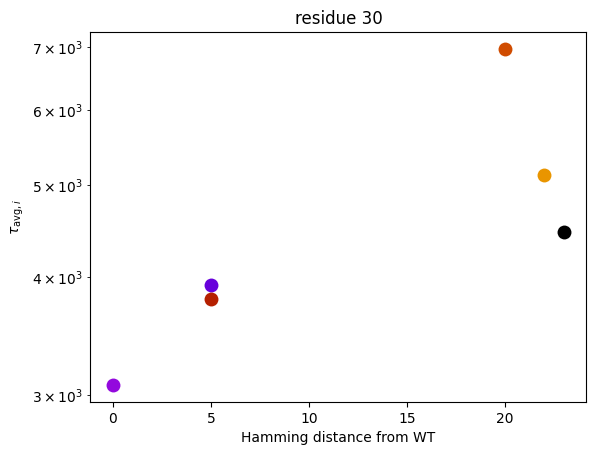

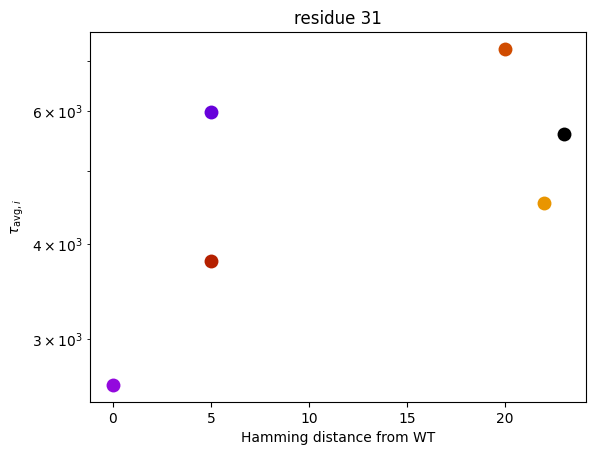

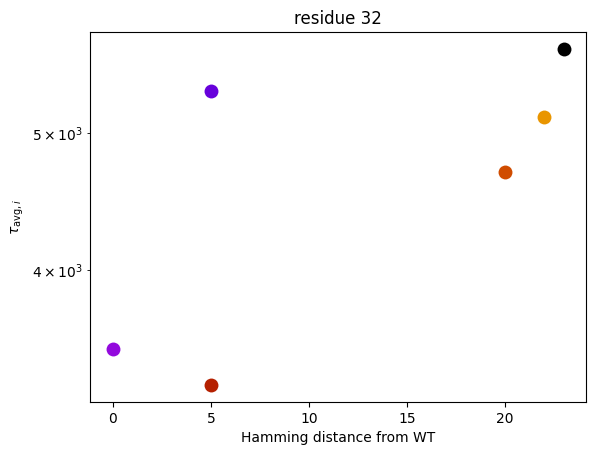

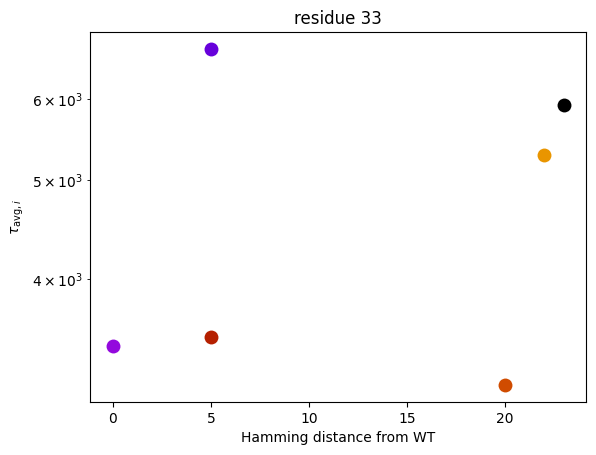

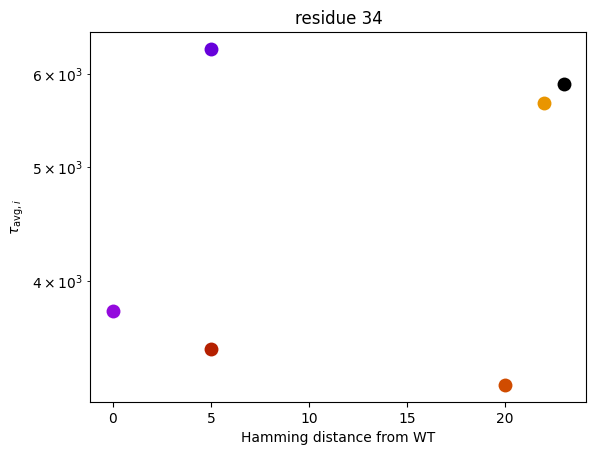

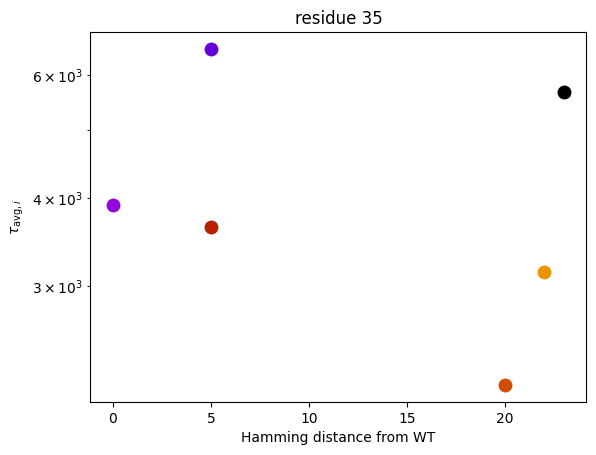

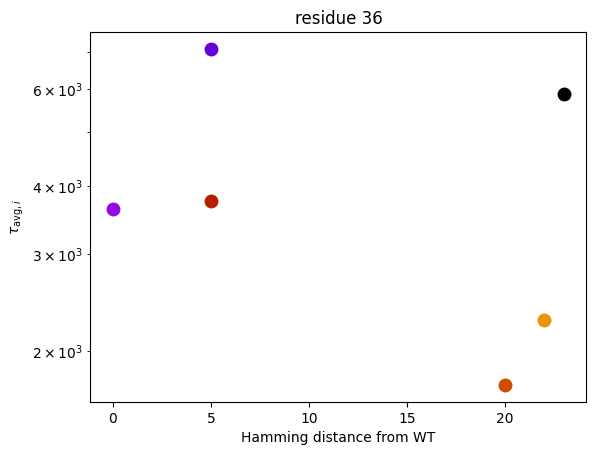

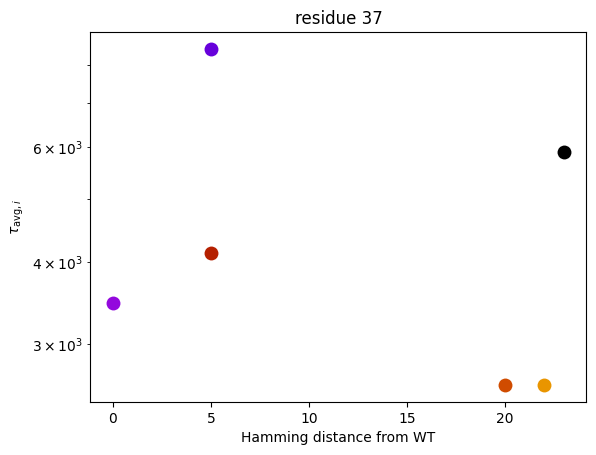

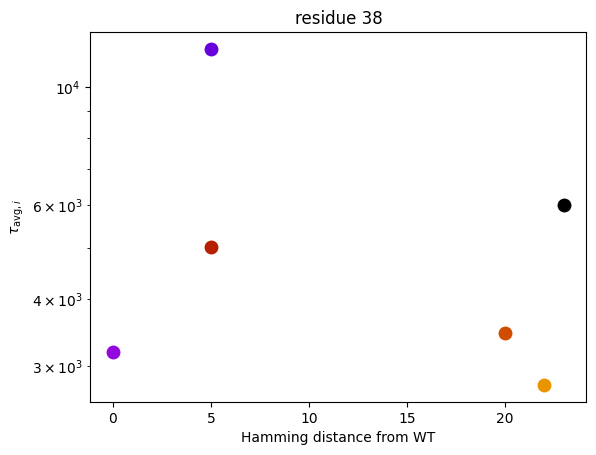

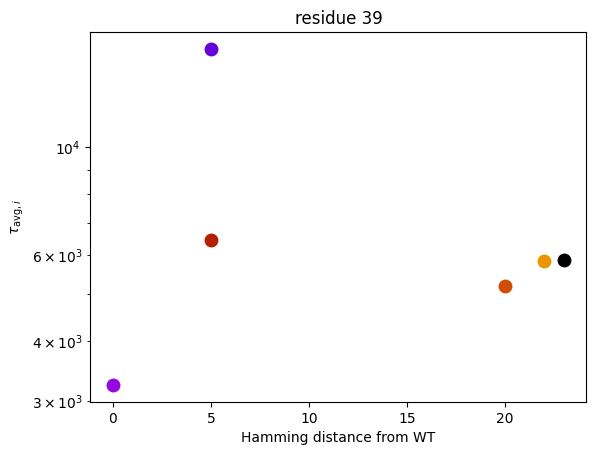

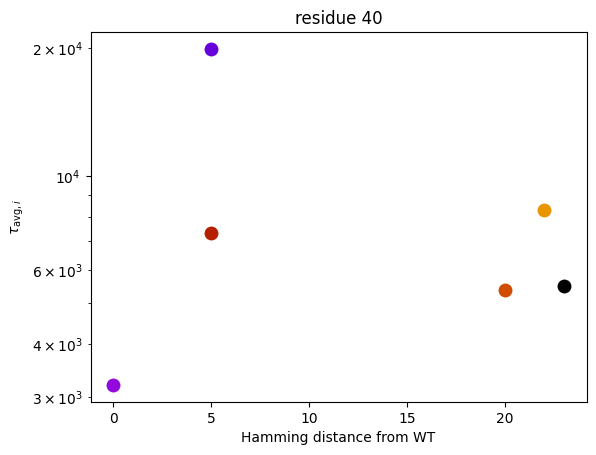

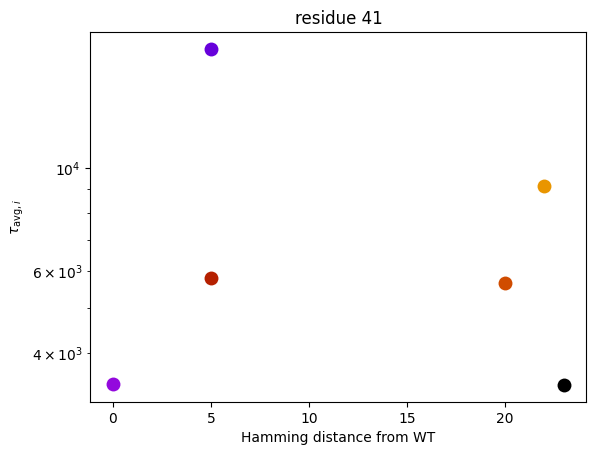

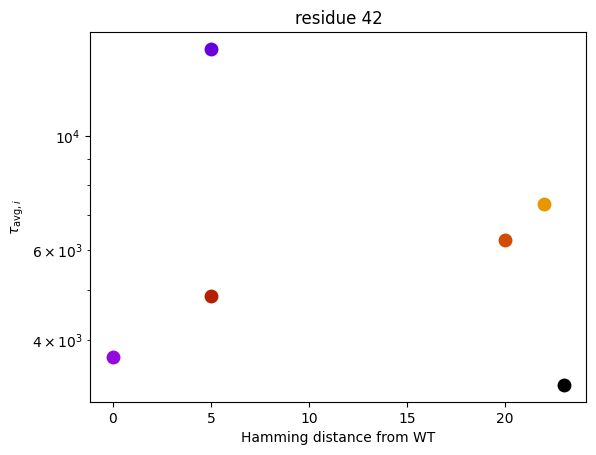

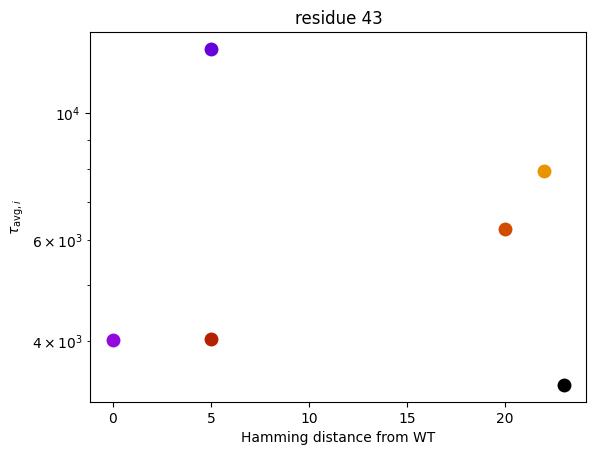

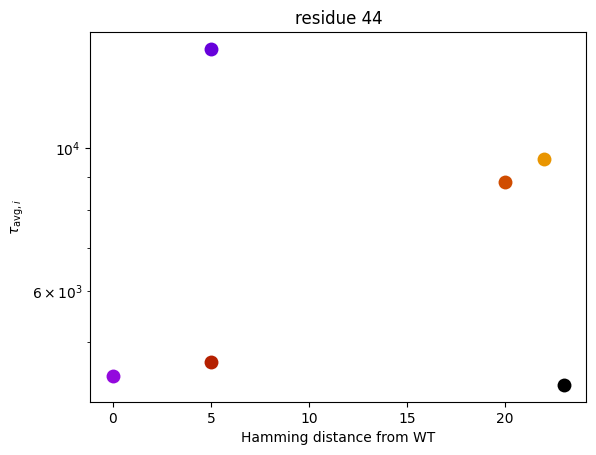

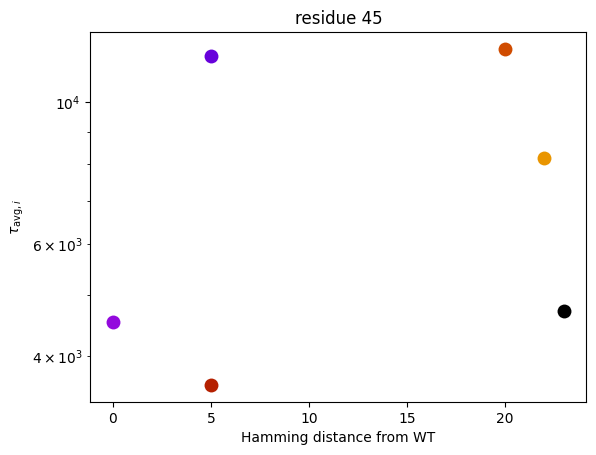

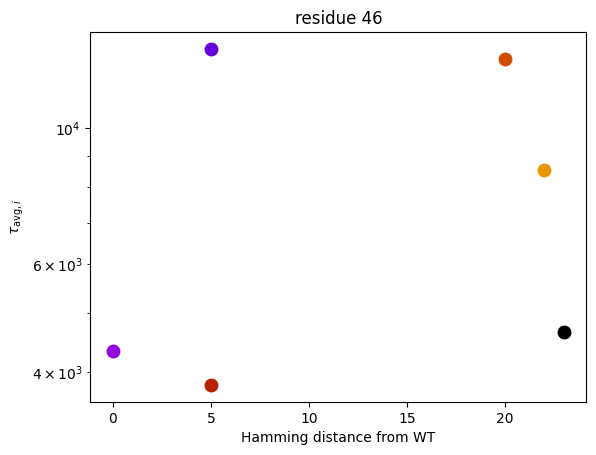

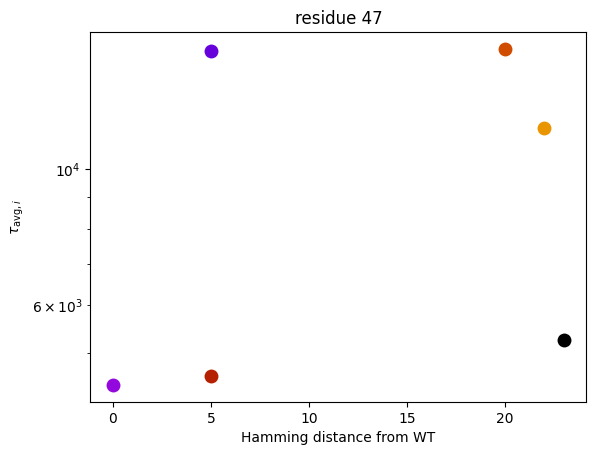

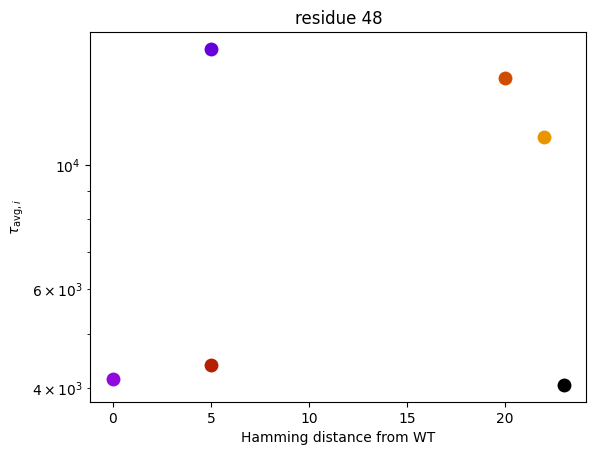

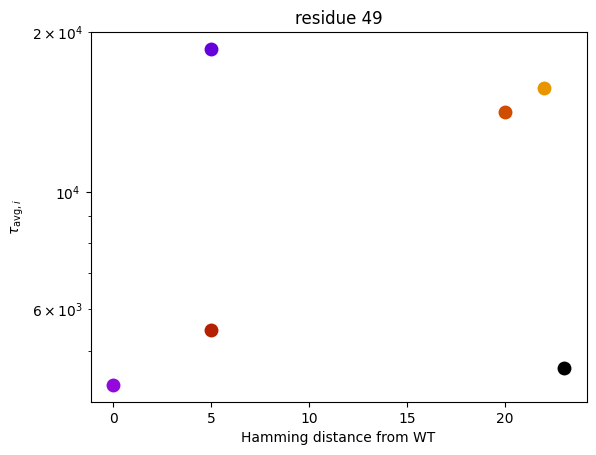

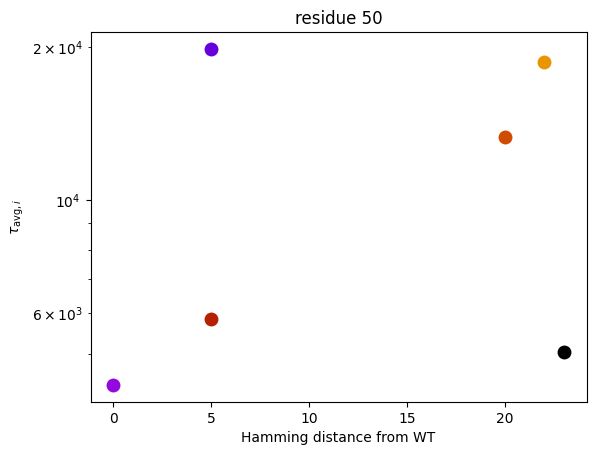

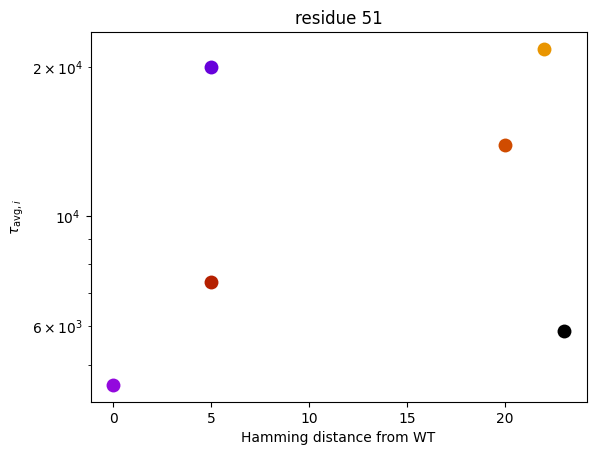

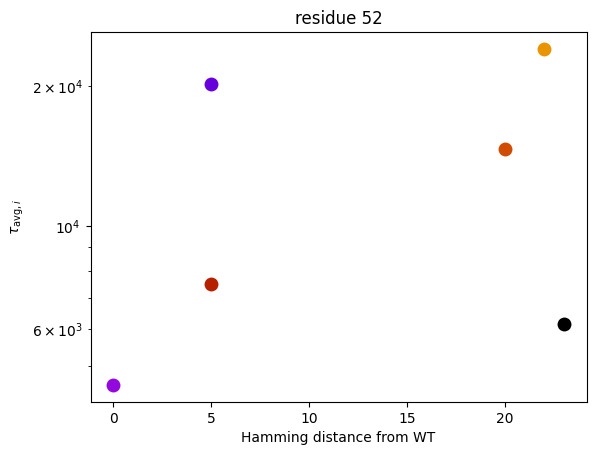

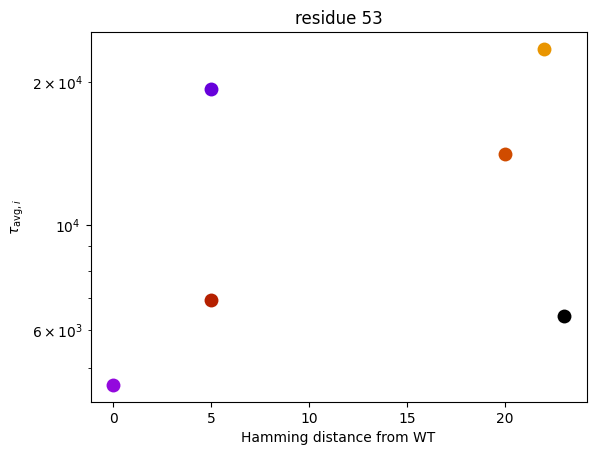

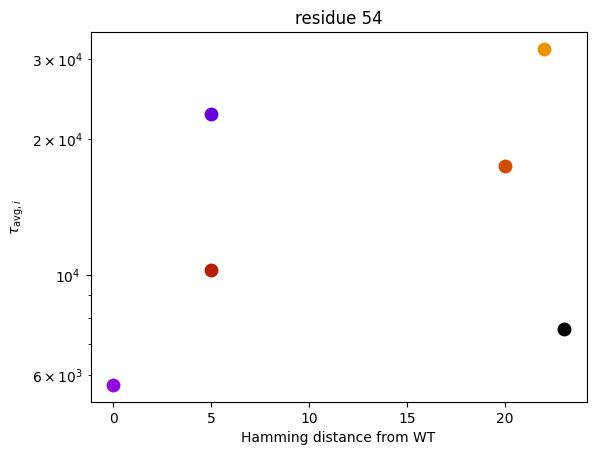

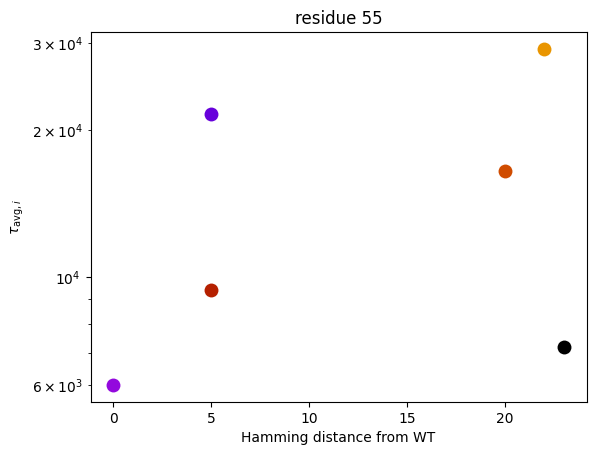

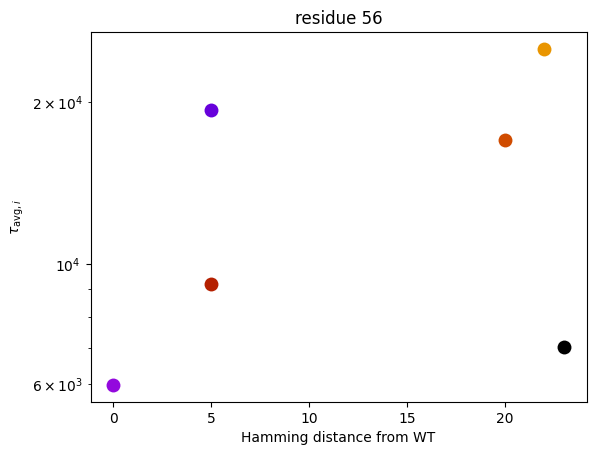

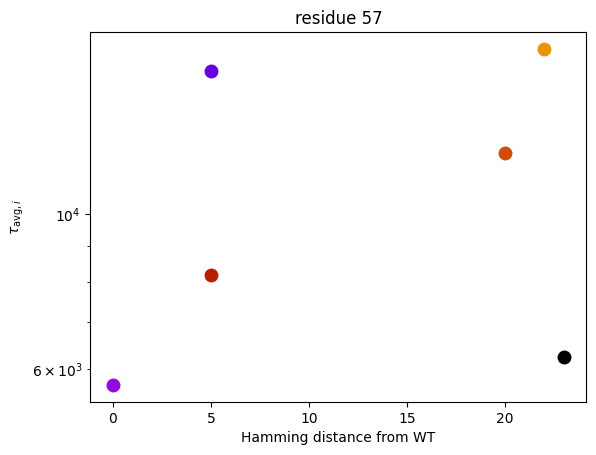

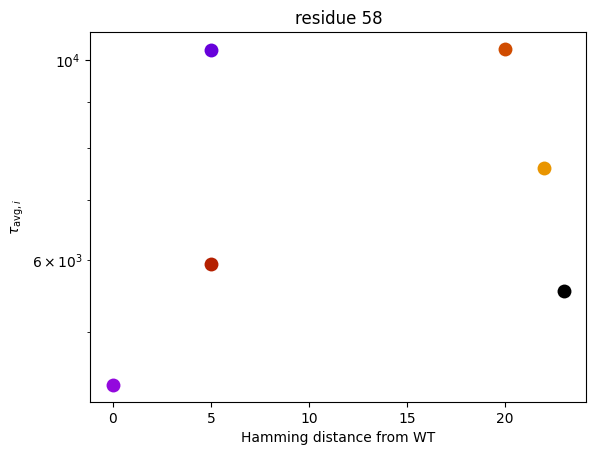

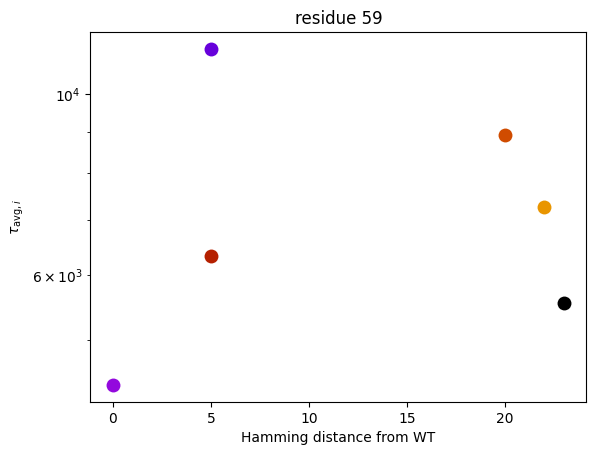

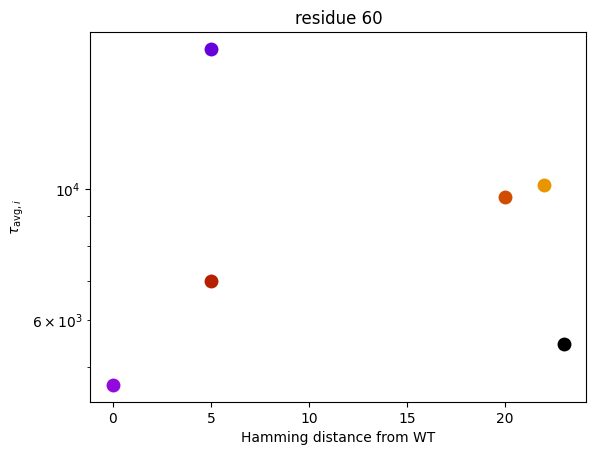

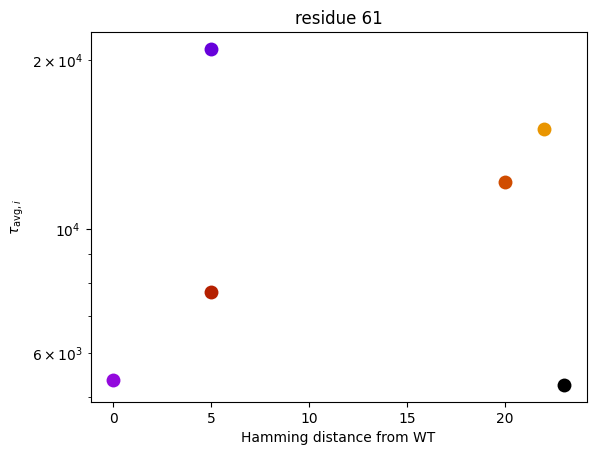

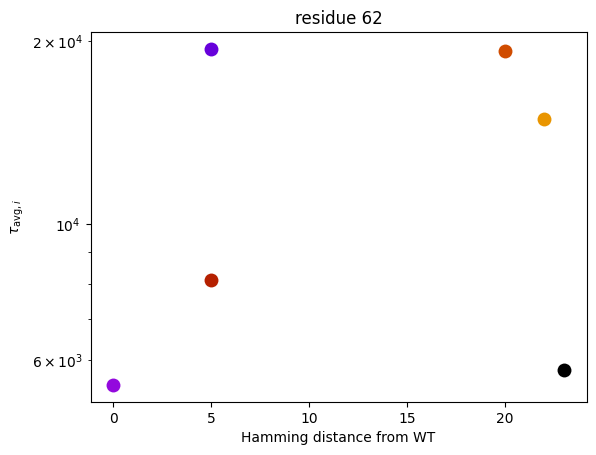

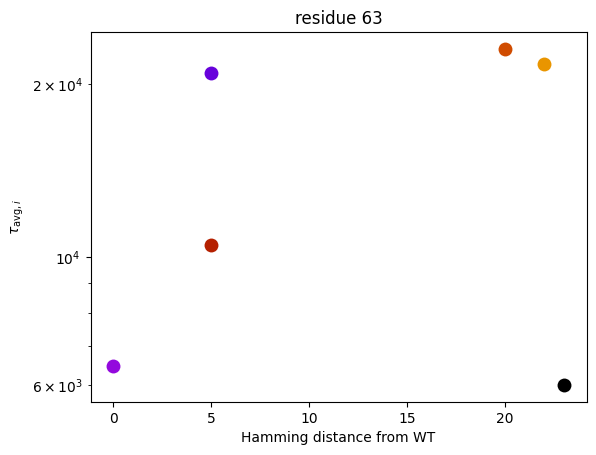

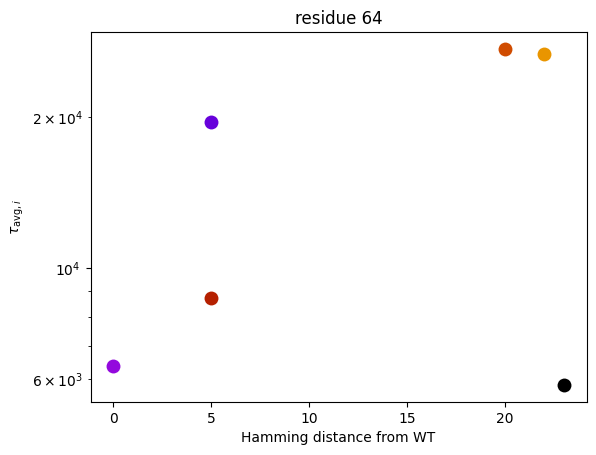

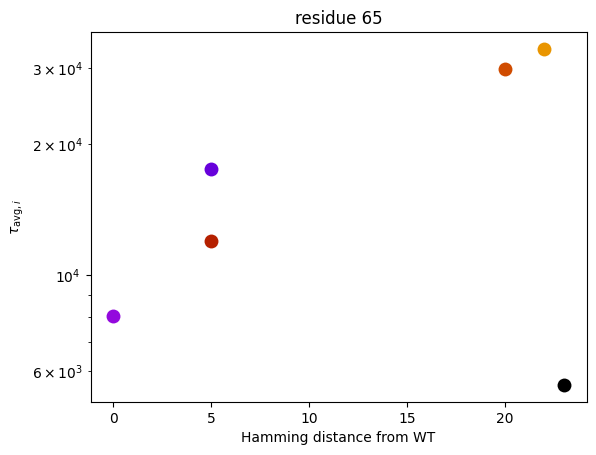

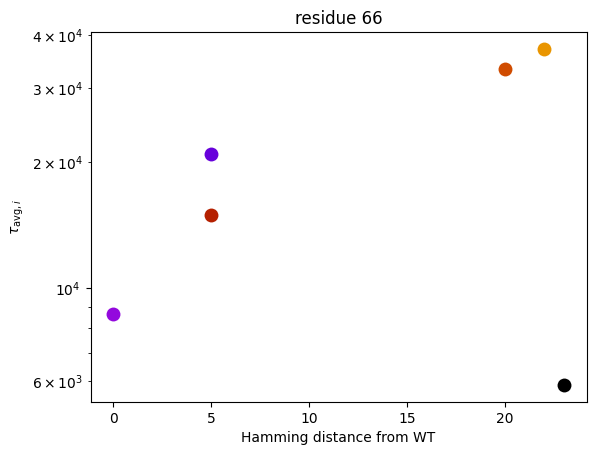

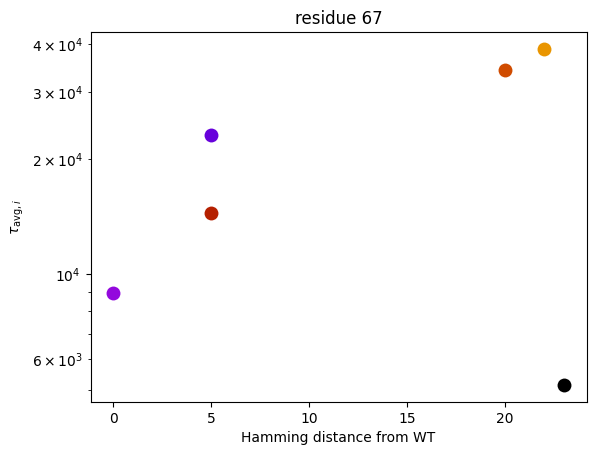

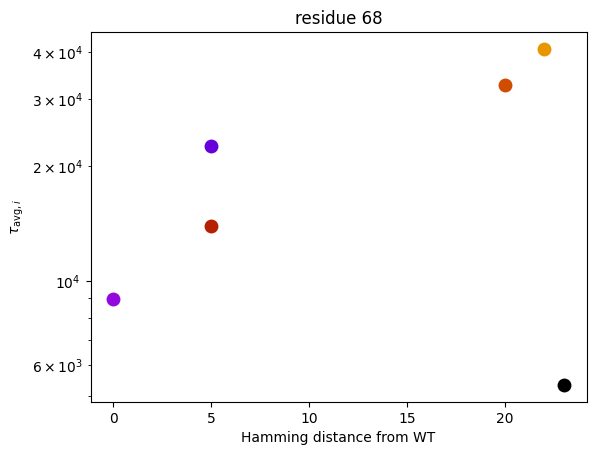

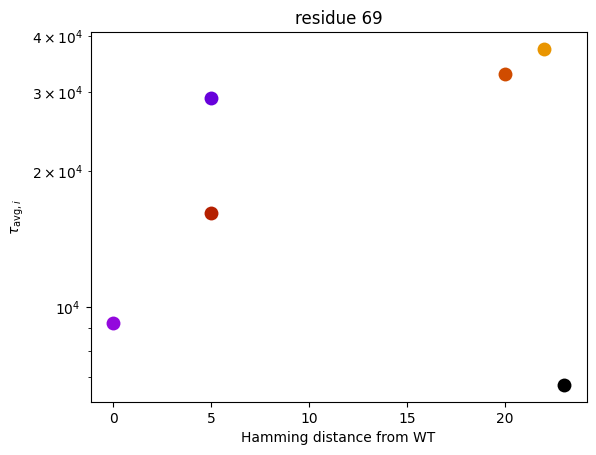

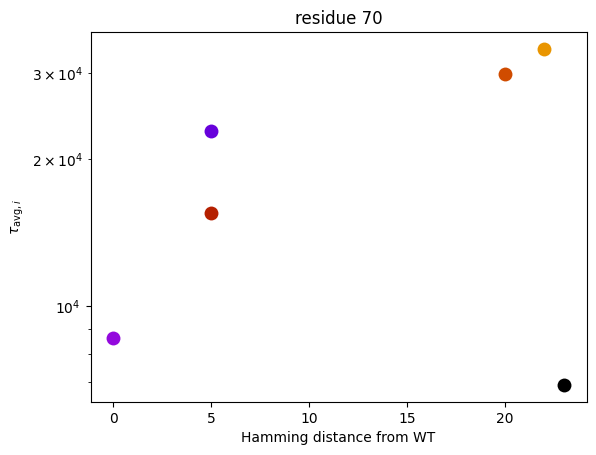

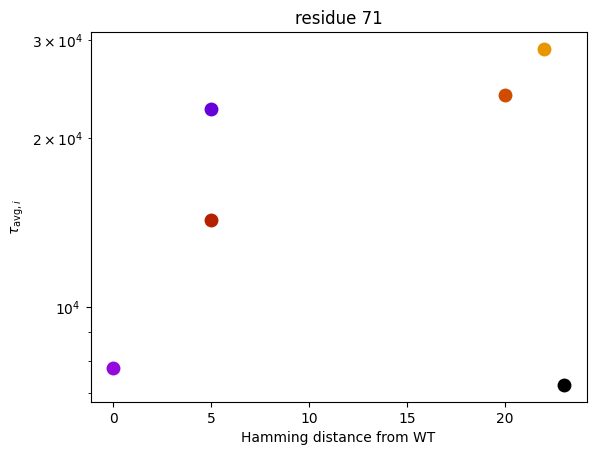

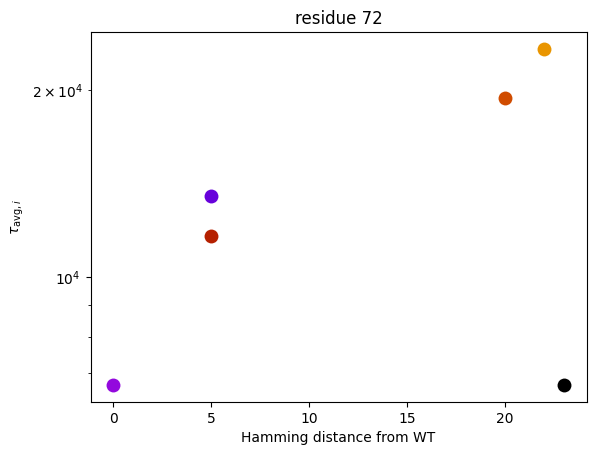

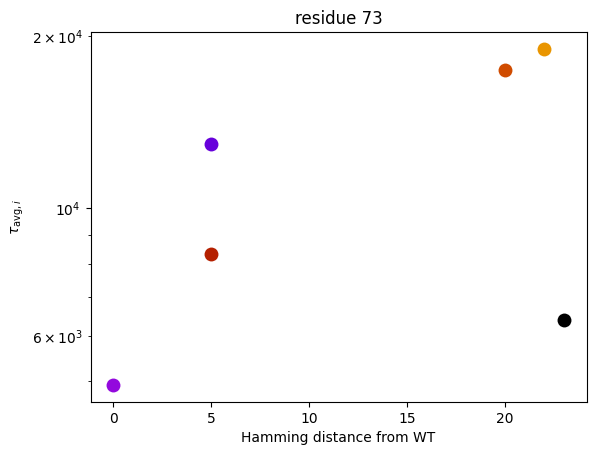

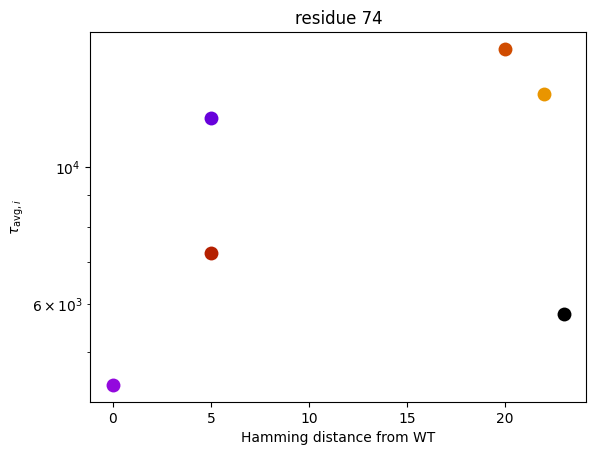

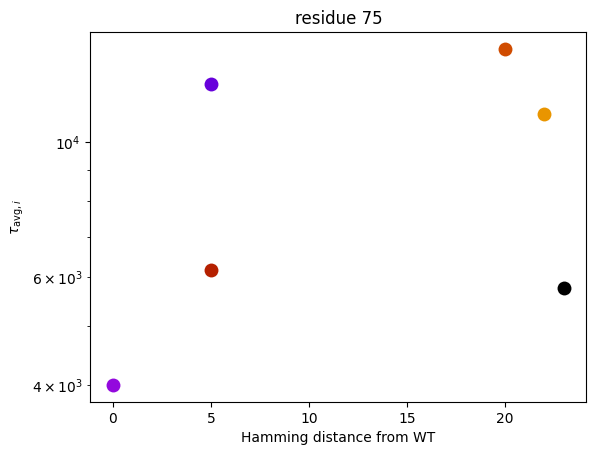

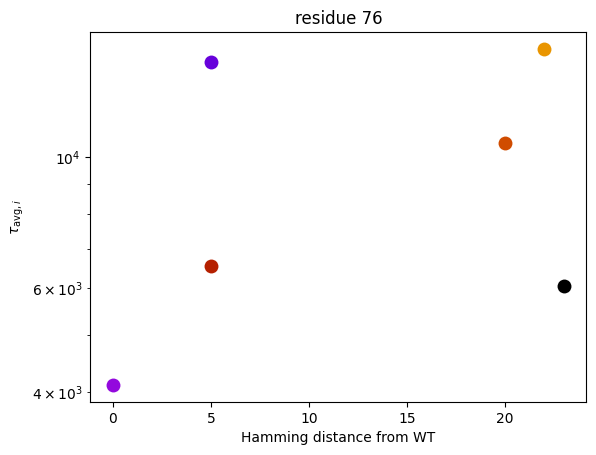

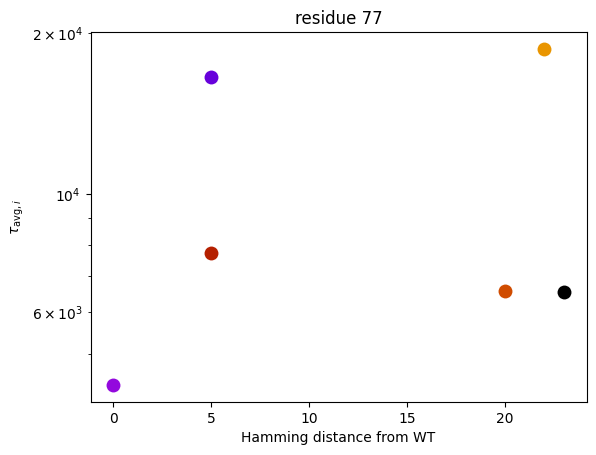

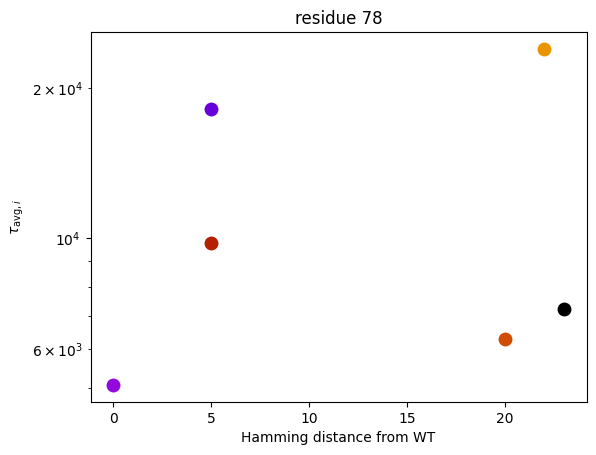

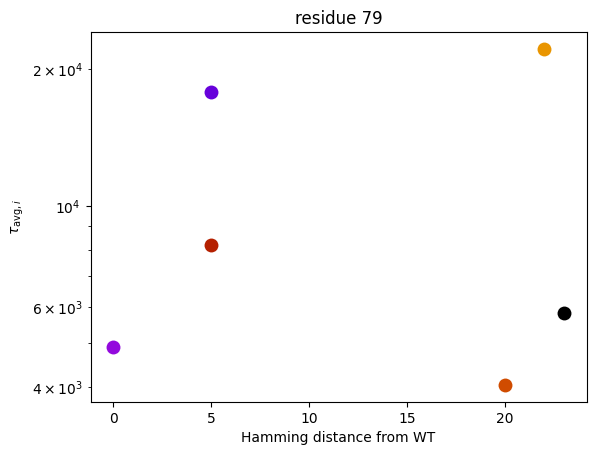

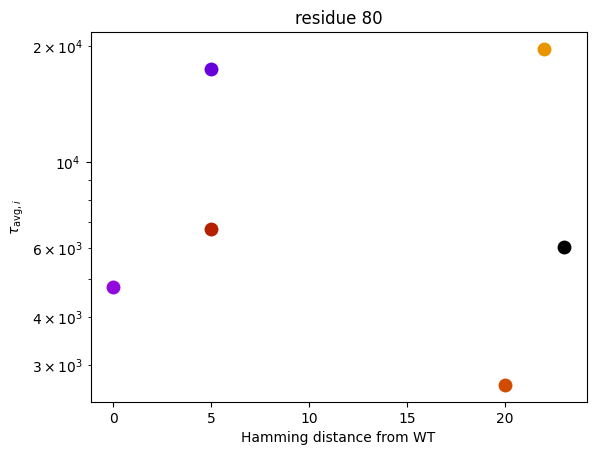

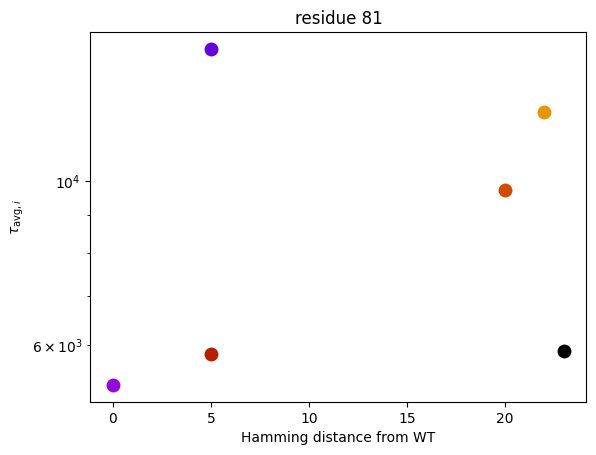

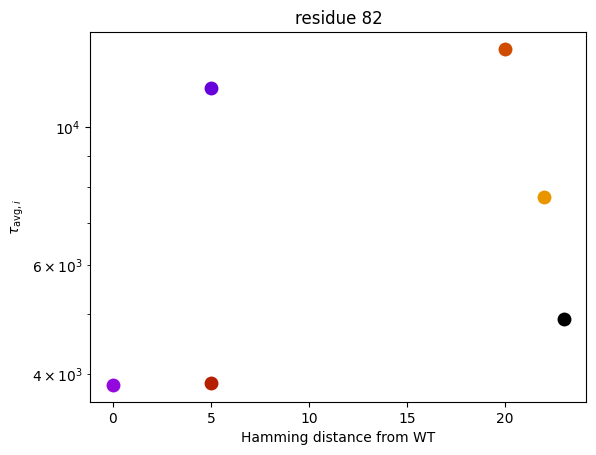

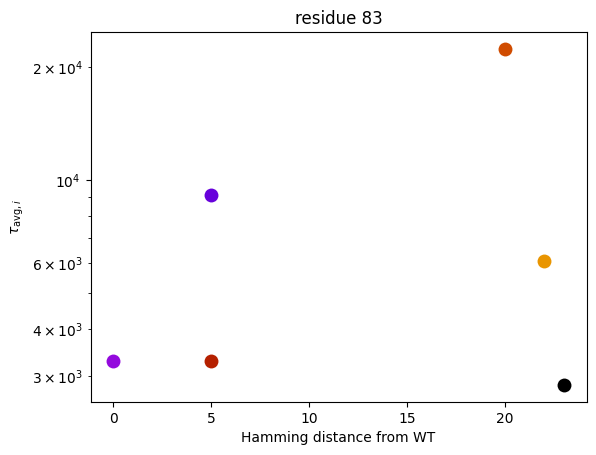

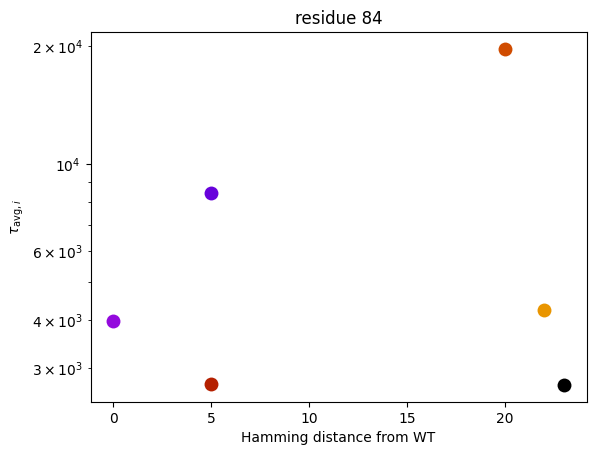

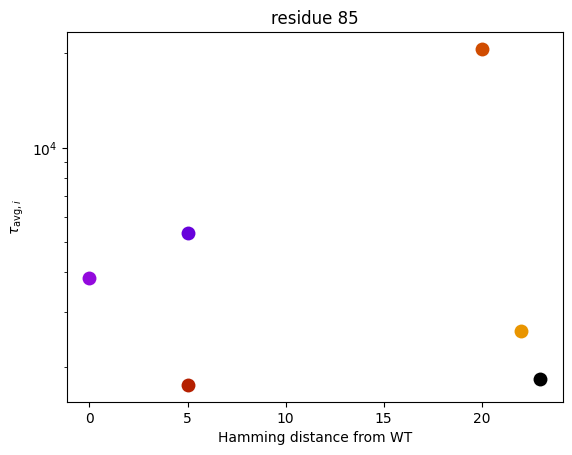

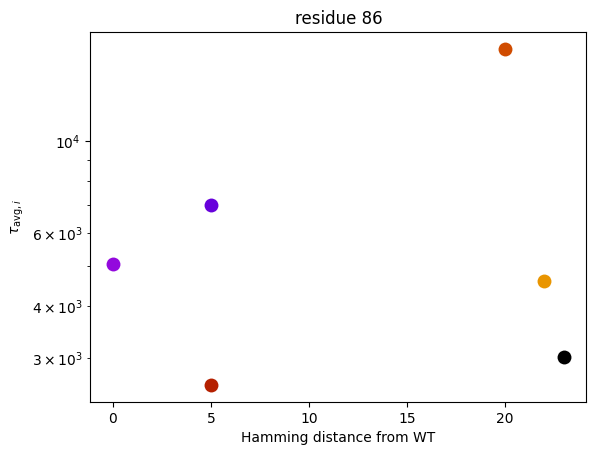

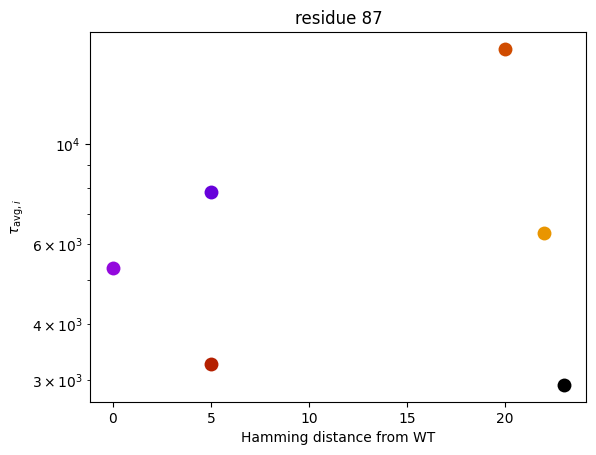

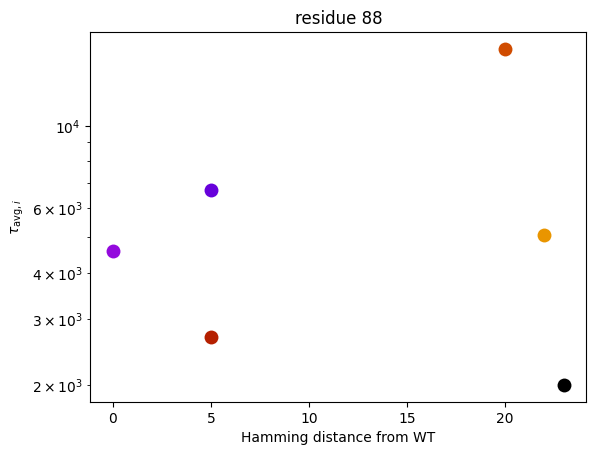

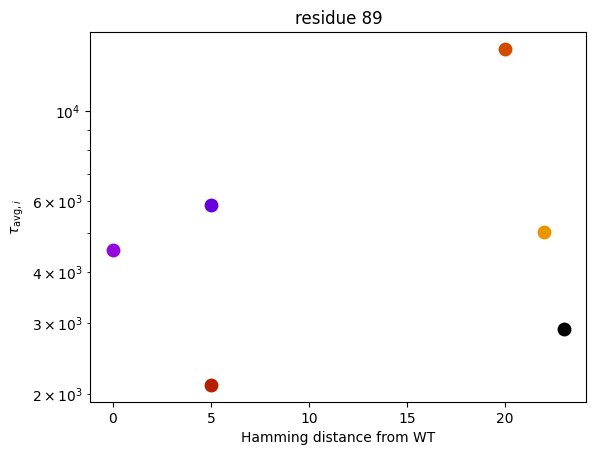

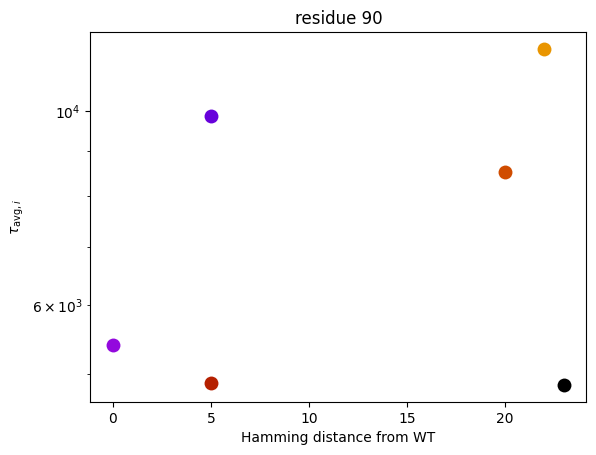

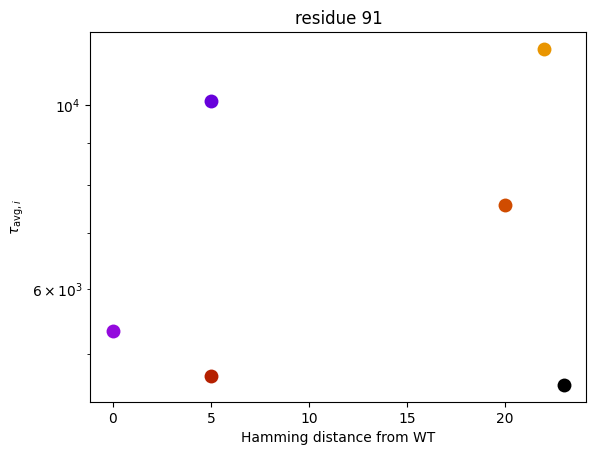

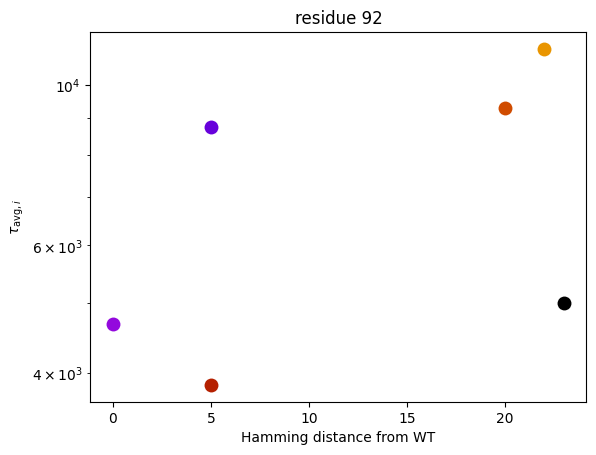

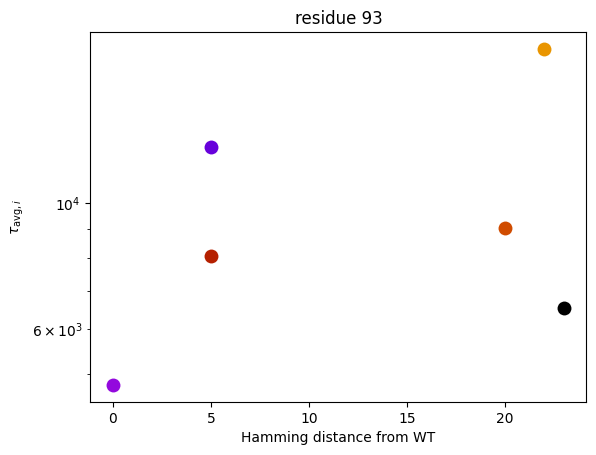

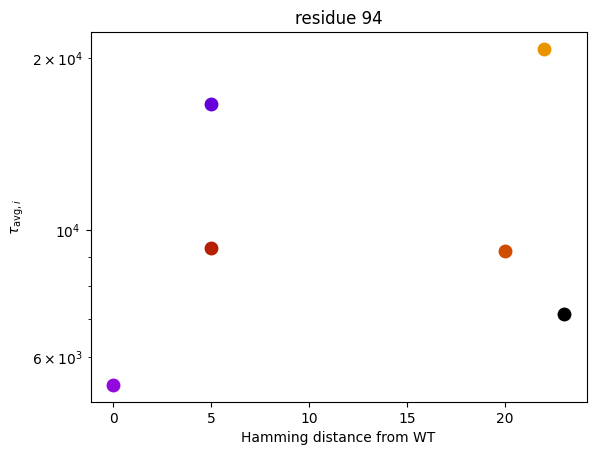

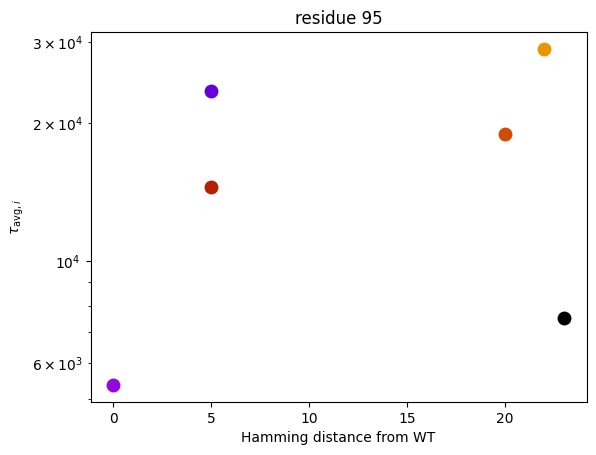

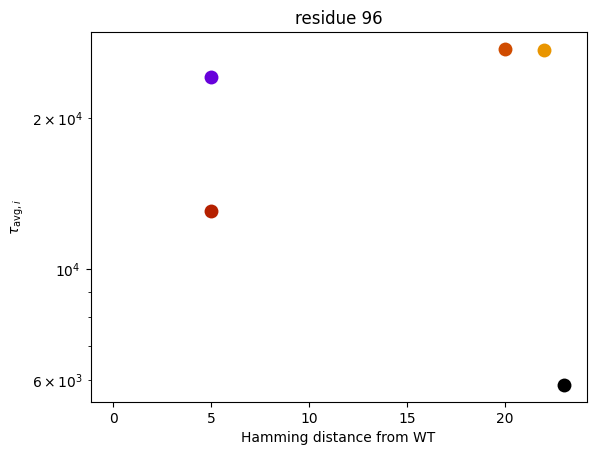

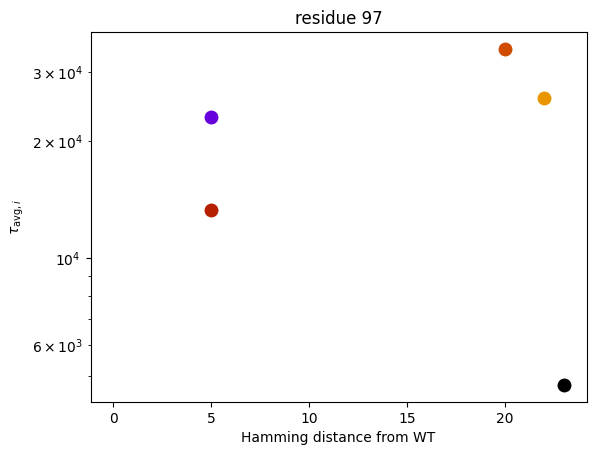

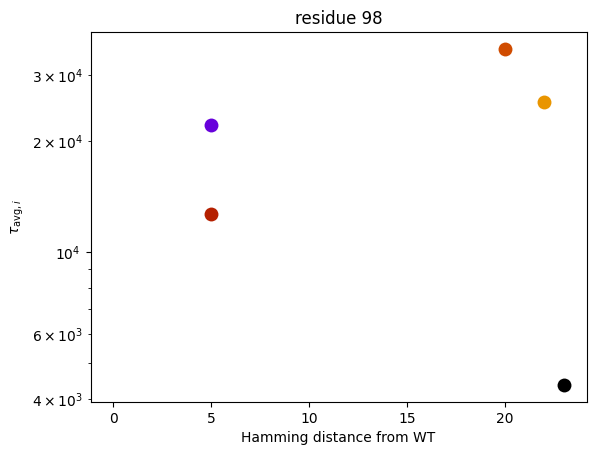

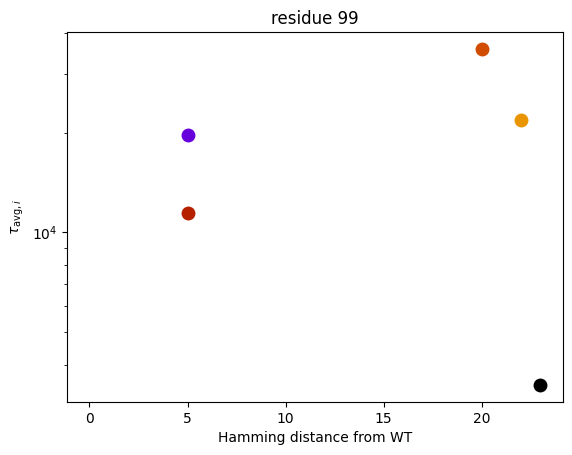

In [26]:
for i in range(res8.shape[1]):
  for j in range(res8.shape[0]):
    plt.scatter(WT_dist[j], res8[j,i], lw = 0, color = colors[j], s = 100)
  plt.title(f'residue {i + 1}')
  plt.xlabel('Hamming distance from WT')
  plt.ylabel(r'$\tau_{\text{avg},i}$')
  plt.yscale('log')
  plt.show()
  plt.close()

In [ ]:
# plot each residue's decorration time independently as a function of Hamming distance
# from wildtype

# all sequences, but just one MSA at a time
colors = plt.cm.gnuplot(np.linspace(0, 1, len(HA_tcf_calc.keys())+1))

#ig=plt.figure(figsize=(4,9))
# hardcode!
res512 = np.zeros((len(sys_names), 99))
for ss,sys in enumerate(sys_names):
  #plt.subplot(len(sys_names),1,ss+1)
  for mm,msa in enumerate([512]):
    res512[ss,:len(tau_avg_per_sys[sys][-1,:])] = tau_avg_per_sys[sys][-1,:]


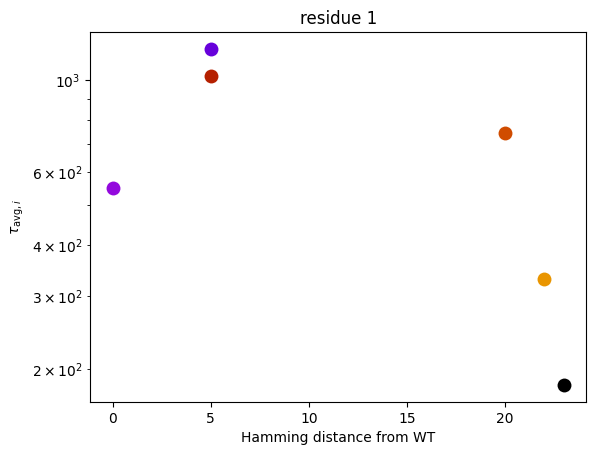

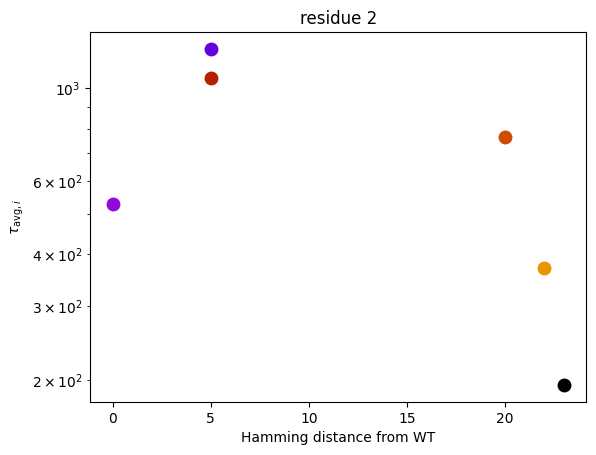

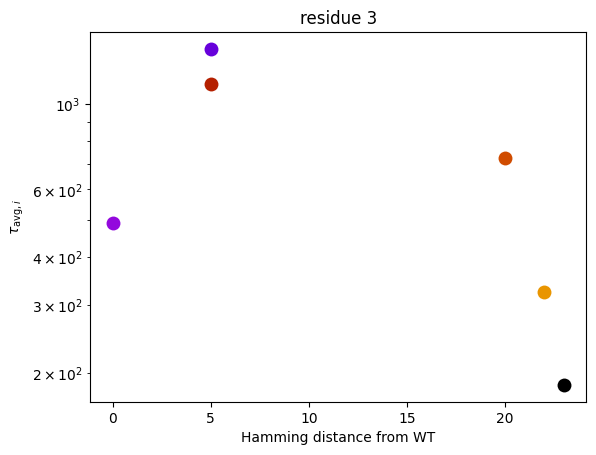

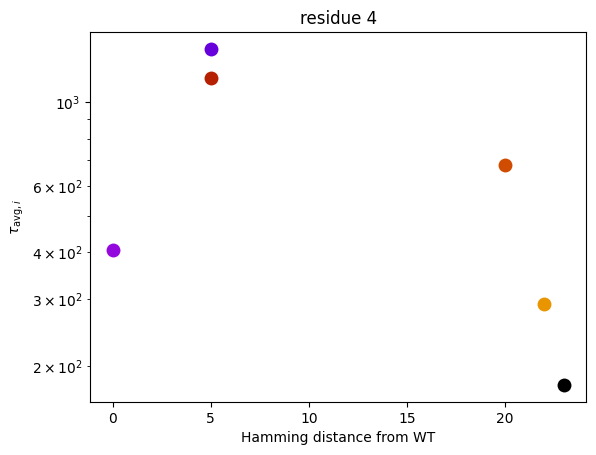

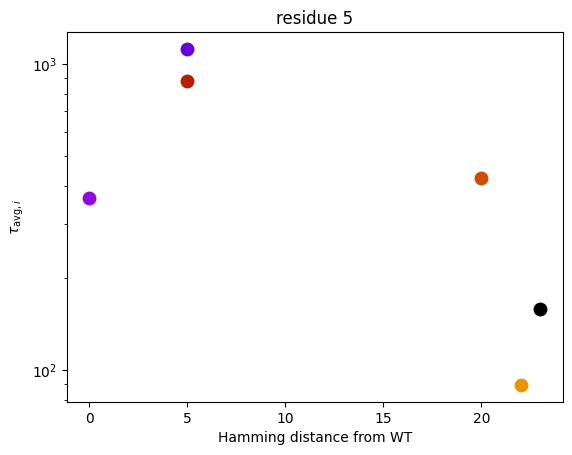

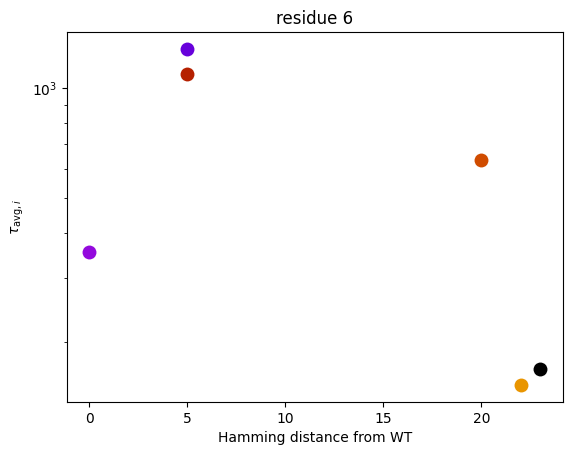

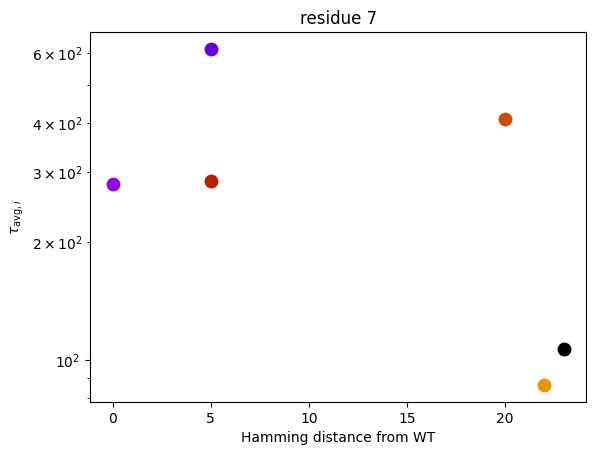

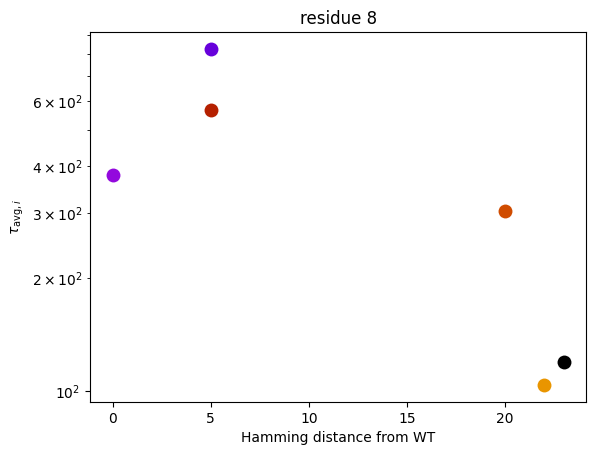

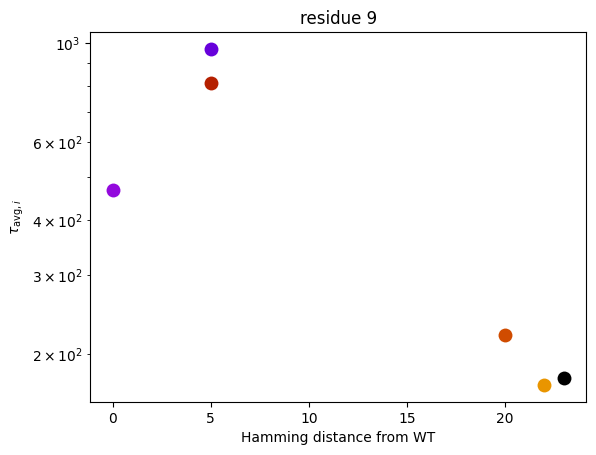

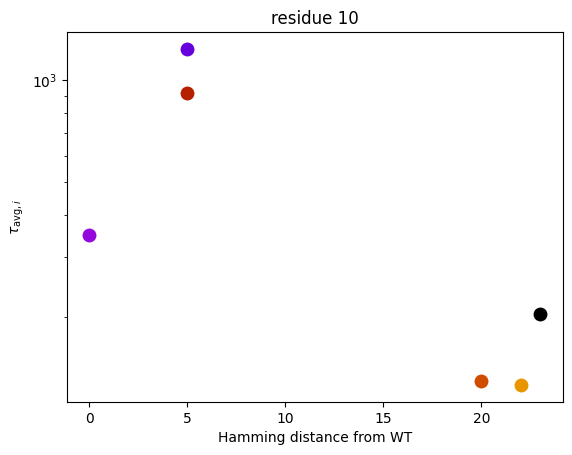

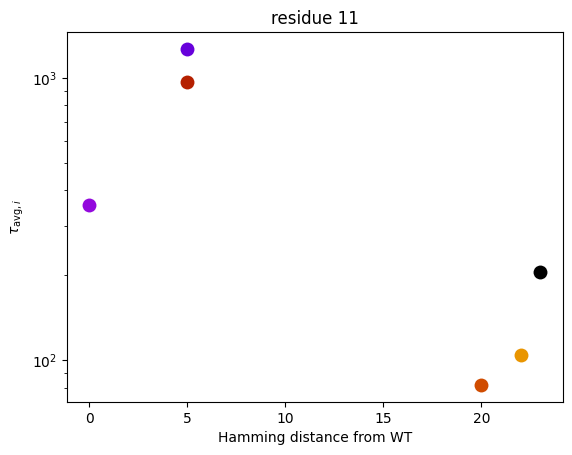

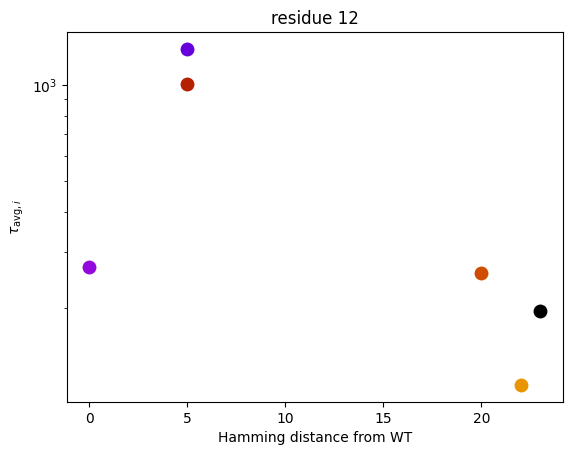

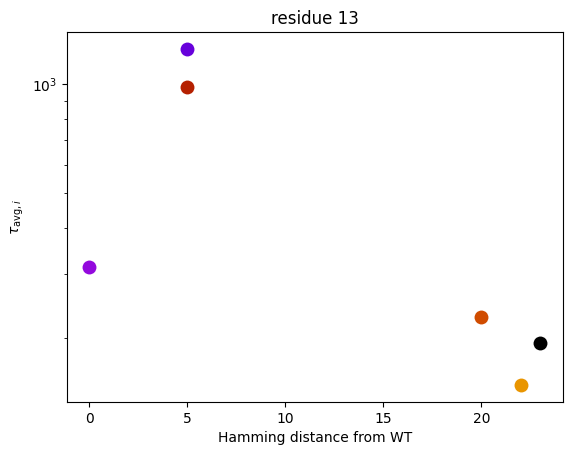

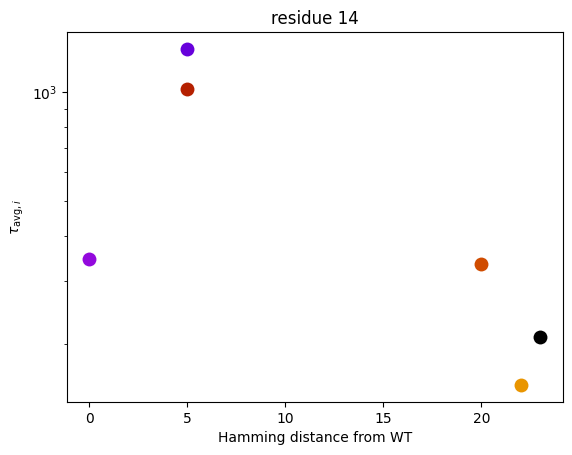

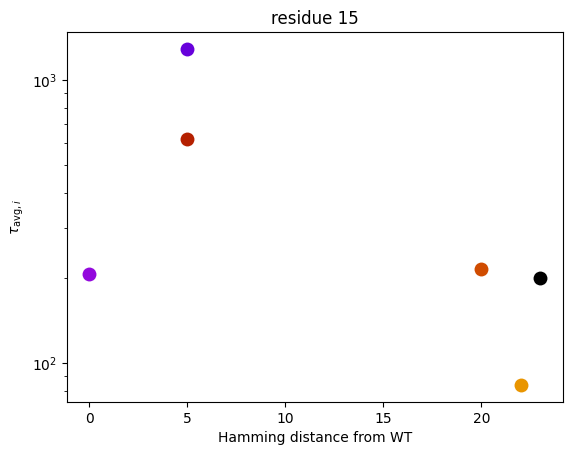

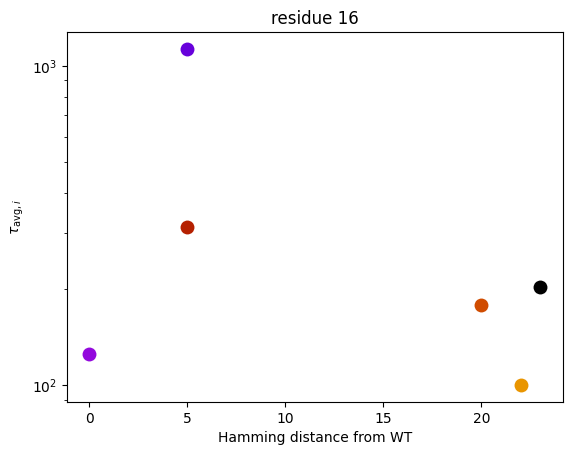

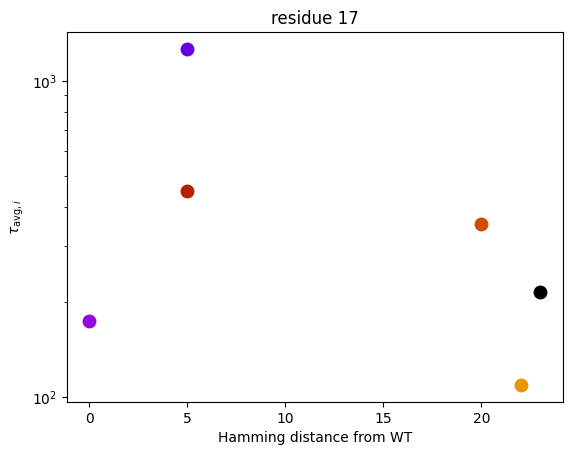

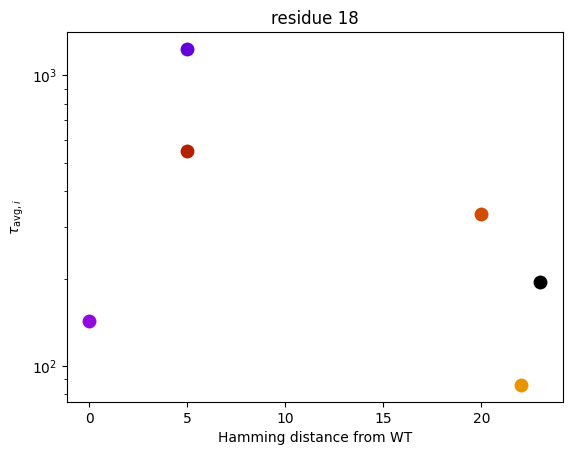

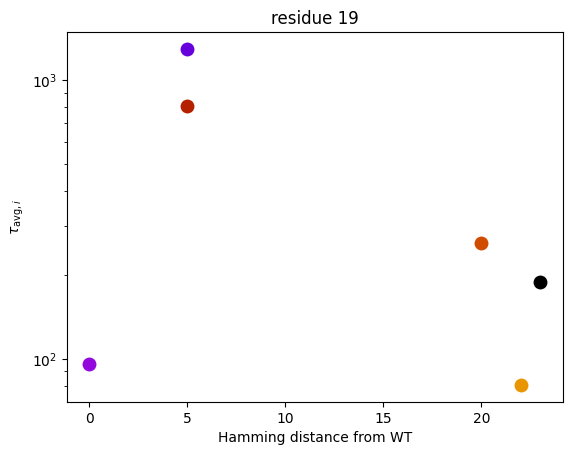

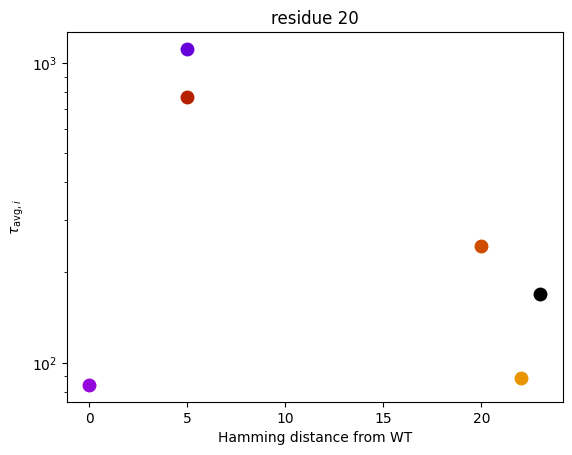

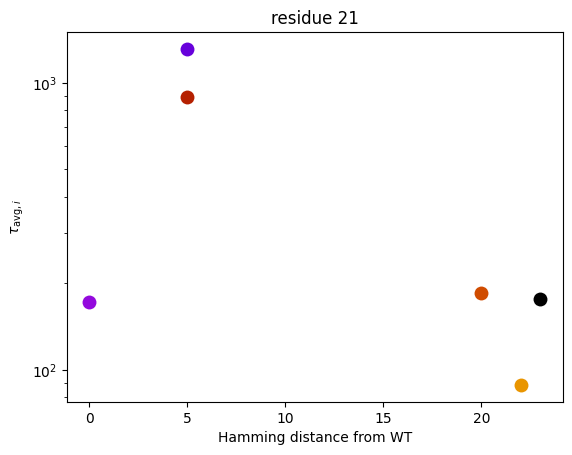

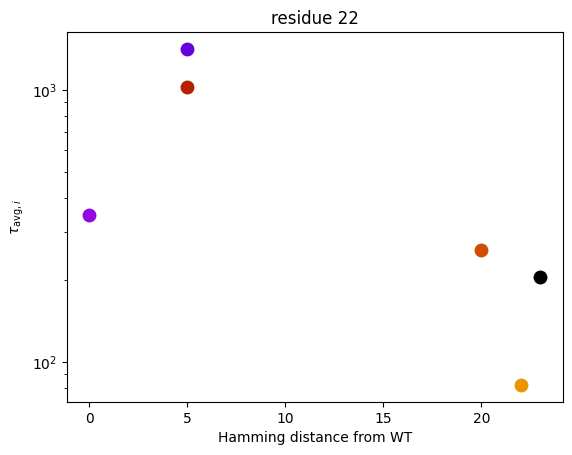

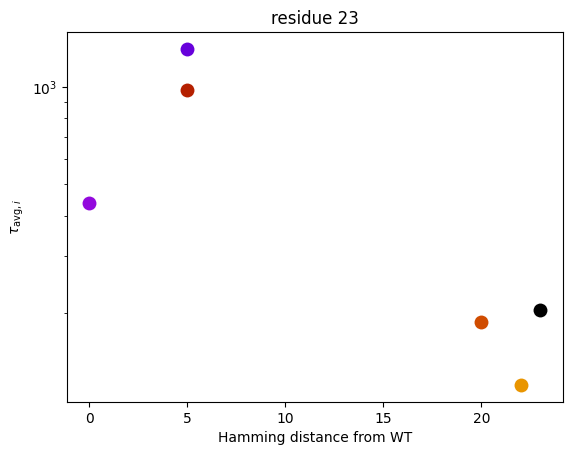

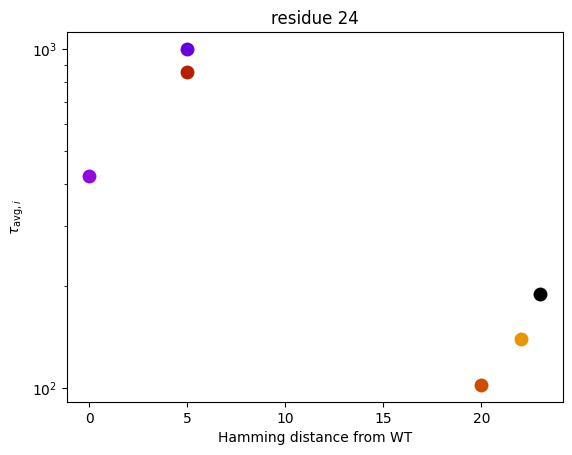

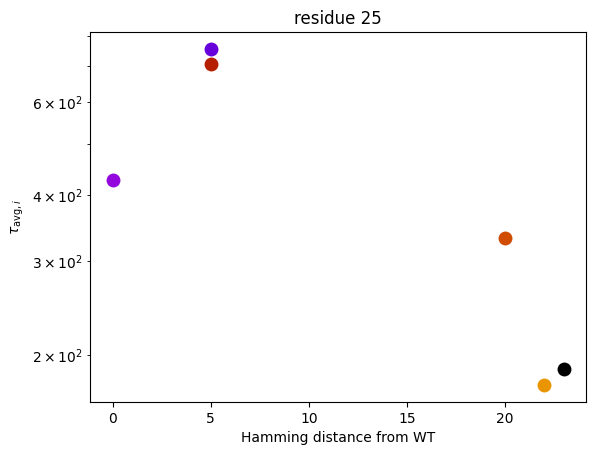

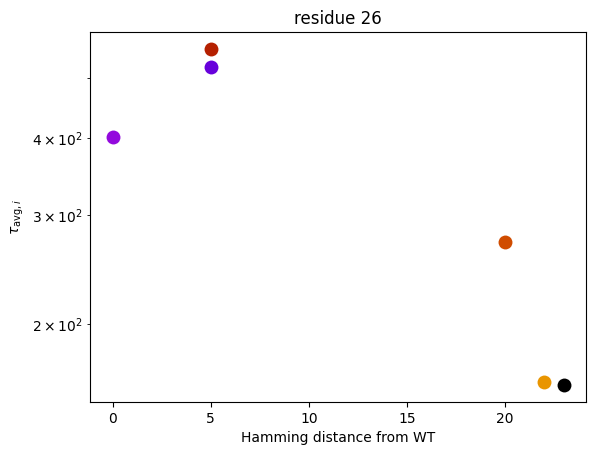

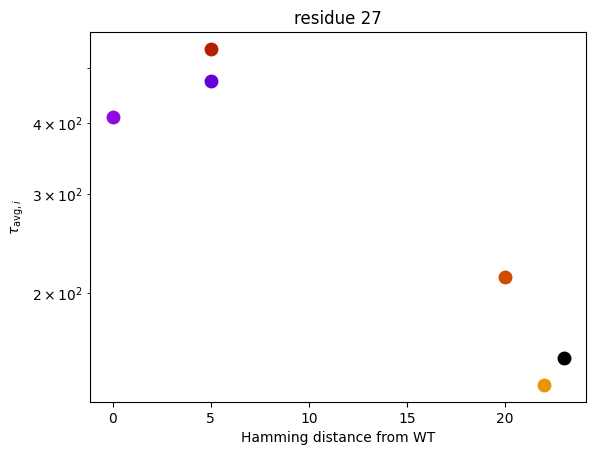

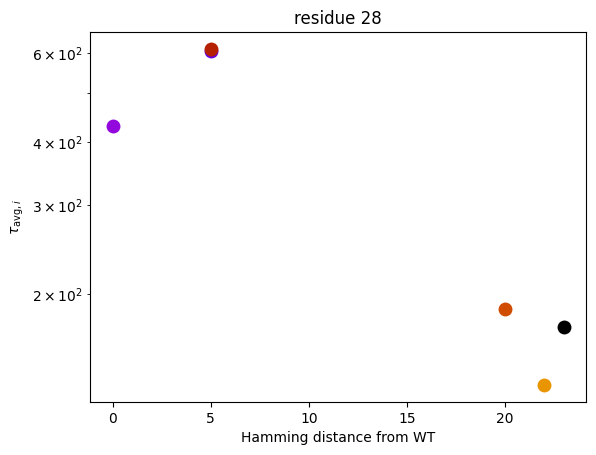

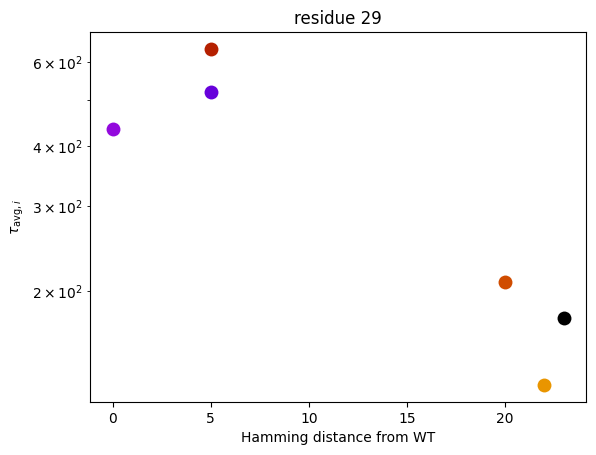

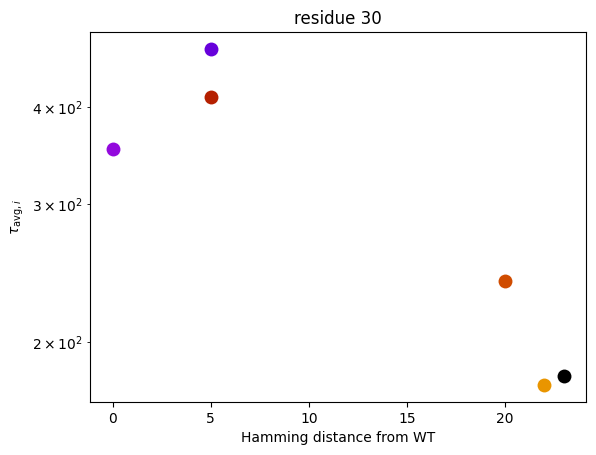

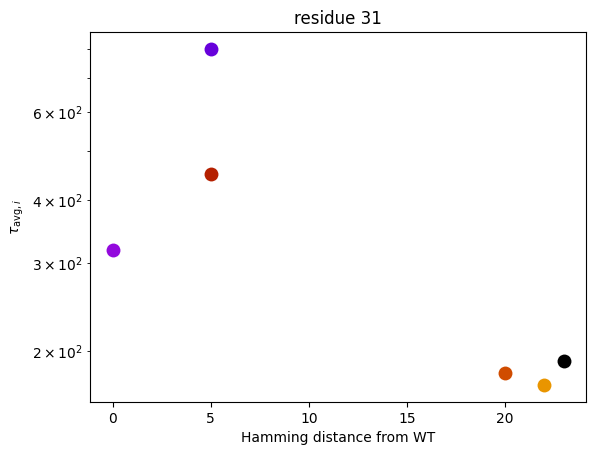

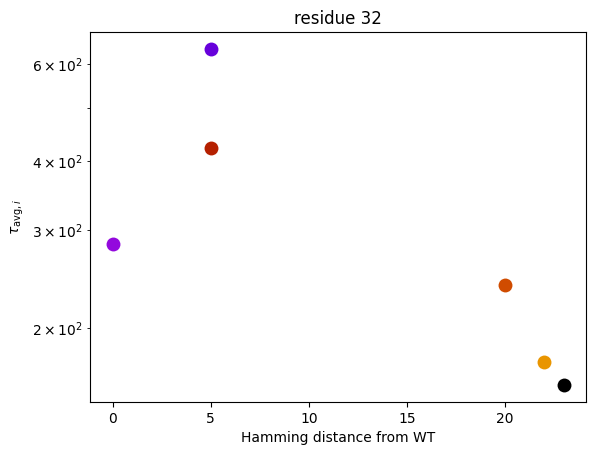

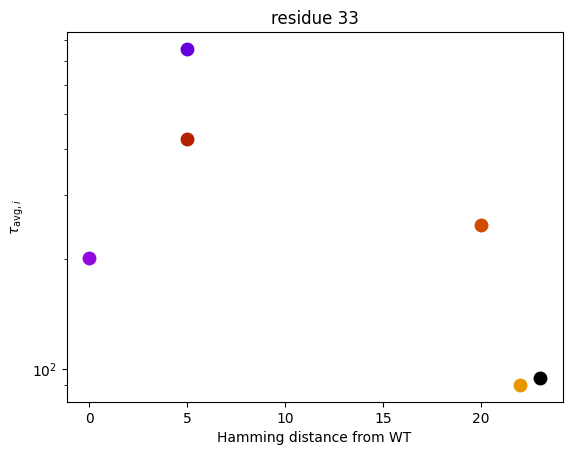

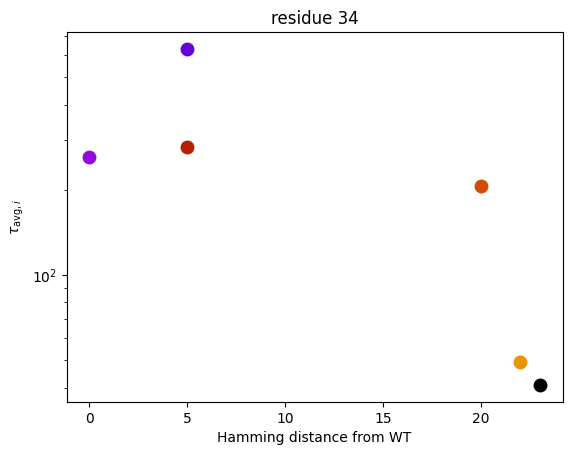

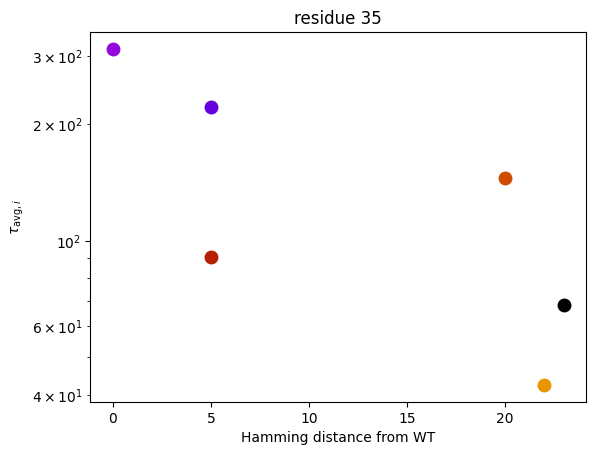

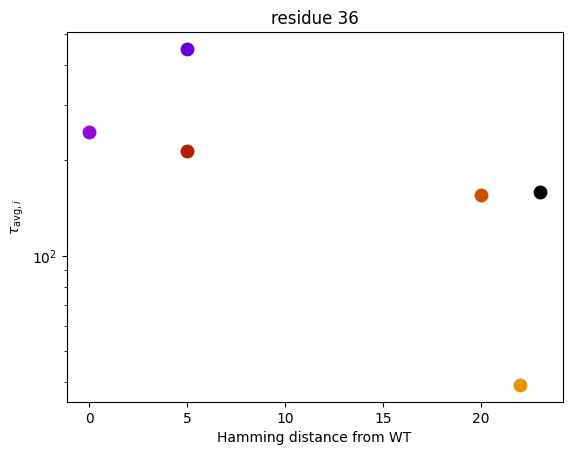

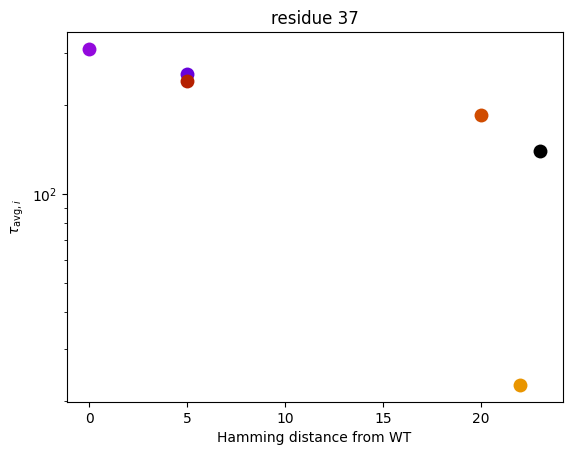

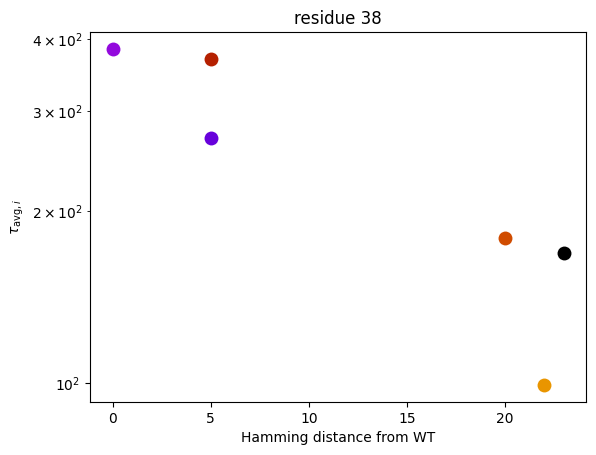

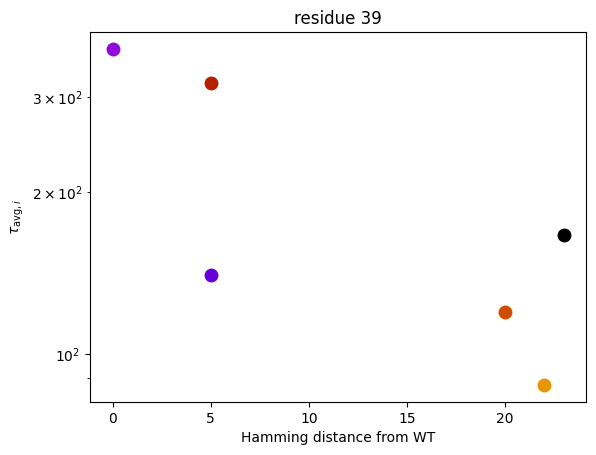

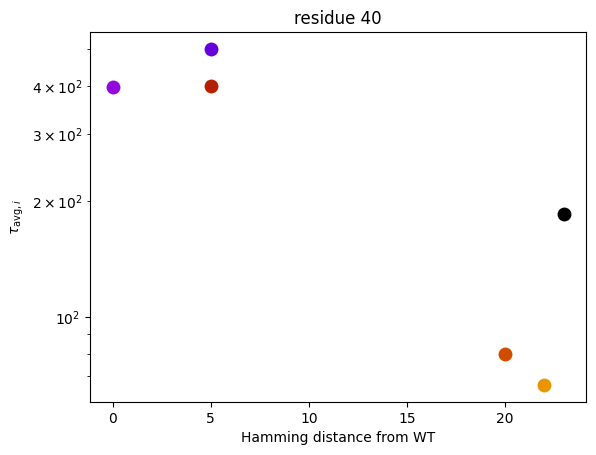

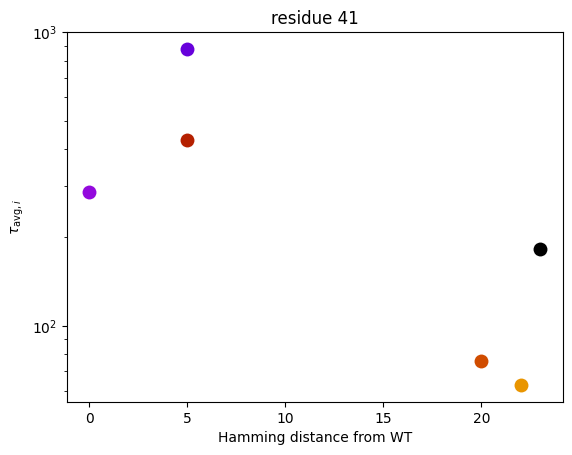

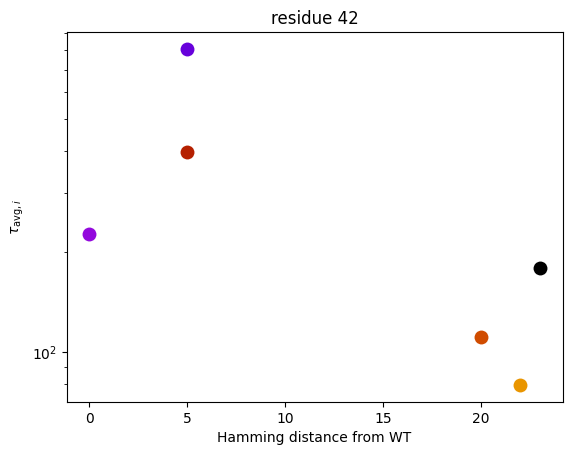

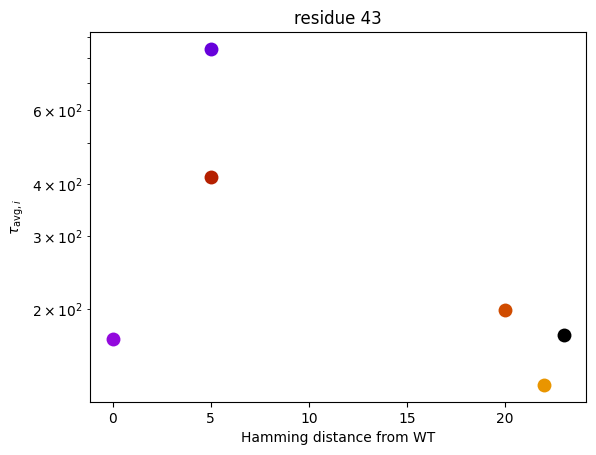

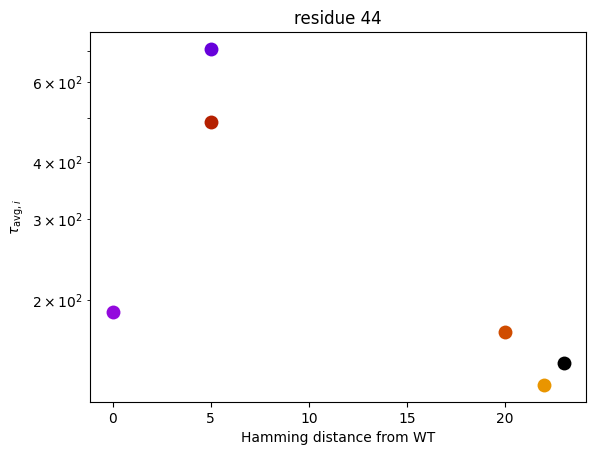

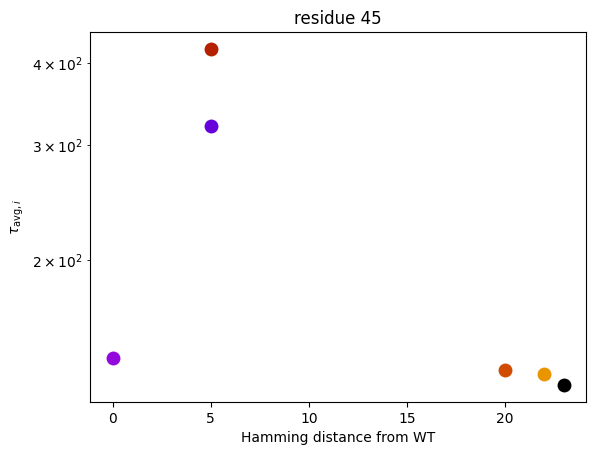

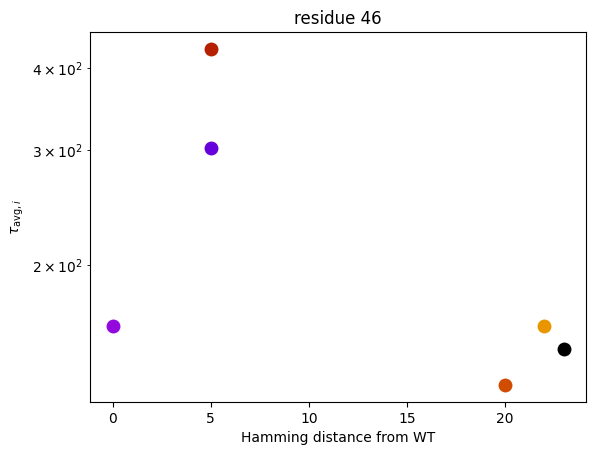

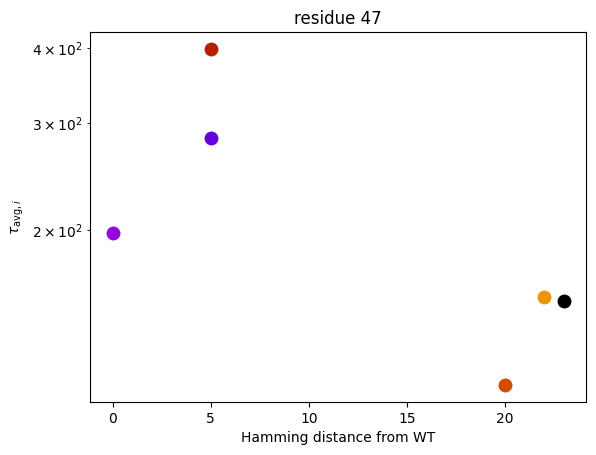

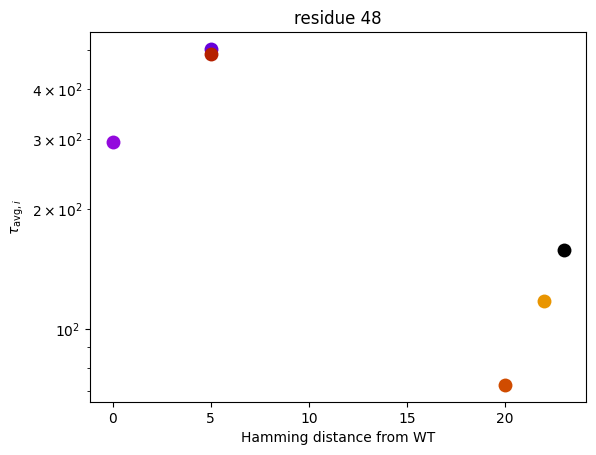

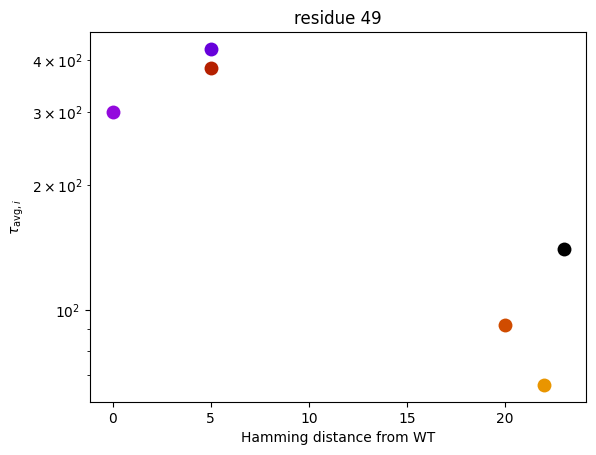

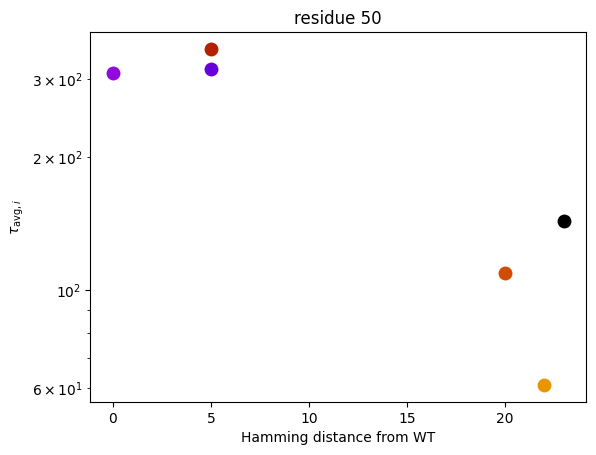

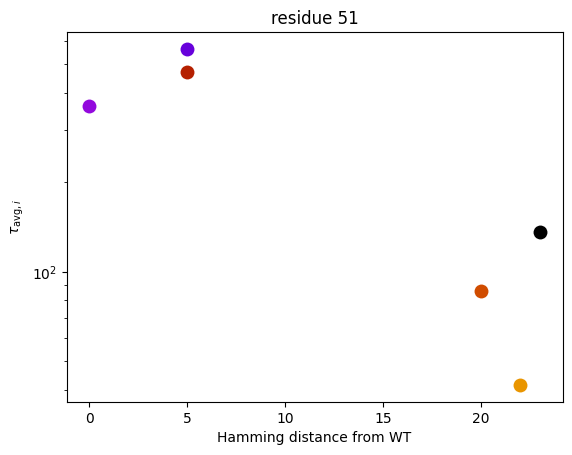

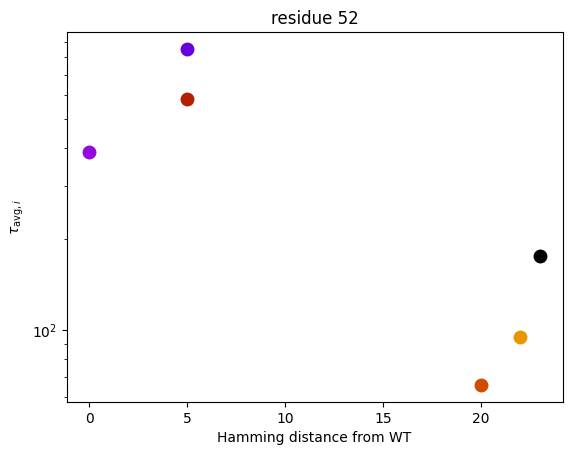

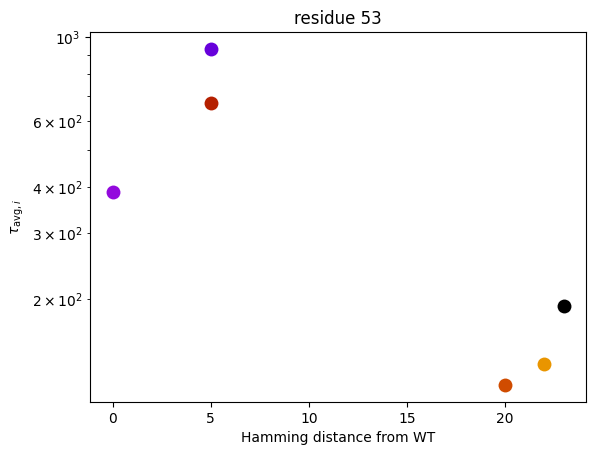

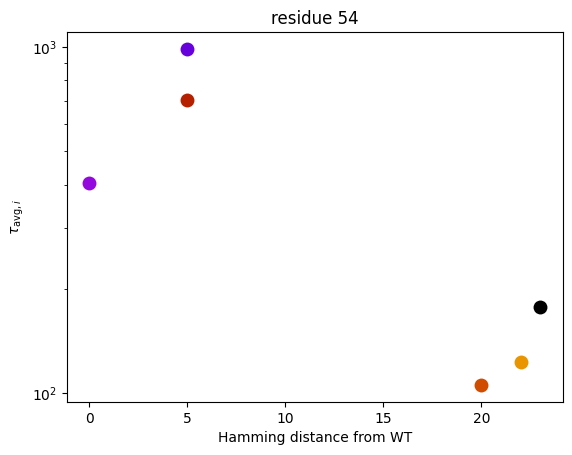

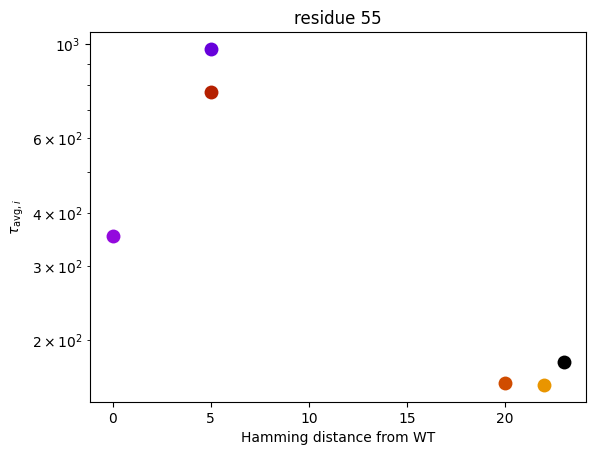

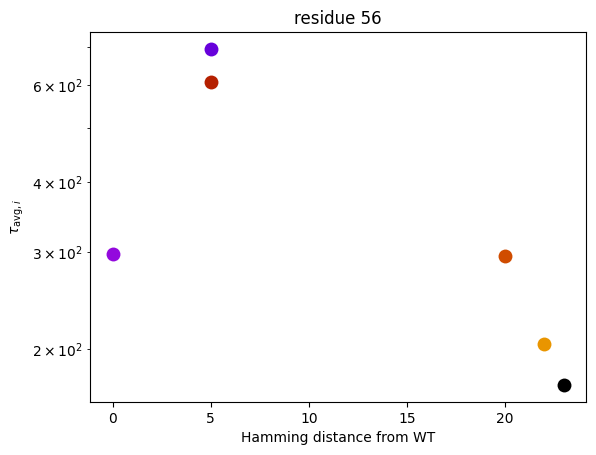

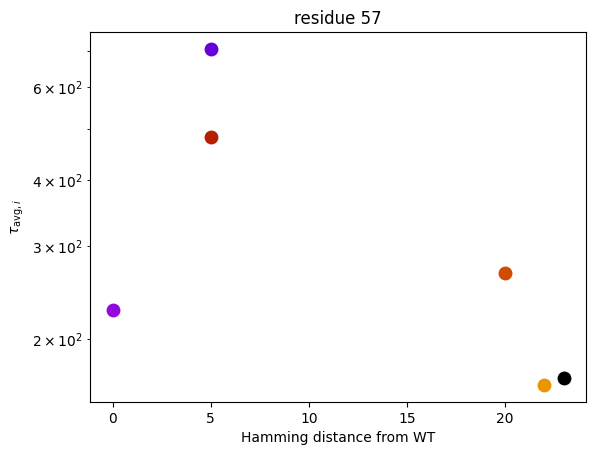

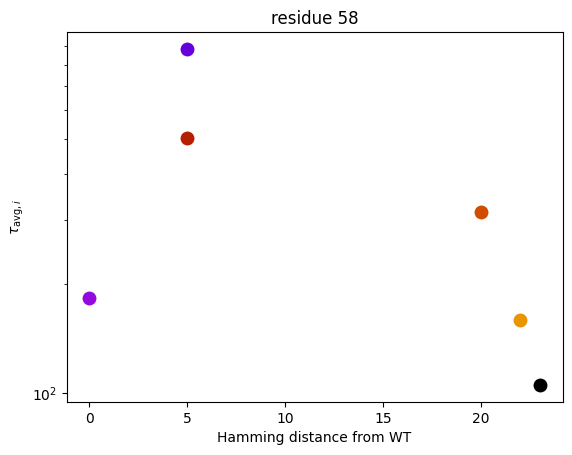

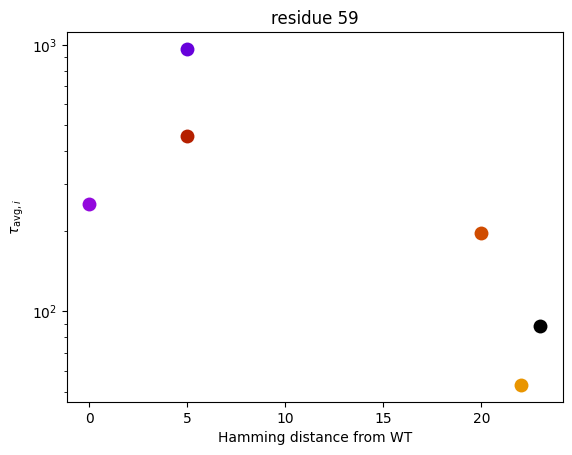

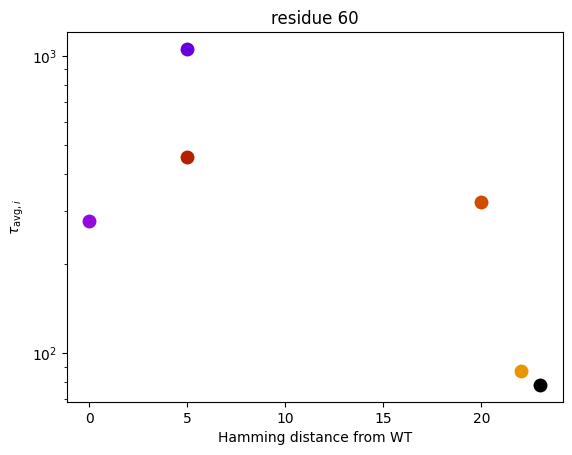

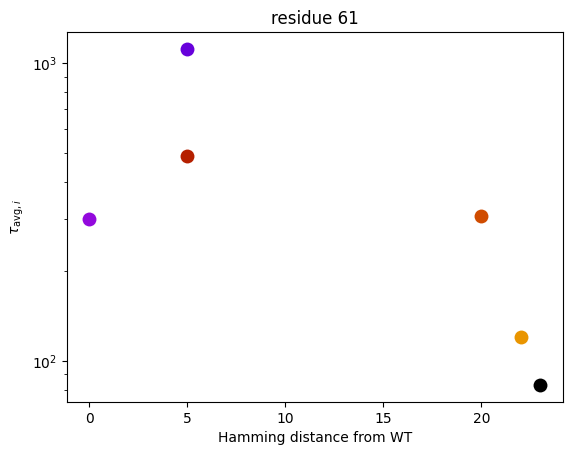

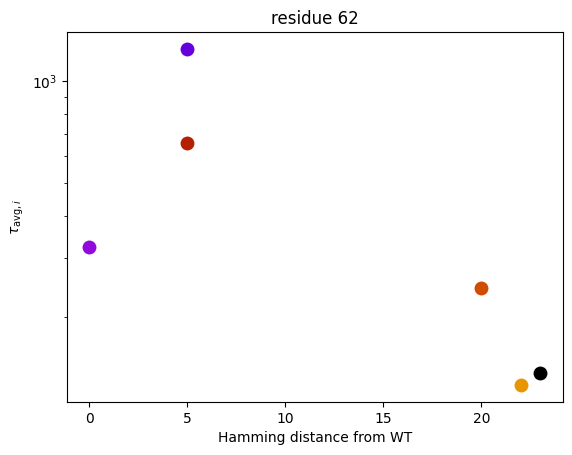

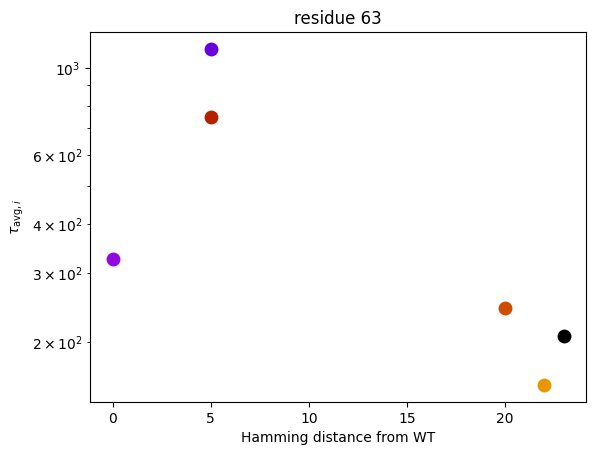

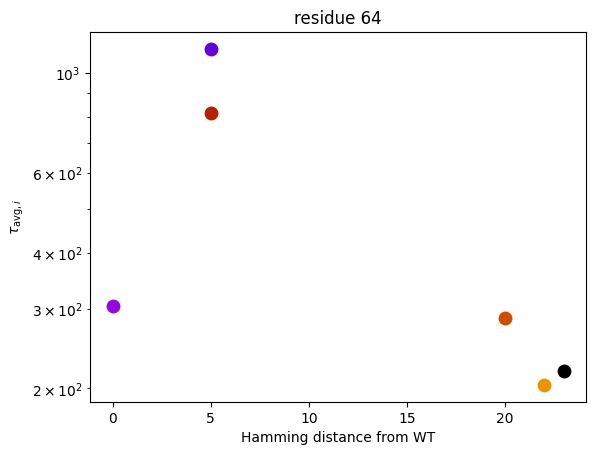

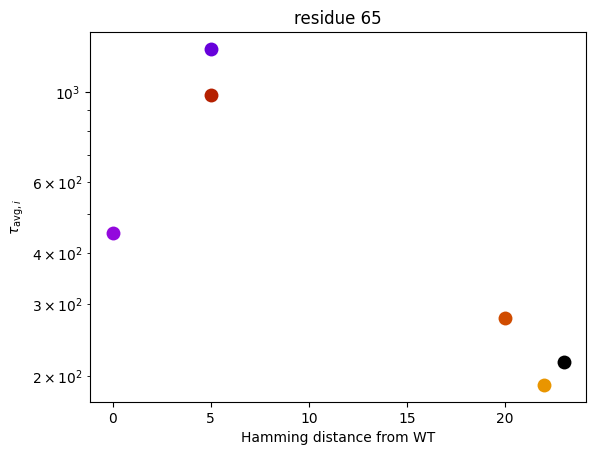

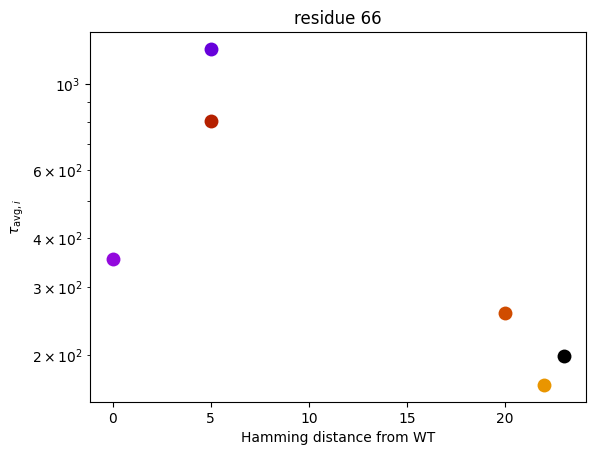

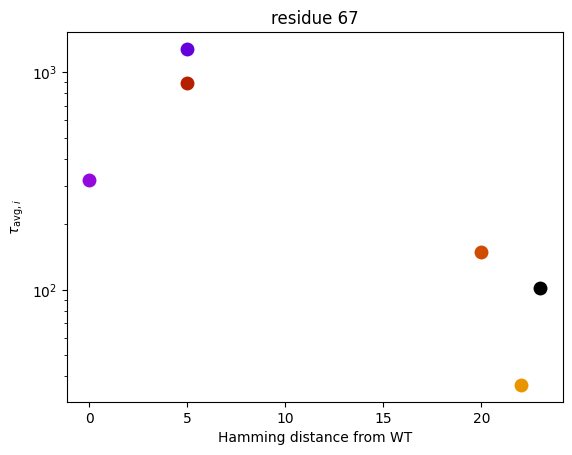

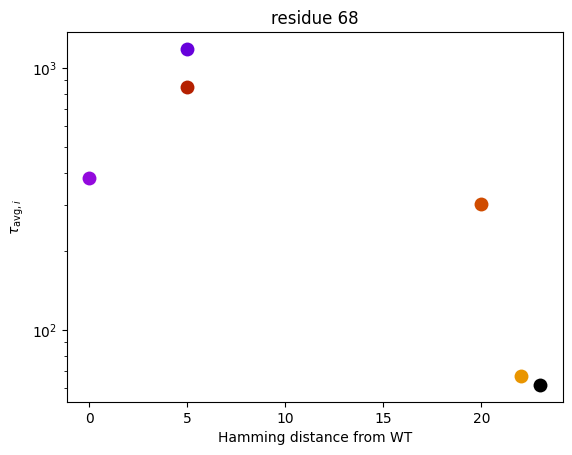

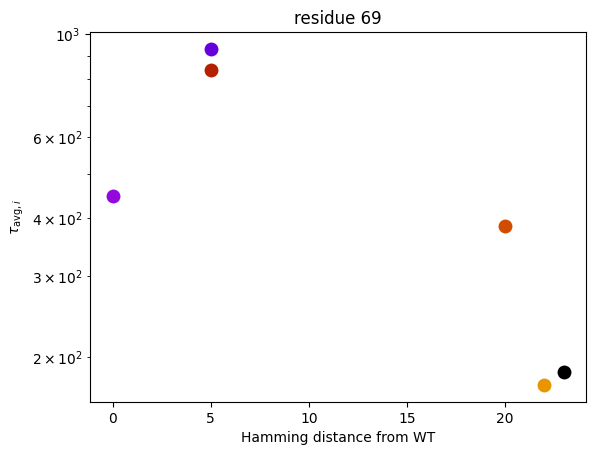

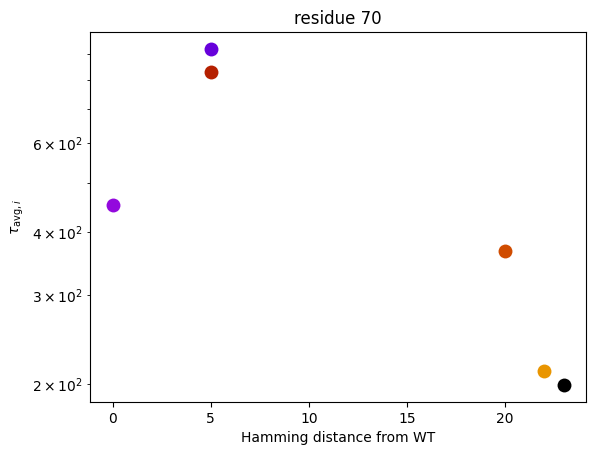

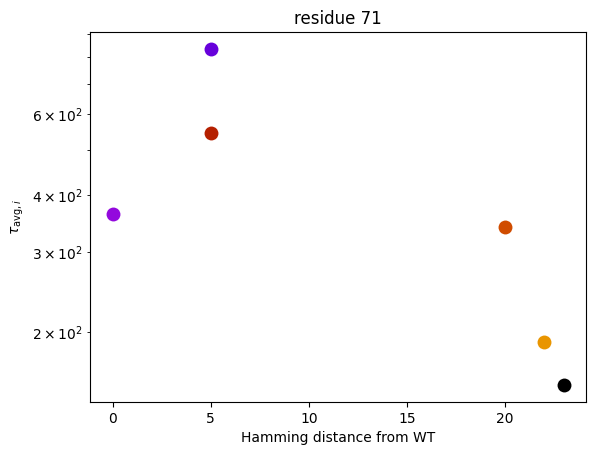

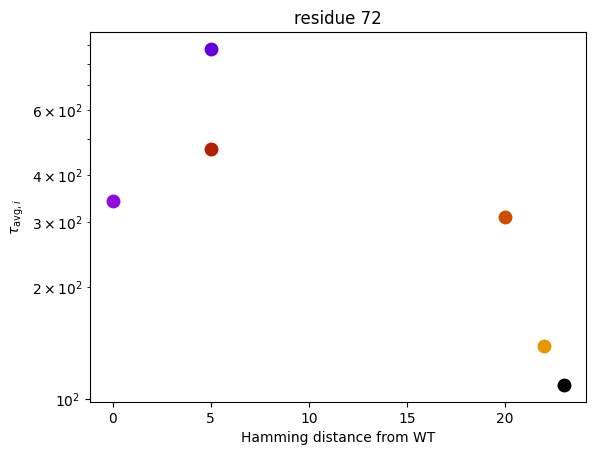

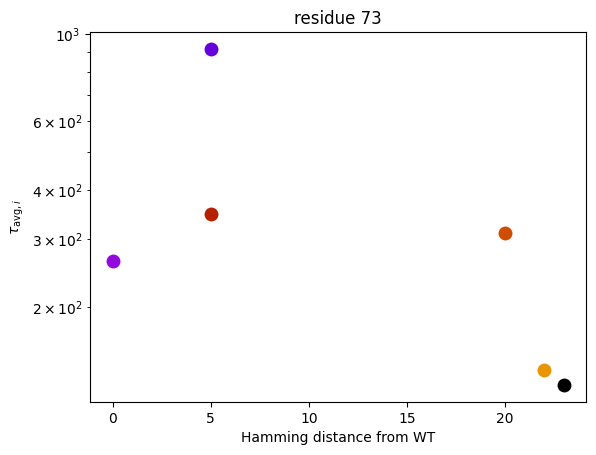

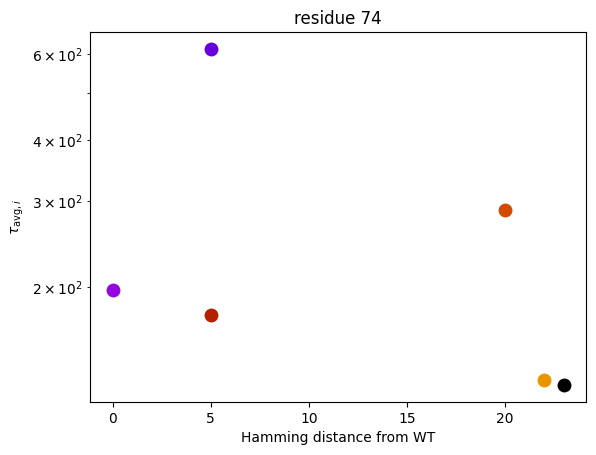

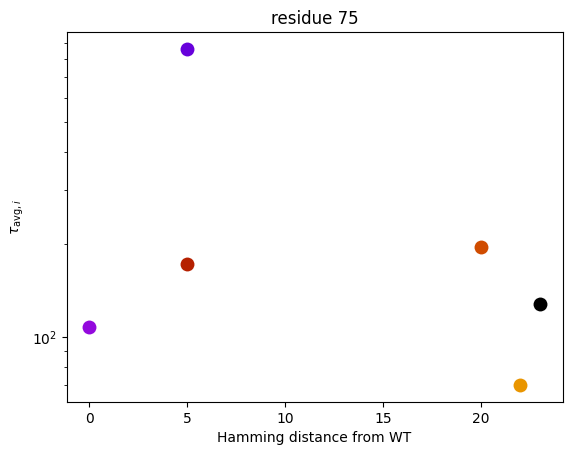

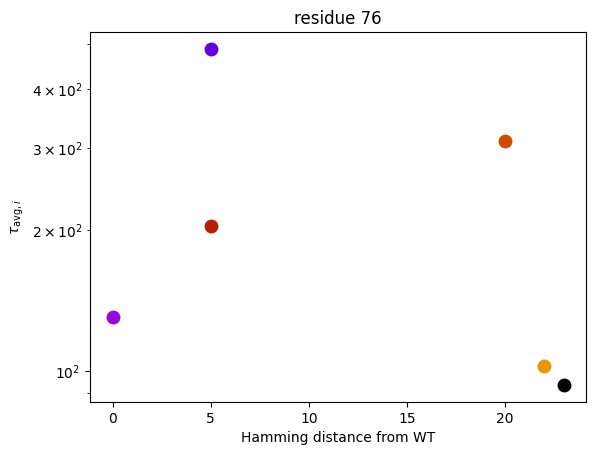

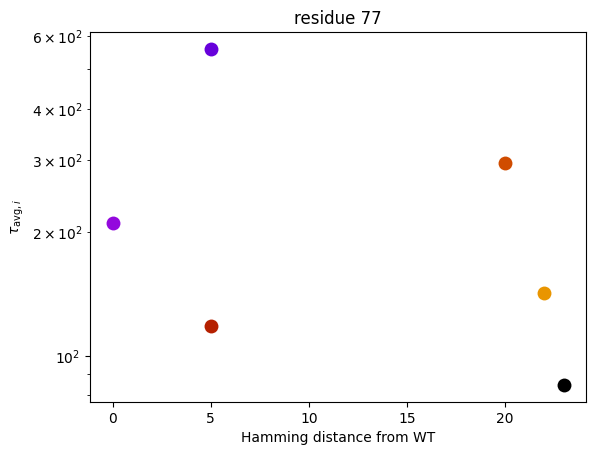

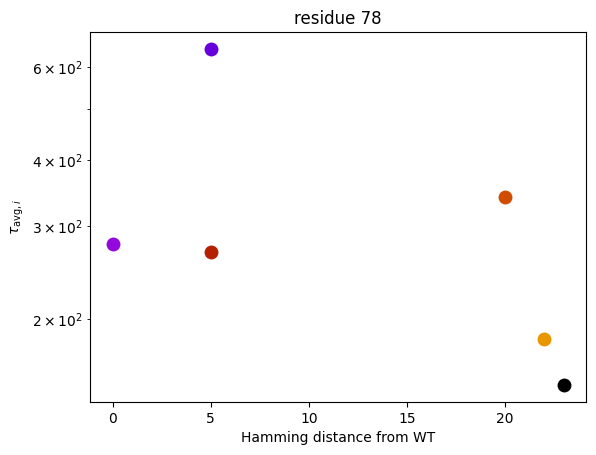

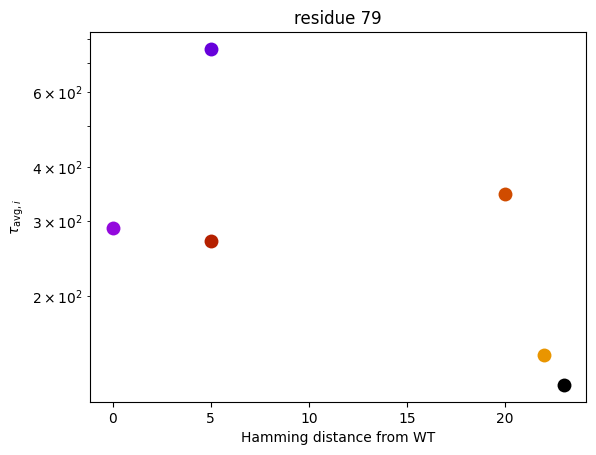

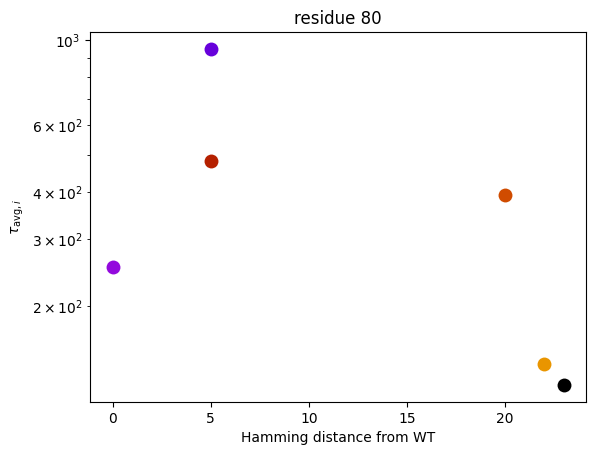

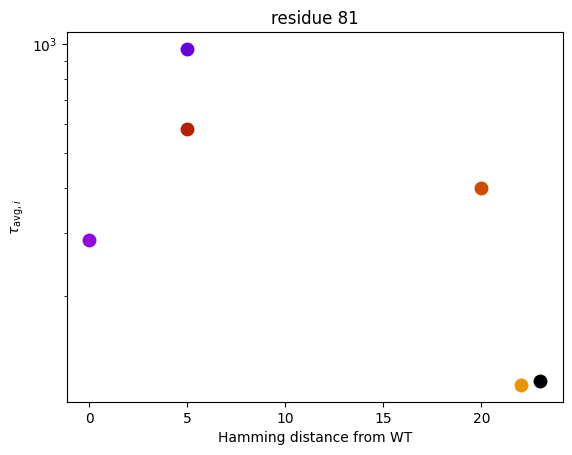

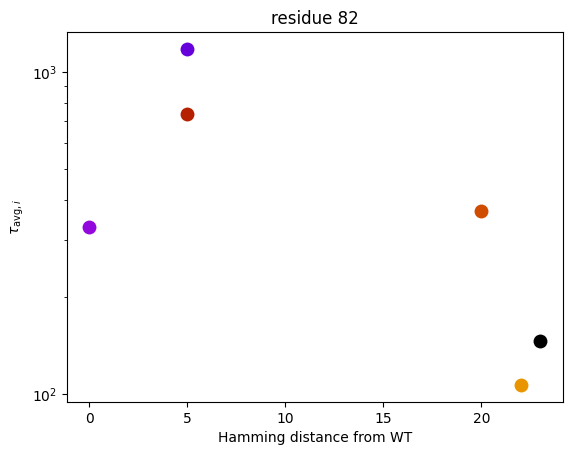

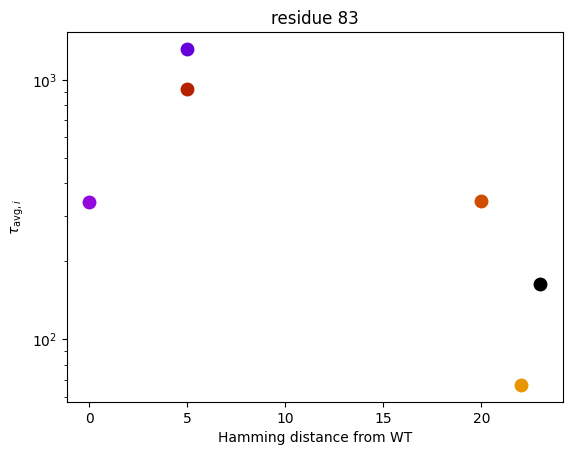

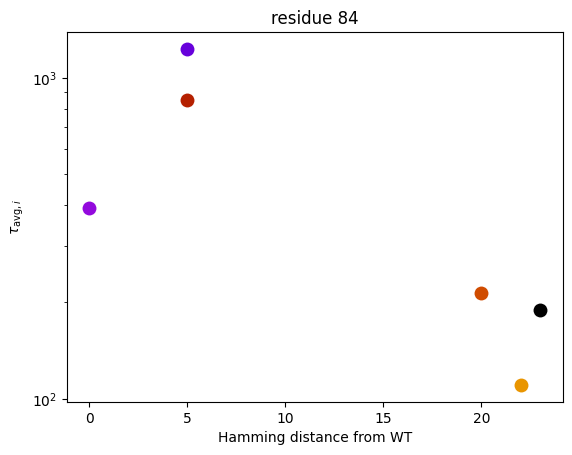

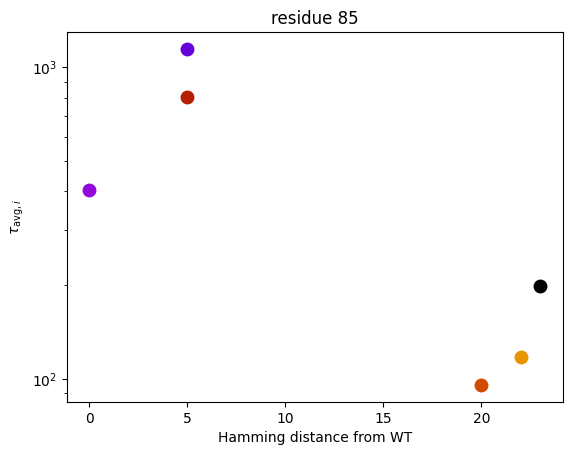

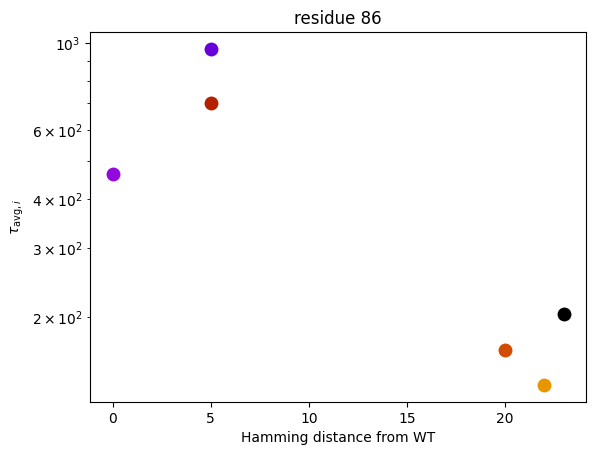

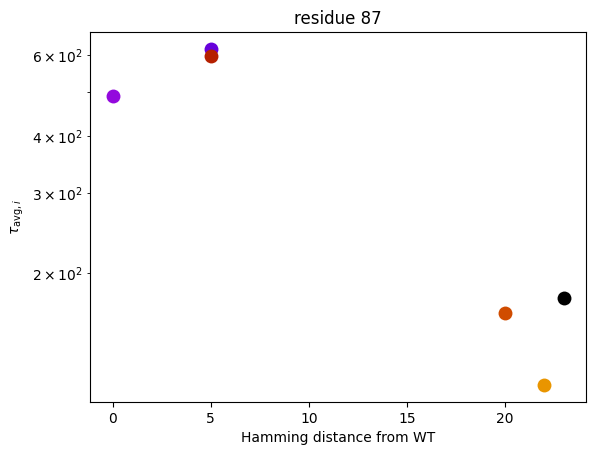

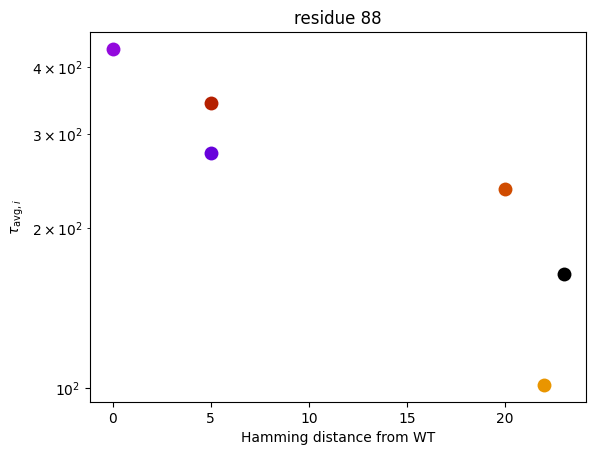

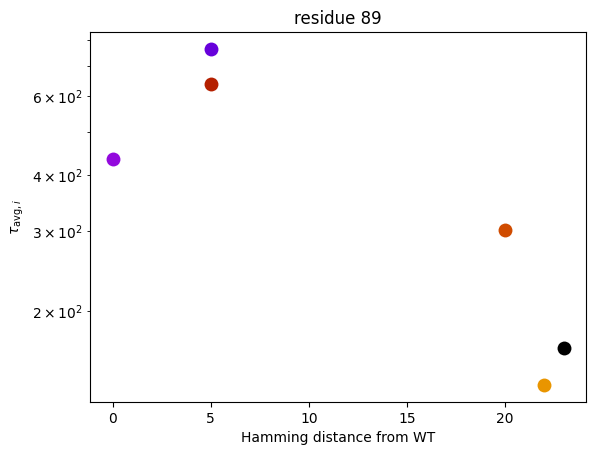

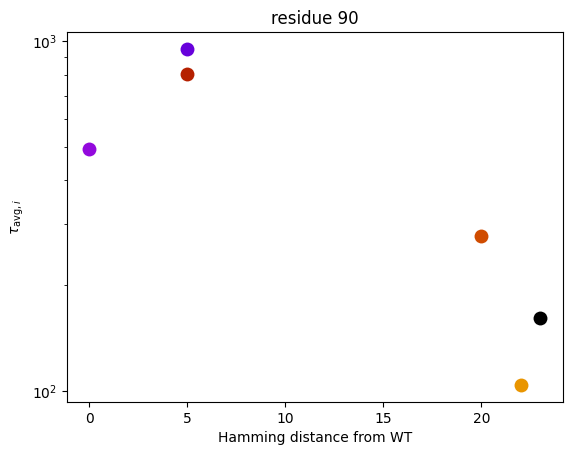

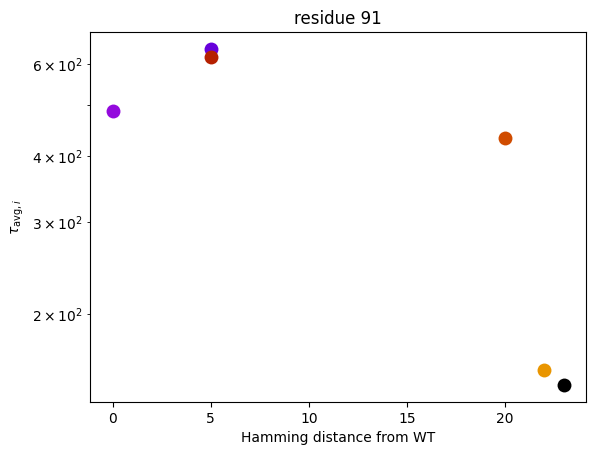

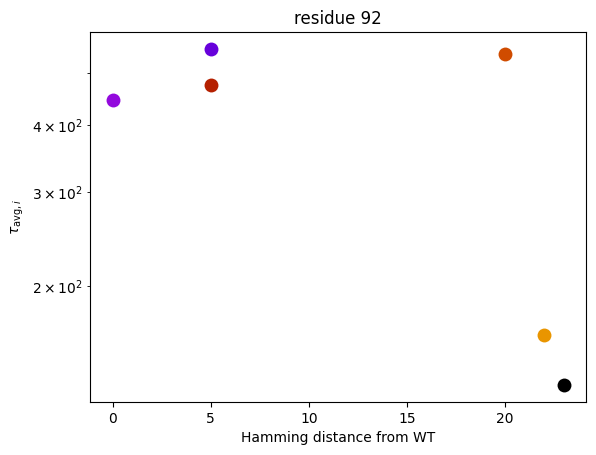

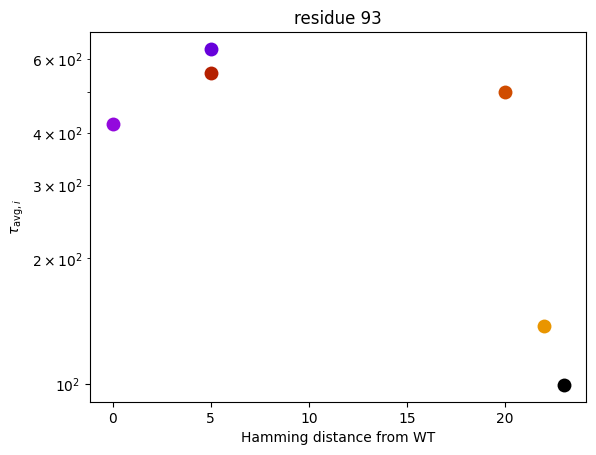

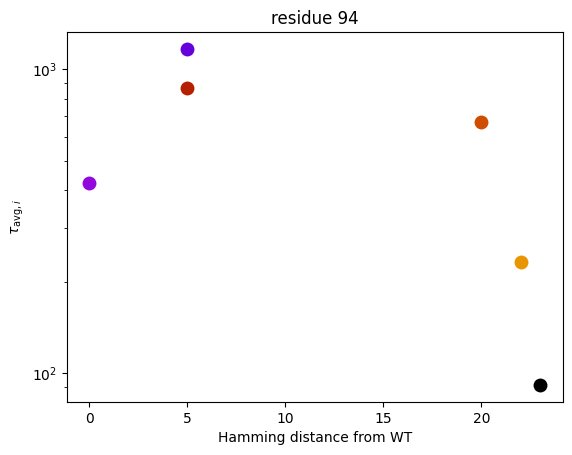

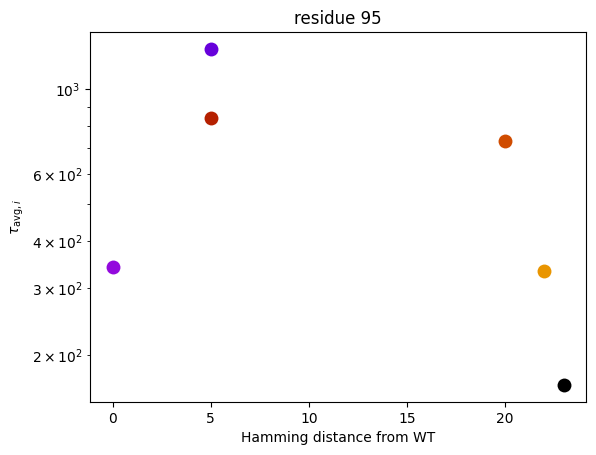

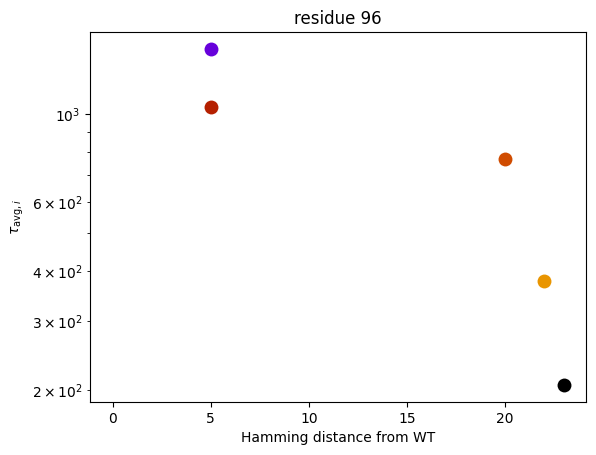

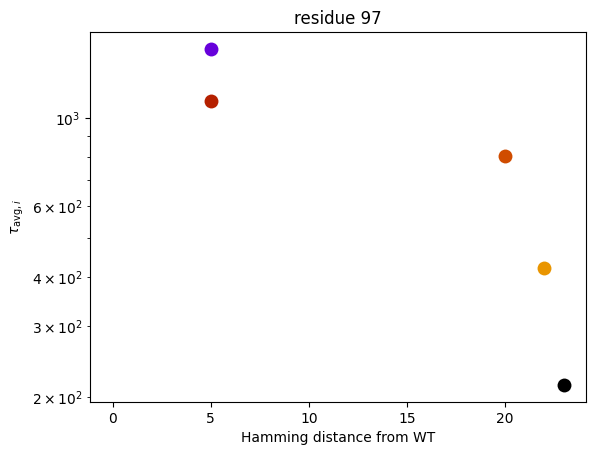

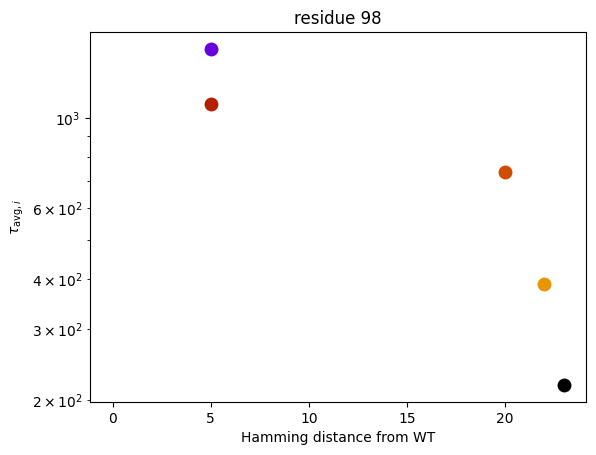

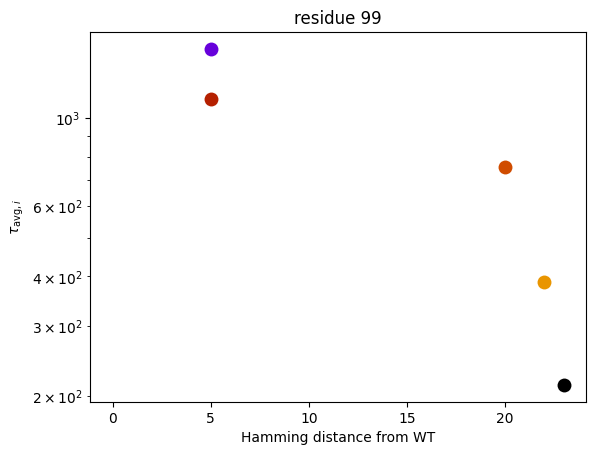

In [ ]:
for i in range(res512.shape[1]):
  for j in range(res512.shape[0]):
    plt.scatter(WT_dist[j], res512[j,i], lw = 0, color = colors[j], s = 100)
  plt.title(f'residue {i + 1}')
  plt.xlabel('Hamming distance from WT')
  plt.ylabel(r'$\tau_{\text{avg},i}$')
  plt.yscale('log')
  plt.show()
  plt.close()

# effect of filter

In [27]:
# to avoid the RAM overflow
del HA_tcf_calc['3ttp']
del HA_tcf_calc['2pc0']
del HA_tcf_calc['1q9p']

In [30]:
del HA_tcf_calc['1ebw']['MD']
del HA_tcf_calc['4z4x']['MD']
del HA_tcf_calc['6p9a']['MD']

del HA_tcf_calc['1ebw']['AFc']
del HA_tcf_calc['4z4x']['AFc']
del HA_tcf_calc['6p9a']['AFc']

del HA_tcf_calc['1ebw']['BioEMU']
del HA_tcf_calc['4z4x']['BioEMU']
del HA_tcf_calc['6p9a']['BioEMU']

del HA_tcf_calc['1ebw']['DiG']
del HA_tcf_calc['4z4x']['DiG']
del HA_tcf_calc['6p9a']['DiG']

In [28]:
with open('/content/drive/MyDrive/AF2_dynamics/calculated_data/HA_tcf_calc_filtered_modes_0_1.pkl','rb') as f:
    HA_tcf_calc_filter=pickle.load(f)

In [56]:
sys_names=['1ebw', '4z4x', '6p9a']
selected_msa={mm:i for i,mm in enumerate([8,16,64,512])}
barrier_type='scaled'
nres_list = [99,99,95,99,99,99]
tau_avg_per_sys = {}
tau_avg_per_sys_filt = {}

for i, sys in enumerate(sys_names):
  SYS=sys
  tau_avg_per_sys[sys]=np.zeros((len(selected_msa),nres_list[i])) # sys instead of SYS so that later on things can be changed
  tau_avg_per_sys_filt[sys]=np.zeros((len(selected_msa),nres_list[i])) # sys instead of SYS so that later on things can be changed

  t_axis = HA_tcf_calc[SYS]['AF2']['t_axis']
  tcf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['tcf']

  t_axis_filt = HA_tcf_calc_filter[SYS]['AF2']['t_axis']
  tcf_list_filt = HA_tcf_calc_filter[SYS]['AF2'][barrier_type]['tcf']

  for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
    if msa in selected_msa.keys():
      for resi in range(nres_list[i]):
        tau_avg_per_sys[sys][selected_msa[msa],resi] = integ(tcf_list[mm].T[resi],t_axis)
        tau_avg_per_sys_filt[sys][selected_msa[msa],resi] = integ(tcf_list_filt[mm].T[resi],t_axis_filt)


/tmp/ipython-input-10-3448413438.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integ_v=np.trapz(y,x)


/tmp/ipython-input-57-2126924903.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


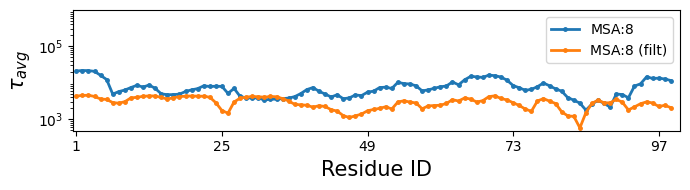

/tmp/ipython-input-57-2126924903.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


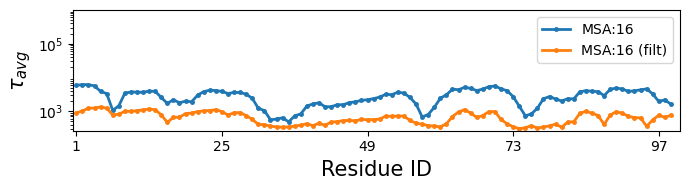

/tmp/ipython-input-57-2126924903.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


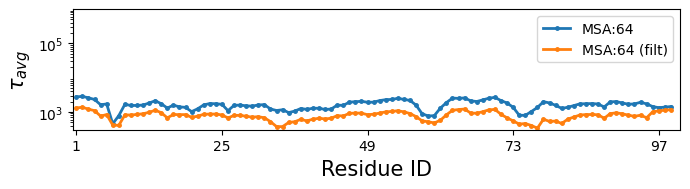

/tmp/ipython-input-57-2126924903.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


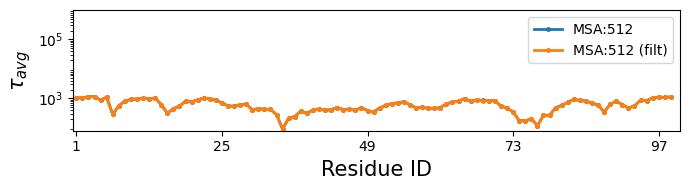

In [57]:
selected_msa={mm:i for i,mm in enumerate([8,16,64,512])}
sys='1ebw'
for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
  if msa in list(selected_msa.keys()):
    plt.figure(figsize=(7,2))
    plt.plot(tau_avg_per_sys[sys][selected_msa[msa],:],'.-',linewidth=2,markersize=5,label=f'MSA:{msa}');
    plt.plot(tau_avg_per_sys_filt[sys][selected_msa[msa],:],'.-',linewidth=2,markersize=5,label=f'MSA:{msa} (filt)');
    plt.yscale('log');
    plt.xlim(-0.5,99.5);
    plt.xticks(np.arange(0,99,24),labels=[str(r) for r in range(1,100,24)],fontsize=10);
    plt.xlabel('Residue ID',fontsize=15);
    plt.ylabel(r'$\tau_{avg}$',fontsize=15);
    plt.legend(fontsize=10,loc='upper right');
    plt.ylim((0, 1e6));
    plt.yticks([1e3,1e5],fontsize=10);
    plt.tight_layout();
    #plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/all_mutants_column.pdf',dpi=600);
    #plt.savefig('all_mutants_column.pdf',dpi=600);
    plt.show()

/tmp/ipython-input-58-3519449918.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


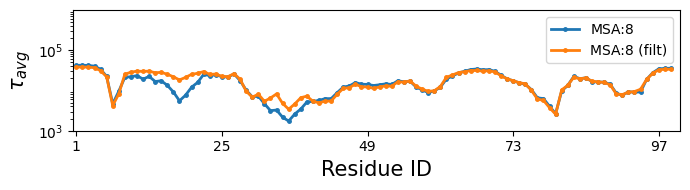

/tmp/ipython-input-58-3519449918.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


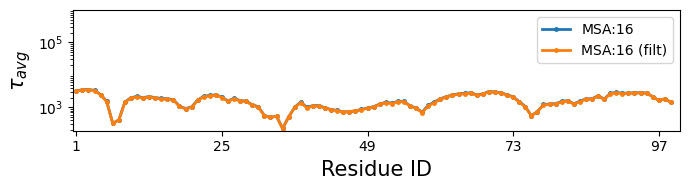

/tmp/ipython-input-58-3519449918.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


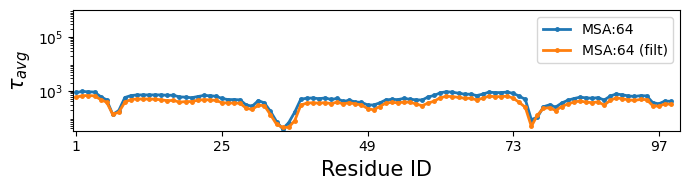

/tmp/ipython-input-58-3519449918.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


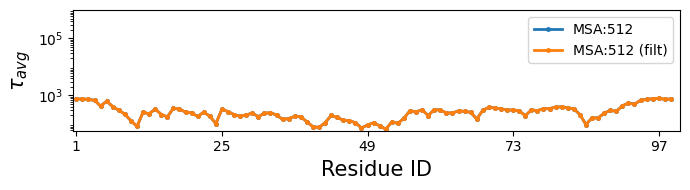

In [58]:
selected_msa={mm:i for i,mm in enumerate([8,16,64,512])}
sys='4z4x'
for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
  if msa in list(selected_msa.keys()):
    plt.figure(figsize=(7,2))
    plt.plot(tau_avg_per_sys[sys][selected_msa[msa],:],'.-',linewidth=2,markersize=5,label=f'MSA:{msa}');
    plt.plot(tau_avg_per_sys_filt[sys][selected_msa[msa],:],'.-',linewidth=2,markersize=5,label=f'MSA:{msa} (filt)');
    plt.yscale('log');
    plt.xlim(-0.5,99.5);
    plt.xticks(np.arange(0,99,24),labels=[str(r) for r in range(1,100,24)],fontsize=10);
    plt.xlabel('Residue ID',fontsize=15);
    plt.ylabel(r'$\tau_{avg}$',fontsize=15);
    plt.legend(fontsize=10,loc='upper right');
    plt.ylim((0, 1e6));
    plt.yticks([1e3,1e5],fontsize=10);
    plt.tight_layout();
    #plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/all_mutants_column.pdf',dpi=600);
    #plt.savefig('all_mutants_column.pdf',dpi=600);
    plt.show()

/tmp/ipython-input-59-3473937135.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


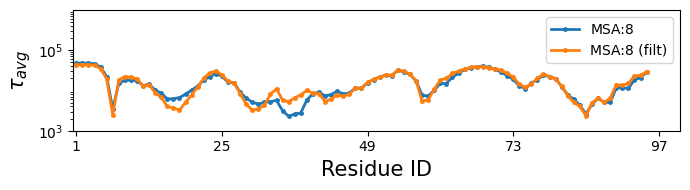

/tmp/ipython-input-59-3473937135.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


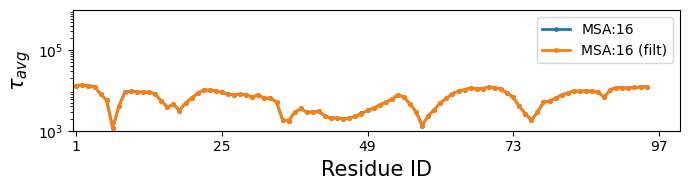

/tmp/ipython-input-59-3473937135.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


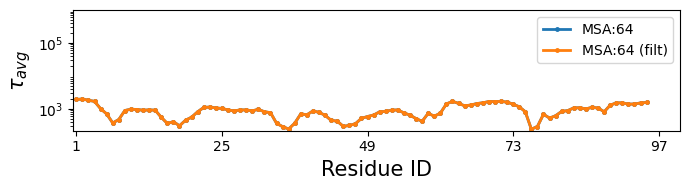

/tmp/ipython-input-59-3473937135.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 1e6));


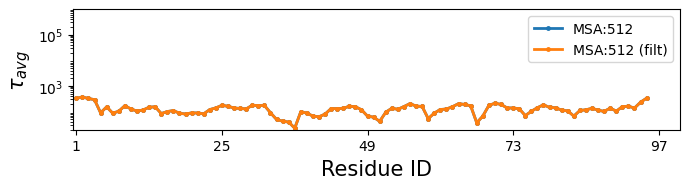

In [59]:
selected_msa={mm:i for i,mm in enumerate([8,16,64,512])}
sys='6p9a'
for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
  if msa in list(selected_msa.keys()):
    plt.figure(figsize=(7,2))
    plt.plot(tau_avg_per_sys[sys][selected_msa[msa],:],'.-',linewidth=2,markersize=5,label=f'MSA:{msa}');
    plt.plot(tau_avg_per_sys_filt[sys][selected_msa[msa],:],'.-',linewidth=2,markersize=5,label=f'MSA:{msa} (filt)');
    plt.yscale('log');
    plt.xlim(-0.5,99.5);
    plt.xticks(np.arange(0,99,24),labels=[str(r) for r in range(1,100,24)],fontsize=10);
    plt.xlabel('Residue ID',fontsize=15);
    plt.ylabel(r'$\tau_{avg}$',fontsize=15);
    plt.legend(fontsize=10,loc='upper right');
    plt.ylim((0, 1e6));
    plt.yticks([1e3,1e5],fontsize=10);
    plt.tight_layout();
    #plt.savefig('/content/drive/MyDrive/AF2_dynamics/figures/all_mutants_column.pdf',dpi=600);
    #plt.savefig('all_mutants_column.pdf',dpi=600);
    plt.show()